**DATA OVERVIEW**:
- Customer churn is a critical issue in the retail industry. Predicting churn helps retail businesses retain customers by identifying at-risk individuals early and offering targeted interventions. This project aims to develop a machine learning model to predict customer churn in a retail setting, leveraging retail analytics to inform data-driven decisions, which is a key concern for retail businesses. The goal of this project is to predict whether a customer will return to the business, enabling the company to take targeted actions to increase customer loyalty and minimize churn.


**PURPOSE**:
- The primary objective is to develop a binary classification model to accurately predict whether a customer will return. Achieving this objective will provide the following business benefits:


**Table of content** :
- **customer_id**: A unique identifier for each customer.
- **age**: The age of the customer.
- **gender**: The gender of the customer.
- **location**: The location classification of the customer.
- **product_category**: The category of the product purchased.
- **product_price**: The price of the product before any discounts.
- **product_rating**: The rating given to the product by the customer.
- **purchase_quantity**: The quantity of the product purchased in the transaction.
- **transaction_amount**: The total amount of the transaction before any discounts are applied.
- **discount_applied**: The amount of discount applied to the transaction.
- **final_amount**: The final amount charged to the customer after applying the discount.
- **purchase_date**: The date when the purchase was made.
- **loyalty_points**: The loyalty points earned or redeemed during the transaction.
- **payment_method**: The mode of payment used.
- **membership_status**: Indicates the customer's position in the loyalty program.
- **returning_customer**: Indicates whether the customer is a returning customer or a new one.




## Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.5f}'.format

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### READ THE FILE

In [2]:
df4 = pd.read_excel('retail_analysis_dataset_updated.xlsx')

In [3]:
df4.head()

customer_id  age  gender  location product_category  product_price  \
0         1260   18    Male     Urban         Clothing      468.71000   
1         1706   50    Male  Suburban         Clothing      264.44000   
2         1203   24  Female  Suburban      Electronics      557.33000   
3         4878   45   Other     Rural      Electronics      637.50000   
4         2010   24    Male     Urban        Groceries       82.16000   

   product_rating  purchase_quantity  transaction_amount  discount_applied  \
0         5.00000                  6          2812.26000           0.20000   
1         3.30000                  9          2379.96000           0.10000   
2         3.30000                  3          1671.99000           0.20000   
3         3.20000                  8          5100.00000           0.20000   
4         2.60000                  9           739.44000           0.10000   

   final_amount purchase_date  loyalty_points  payment_method  \
0    2249.81000    2020-01-01             641      Debit Card   
1    2141.96000    2020-01-01             699            Cash   
2    1337.59000    2020-01-01              70  Mobile Payment   
3    4080.00000    2020-01-01             323  Mobile Payment   
4     665.50000    2020-01-01             373  Mobile Payment   

  membership_status  returning_customer  
0        Non-member                   0  
1           Regular                   1  
2               VIP                   0  
3           Regular                   1  
4        Non-member                   0

In [4]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         25000 non-null  int64  
 1   age                 25000 non-null  int64  
 2   gender              25000 non-null  object 
 3   location            25000 non-null  object 
 4   product_category    25000 non-null  object 
 5   product_price       25000 non-null  float64
 6   product_rating      25000 non-null  float64
 7   purchase_quantity   25000 non-null  int64  
 8   transaction_amount  25000 non-null  float64
 9   discount_applied    25000 non-null  float64
 10  final_amount        25000 non-null  float64
 11  purchase_date       25000 non-null  object 
 12  loyalty_points      25000 non-null  int64  
 13  payment_method      25000 non-null  object 
 14  membership_status   25000 non-null  object 
 15  returning_customer  25000 non-null  int64  
dtypes: f

In [5]:
df4['purchase_date'] = pd.to_datetime(df4['purchase_date'])
df4['year'] = df4['purchase_date'].dt.year.astype(str)
df4['month'] = df4['purchase_date'].dt.month.astype(str)


df4['customer_id'] = df4['customer_id'].astype(int)
df4['gender'] = df4['gender'].astype('category')
df4['location'] = df4['location'].astype('category')
df4['product_category'] = df4['product_category'].astype('category')
df4['payment_method'] = df4['payment_method'].astype('category')
df4['membership_status'] = df4['membership_status'].astype('category')
df4.drop('purchase_date',axis=1,inplace=True)

In [6]:
df4.describe()

customer_id         age  product_price  product_rating  \
count  25000.00000 25000.00000    25000.00000     25000.00000   
mean    2997.49700    43.59268      501.05747         2.99899   
std     1156.02501    14.97408      286.84029         1.15773   
min     1000.00000    18.00000        5.02000         1.00000   
25%     1993.00000    31.00000      253.66500         2.00000   
50%     2997.00000    44.00000      501.43500         3.00000   
75%     3987.00000    57.00000      748.95000         4.00000   
max     4999.00000    69.00000     1000.00000         5.00000   

       purchase_quantity  transaction_amount  discount_applied  final_amount  \
count        25000.00000         25000.00000       25000.00000   25000.00000   
mean             4.99252          2501.18562           0.15074    2123.52053   
std              2.58174          2061.86673           0.11164    1787.45249   
min              1.00000             5.31000           0.00000       4.58000   
25%              3.00000           807.54000           0.10000     675.96500   
50%              5.00000          1923.71000           0.20000    1618.96000   
75%              7.00000          3765.42250           0.30000    3159.32750   
max              9.00000          8997.03000           0.30000    8997.03000   

       loyalty_points  returning_customer  
count     25000.00000         25000.00000  
mean        499.30880             0.49868  
std         288.37323             0.50001  
min           0.00000             0.00000  
25%         251.00000             0.00000  
50%         501.00000             0.00000  
75%         749.00000             1.00000  
max         999.00000             1.00000

**KEY INFRENCES**
- **customer_id**:
Count: 25,000 unique customers.
Mean: The average customer ID is around 2997, indicating a balanced spread.
Standard Deviation (std): The customer IDs are spread out across a wide range (1156).
Min & Max: The IDs range from 1000 to 4999, showing that customer IDs span a large interval but stay within a reasonable range for this dataset.

- **age**:
Count: 25,000 age entries.
Mean: The average customer age is 43.59 years, suggesting that the customer base skews toward middle-aged individuals.
Standard Deviation: 14.97, indicating a fairly wide age range.
Min & Max: The youngest customer is 18 years old, and the oldest is 69. This shows that the dataset covers a diverse age group.
25th Percentile (25%): 31 years old, indicating that a quarter of the customers are under 31.
75th Percentile (75%): 57 years old, meaning three-quarters of the customers are younger than 57 years.
- **product_price**:
Mean: The average price of products is 501.06.
Standard Deviation: 286.84, indicating a wide range of product prices.
Min & Max: The lowest product price is 5.02, while the maximum is 1000. This shows a significant range in product prices.
Quartiles:
25% of products are priced below 253.67,
50% are priced below 501.44,
75% are below 748.95.
The data suggests that the product prices are distributed relatively symmetrically.
- **product_rating**:
Mean: 2.99, indicating that, on average, products have mid-level ratings.
Standard Deviation: 1.16, suggesting some variation in product ratings.
Min & Max: Ratings range from 1 to 5, representing the full rating scale.
Quartiles:
25% of products have a rating of 2 or lower,
50% have a rating of 3,
75% have a rating of 4 or lower.
- **purchase_quantity**:
Mean: The average purchase quantity is 4.99, approximately 5 items per purchase.
Standard Deviation: 2.58, indicating variability in purchase quantities.
Min & Max: Customers purchase between 1 and 9 items.
Quartiles:
25% of purchases involve 3 or fewer items,
50% involve 5 items,
75% involve 7 or fewer items.
- **transaction_amount**:
Mean: The average transaction amount is 2501.19.
Standard Deviation: 2061.87, showing that transaction amounts vary significantly across customers.
Min & Max: The smallest transaction is 5.31, and the largest is 8997.03. This large range suggests a wide range of purchase behavior.
Quartiles:
25% of transactions are below 807.54,
50% are below 1923.71,
75% are below 3765.42.
- **discount_applied**:
Mean: The average discount applied is 0.15 (15% discount).
Standard Deviation: 0.11, showing a narrow spread of discounts.
Min & Max: Discounts range from 0% to 30%, indicating that the maximum discount offered is 30%.
Quartiles:
25% of customers received a discount of 10%,
50% received a discount of 20%,
75% received a discount of 30%.
- **final_amount**:
Mean: The average final amount paid by customers (after discounts) is 2123.52.
Standard Deviation: 1787.45, showing a wide spread in the final amounts.
Min & Max: Final amounts range from 4.58 to 8997.03, which means some customers pay a very low amount (likely due to heavy discounts or small purchases), while others pay quite a lot.
Quartiles:
25% of customers pay below 675.97,
50% pay below 1618.96,
75% pay below 3159.33.
- **loyalty_points**:
Mean: The average loyalty points accumulated is 499.31.
Standard Deviation: 288.37, indicating a wide range in the points customers accumulate.
Min & Max: The minimum is 0, and the maximum is 999 points. This suggests some customers don’t accumulate points, while others earn nearly the maximum allowed points.
Quartiles:
25% of customers have 251 or fewer points,
50% have 501 points,
75% have 749 or fewer points.
- **returning_customer**:
Mean: 0.50, meaning roughly 50% of customers are returning customers.
Standard Deviation: 0.50, suggesting an even split between returning and non-returning customers.
Min & Max: The minimum is 0 (non-returning), and the maximum is 1 (returning), representing a binary classification.




In [7]:
df4.duplicated().sum()

0

In [8]:
df4.isnull().sum()  

customer_id           0
age                   0
gender                0
location              0
product_category      0
product_price         0
product_rating        0
purchase_quantity     0
transaction_amount    0
discount_applied      0
final_amount          0
loyalty_points        0
payment_method        0
membership_status     0
returning_customer    0
year                  0
month                 0
dtype: int64

**No missing values to be handled**

In [9]:
df4.head()

customer_id  age  gender  location product_category  product_price  \
0         1260   18    Male     Urban         Clothing      468.71000   
1         1706   50    Male  Suburban         Clothing      264.44000   
2         1203   24  Female  Suburban      Electronics      557.33000   
3         4878   45   Other     Rural      Electronics      637.50000   
4         2010   24    Male     Urban        Groceries       82.16000   

   product_rating  purchase_quantity  transaction_amount  discount_applied  \
0         5.00000                  6          2812.26000           0.20000   
1         3.30000                  9          2379.96000           0.10000   
2         3.30000                  3          1671.99000           0.20000   
3         3.20000                  8          5100.00000           0.20000   
4         2.60000                  9           739.44000           0.10000   

   final_amount  loyalty_points  payment_method membership_status  \
0    2249.81000             641      Debit Card        Non-member   
1    2141.96000             699            Cash           Regular   
2    1337.59000              70  Mobile Payment               VIP   
3    4080.00000             323  Mobile Payment           Regular   
4     665.50000             373  Mobile Payment        Non-member   

   returning_customer  year month  
0                   0  2020     1  
1                   1  2020     1  
2                   0  2020     1  
3                   1  2020     1  
4                   0  2020     1

## **UNIVARIATE ANALYSIS**

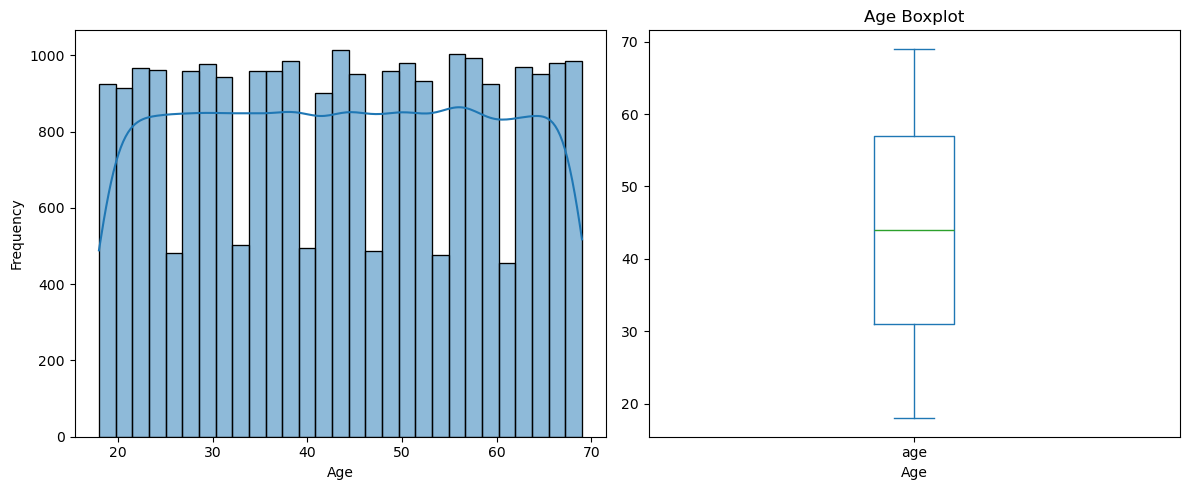

In [10]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'age',data = df4,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['age'].plot(kind='box',title='Age Boxplot')
plt.xlabel('Age')

plt.tight_layout()
plt.show()


**The distribution of age is approximately normal.**

**Customers generally fall between the ages of 20 to below 70.**

**No outliers are present**

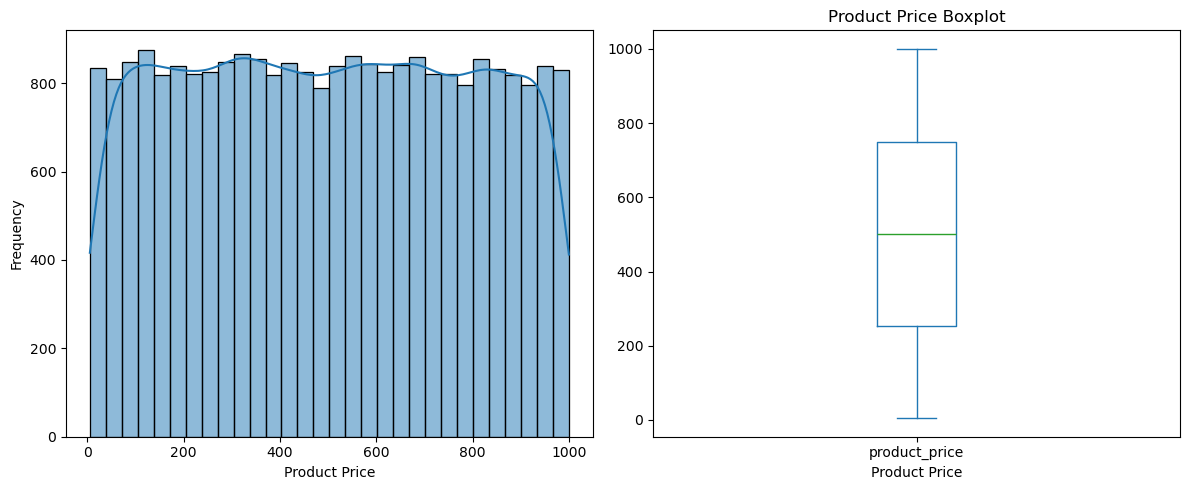

In [11]:


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'product_price',data = df4,kde=True)
plt.xlabel('Product Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['product_price'].plot(kind='box', title='Product Price Boxplot')
plt.xlabel('Product Price')

plt.tight_layout()
plt.show()


**The product prices are approximately normally distributed.**

**No outliers are present in the column,majority of the products are in a consistent price range.**

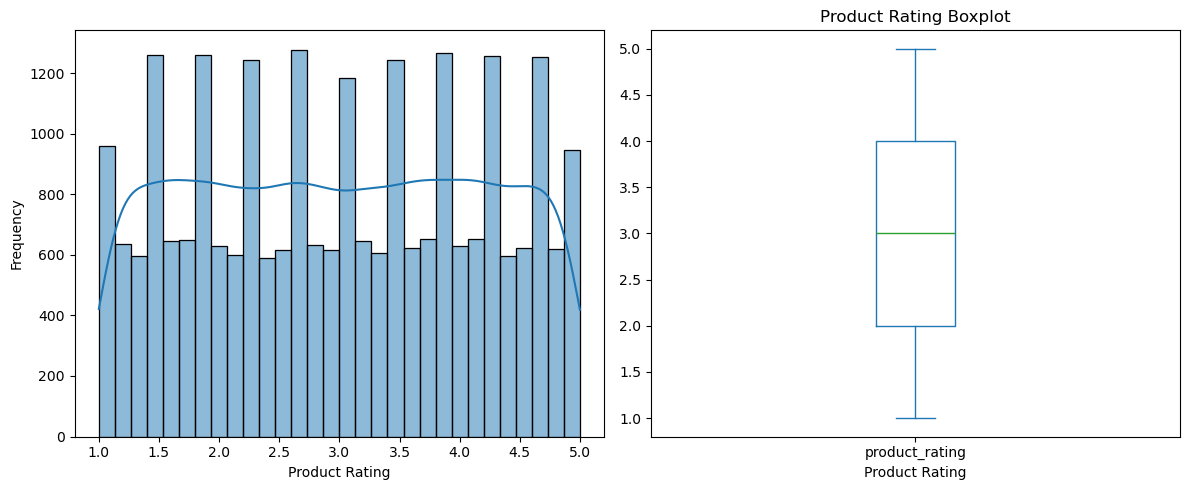

In [12]:


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'product_rating',data = df4,kde=True)
plt.xlabel('Product Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['product_rating'].plot(kind='box', title='Product Rating Boxplot')
plt.xlabel('Product Rating')

plt.tight_layout()
plt.show()


**The ratings are relatively balanced.Slight clusters at extreme ratings indicate some products recieved very low/very high ratings**


**The product ratings are consistent, with no outliers. Customers generally rate within the expected range.**

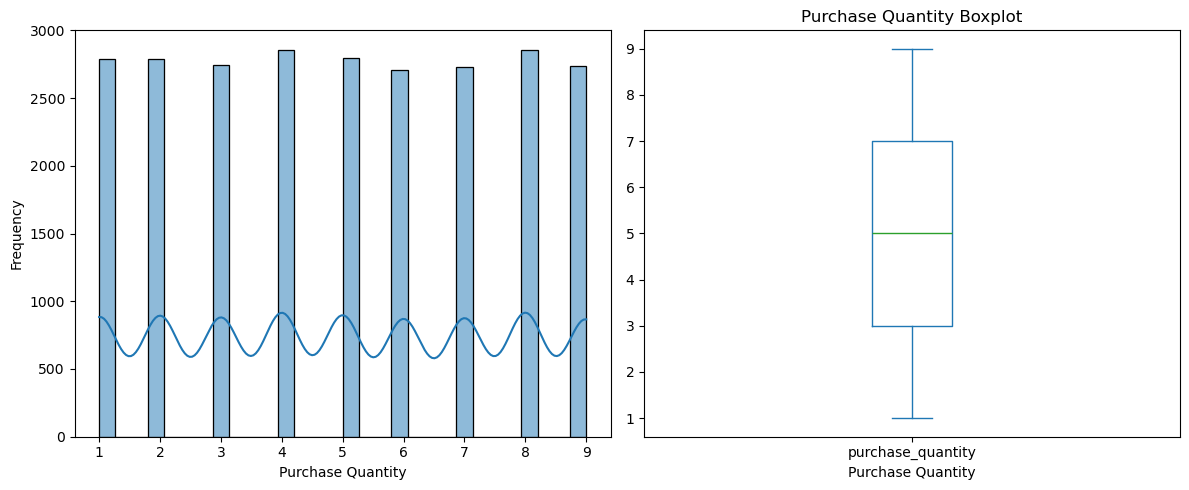

In [13]:


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'purchase_quantity',data = df4,kde=True)
plt.xlabel('Purchase Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['purchase_quantity'].plot(kind='box', title='Purchase Quantity Boxplot')
plt.xlabel('Purchase Quantity')

plt.tight_layout()
plt.show()


**People tend to puchase small quantities rather then bulk quantities (more than 10)**

**No outliers were found**

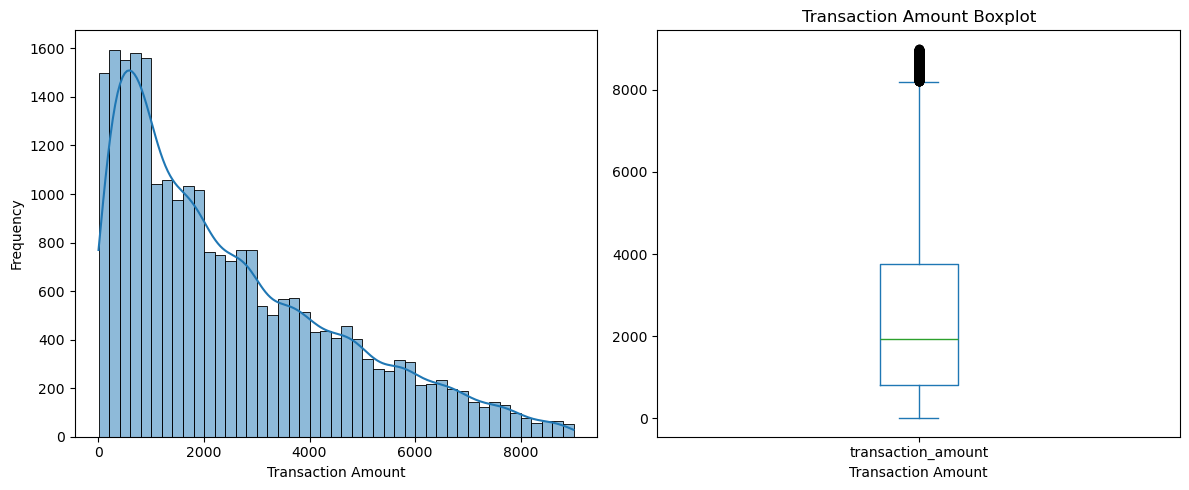

In [14]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'transaction_amount',data = df4,kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['transaction_amount'].plot(kind='box', title='Transaction Amount Boxplot')
plt.xlabel('Transaction Amount')

plt.tight_layout()
plt.show()


**Transaction amounts are concentrated in the lower range (below 2500). Highly right skewed.**

**A significant number of outliers represent high transaction amounts. Likely corresponds to bulk purchases**

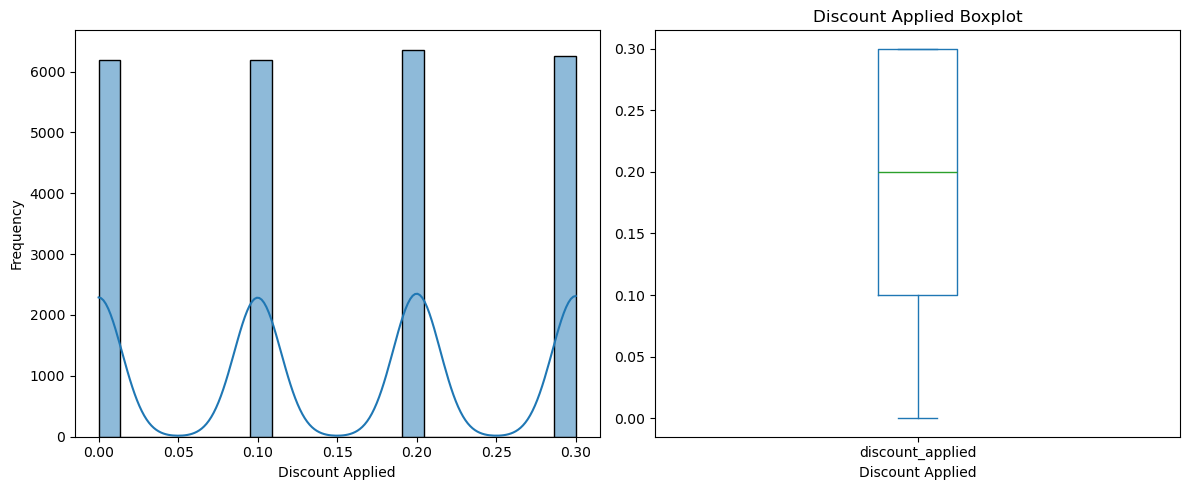

In [15]:


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'discount_applied',data = df4,kde=True)
plt.xlabel('Discount Applied')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['discount_applied'].plot(kind='box', title='Discount Applied Boxplot')
plt.xlabel('Discount Applied')

plt.tight_layout()
plt.show()


**Discounts are mostly clustered around whole number  percentages like 10% and 20%.**

**No outliers were found**

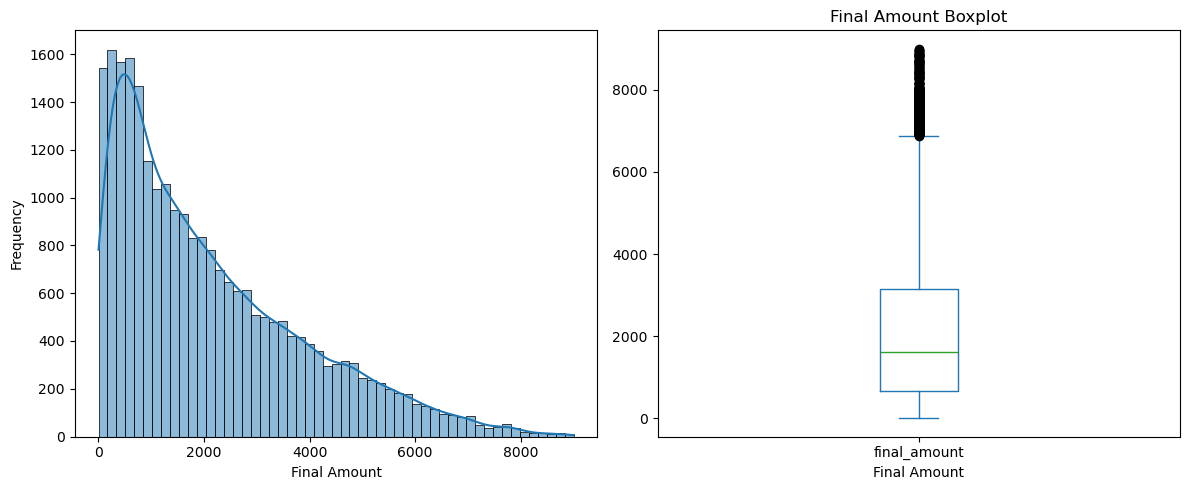

In [16]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'final_amount',data = df4,kde=True)
plt.xlabel('Final Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['final_amount'].plot(kind='box', title='Final Amount Boxplot')
plt.xlabel('Final Amount')

plt.tight_layout()
plt.show()


**Most final amounts are in the lower range (below 2500).This might be due to affordability among customers.**

**Significant number if outliers present, probably due to larges quantity of orders or high purchase amounts.**

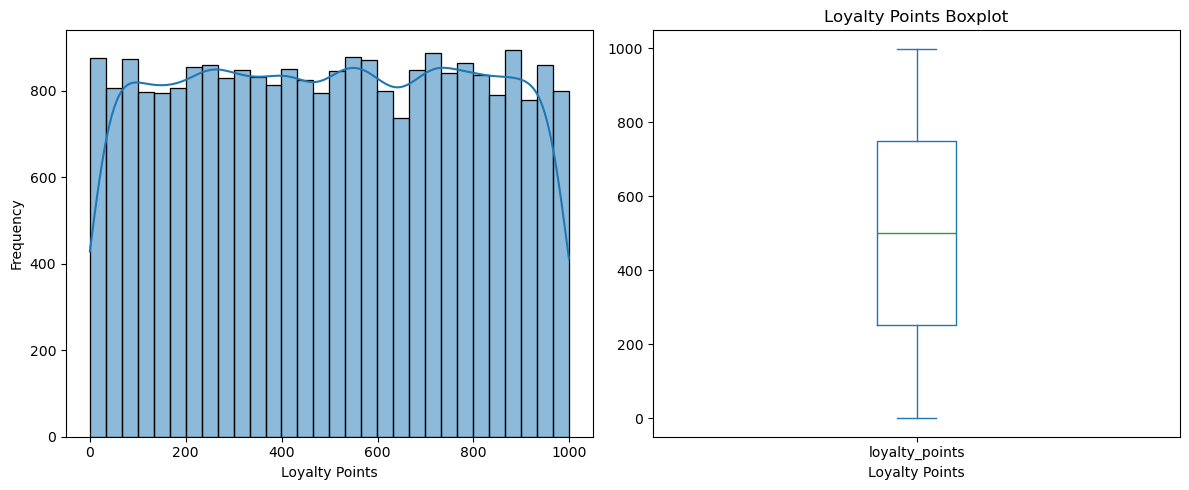

In [17]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x= 'loyalty_points',data = df4,kde=True)
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df4['loyalty_points'].plot(kind='box', title='Loyalty Points Boxplot')
plt.xlabel('Loyalty Points')

plt.tight_layout()
plt.show()



**Loyalty points are almost normally distributed , indicating that few customers have very low or very high points.**

**No outliers are found**

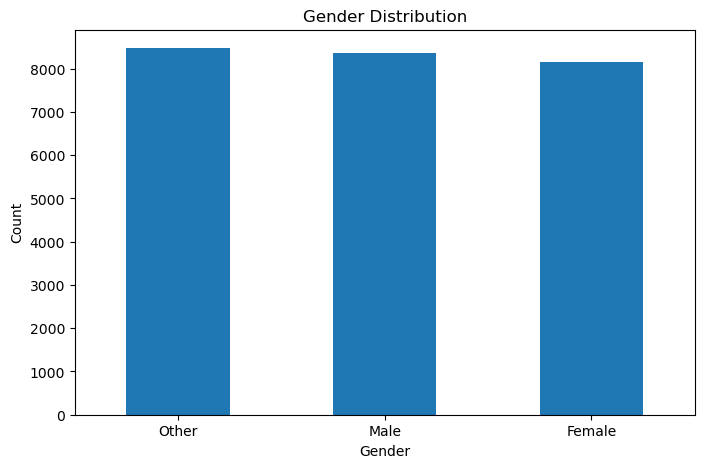

In [18]:

plt.figure(figsize=(8, 5))
df4['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Other gender has highest number as compared to both 'Males' and 'Females'**

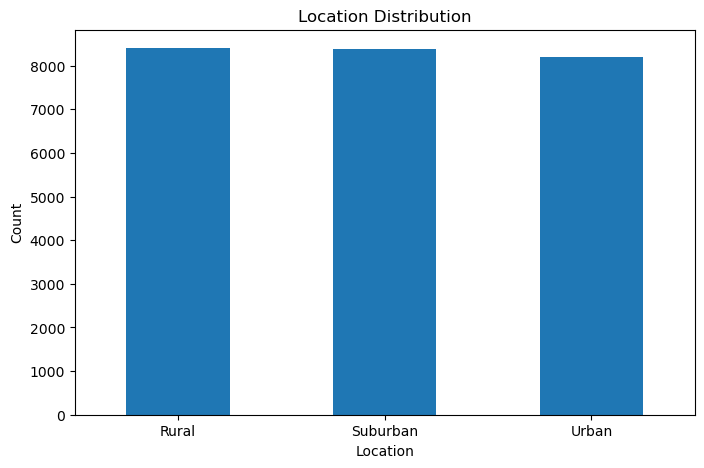

In [19]:

plt.figure(figsize=(8, 5))
df4['location'].value_counts().plot(kind='bar', title='Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**More number of customers are from Rural areas closely followed by Sub-urban.**

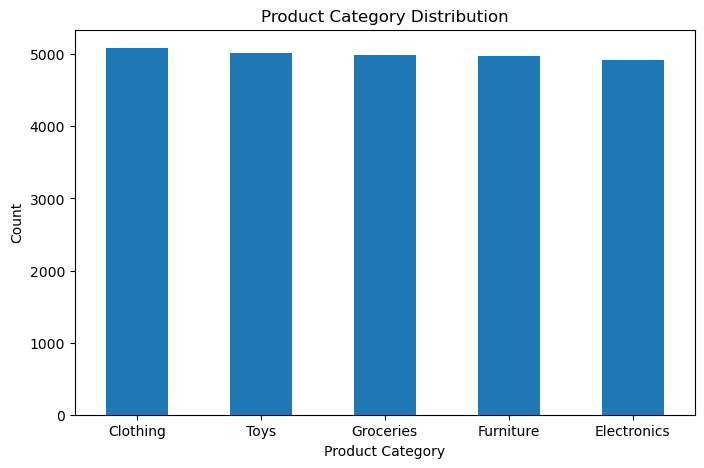

In [20]:


plt.figure(figsize=(8, 5))
df4['product_category'].value_counts().plot(kind='bar', title='Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Clothing has highest count followed by Toys category indicating that customers tend to purchase clothing as a whole.**

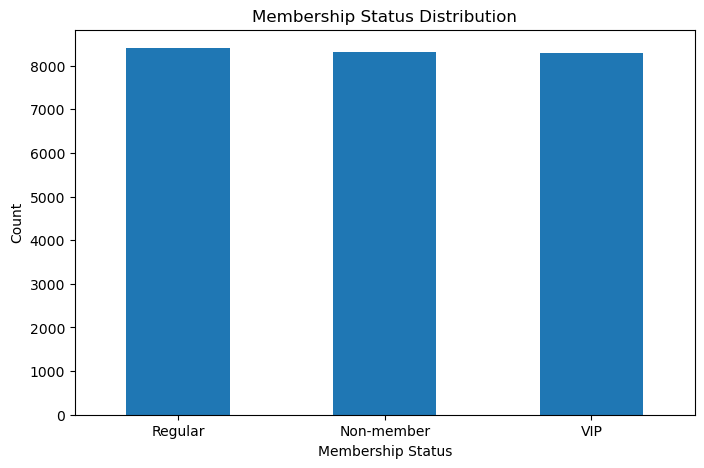

In [21]:

plt.figure(figsize=(8, 5))
df4['membership_status'].value_counts().plot(kind='bar', title='Membership Status Distribution')
plt.xlabel('Membership Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Most customers have membership status of 'Regular', closely followed by 'Non-members'.**

**VIP members have the lowest count**

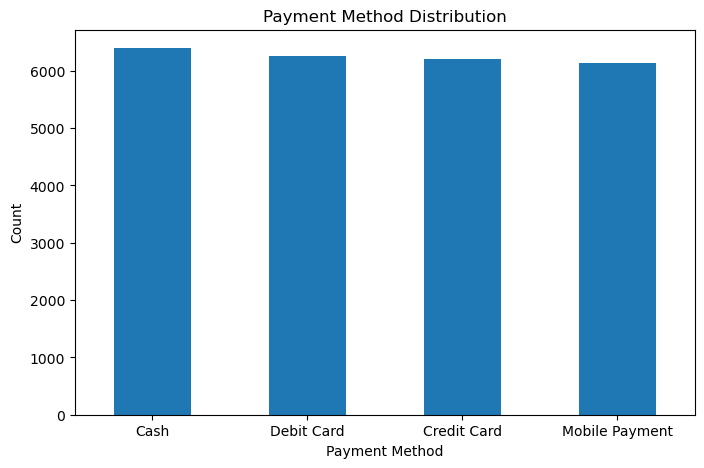

In [22]:

plt.figure(figsize=(8, 5))
df4['payment_method'].value_counts().plot(kind='bar', title='Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Cash is the most used payment method while customers who pay with mobile are lowest in number**

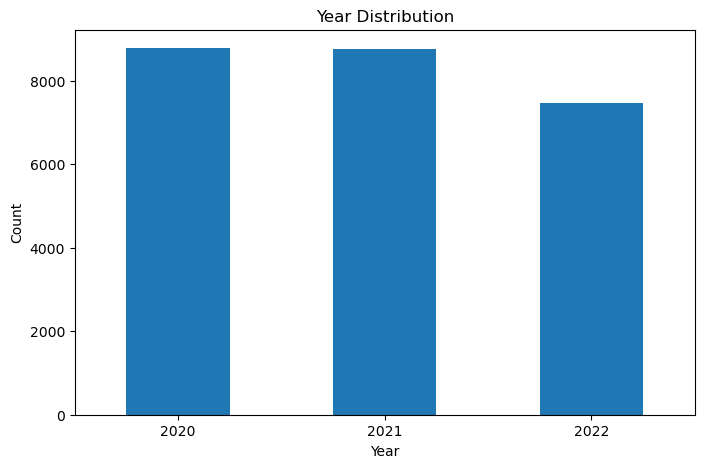

In [23]:
plt.figure(figsize=(8, 5))
df4['year'].value_counts().plot(kind='bar', title='Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**No drastic change in pattern over the years.** 

**2022 has the lowest amount of purchases made**

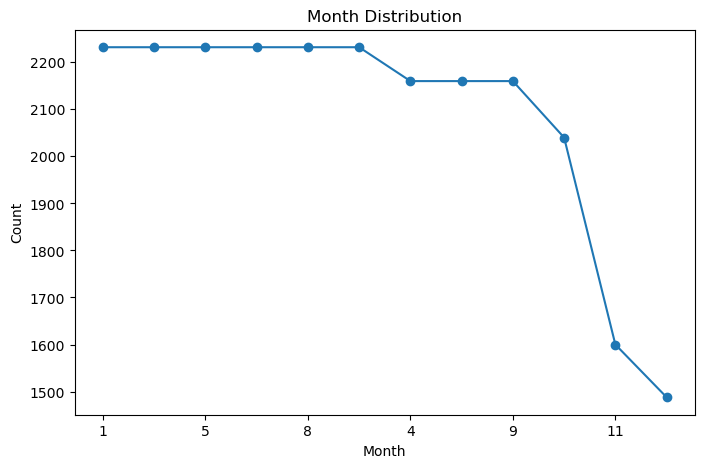

In [24]:
plt.figure(figsize=(8, 5))
df4['month'].value_counts().plot(kind='line',marker='o' ,title='Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

**Purchases remain constant through the early months but fall significantly during the latter half . This might be due to seasonal pricing or non-sale seasons**

# Multivariate Analysis for Numerical - Numerical

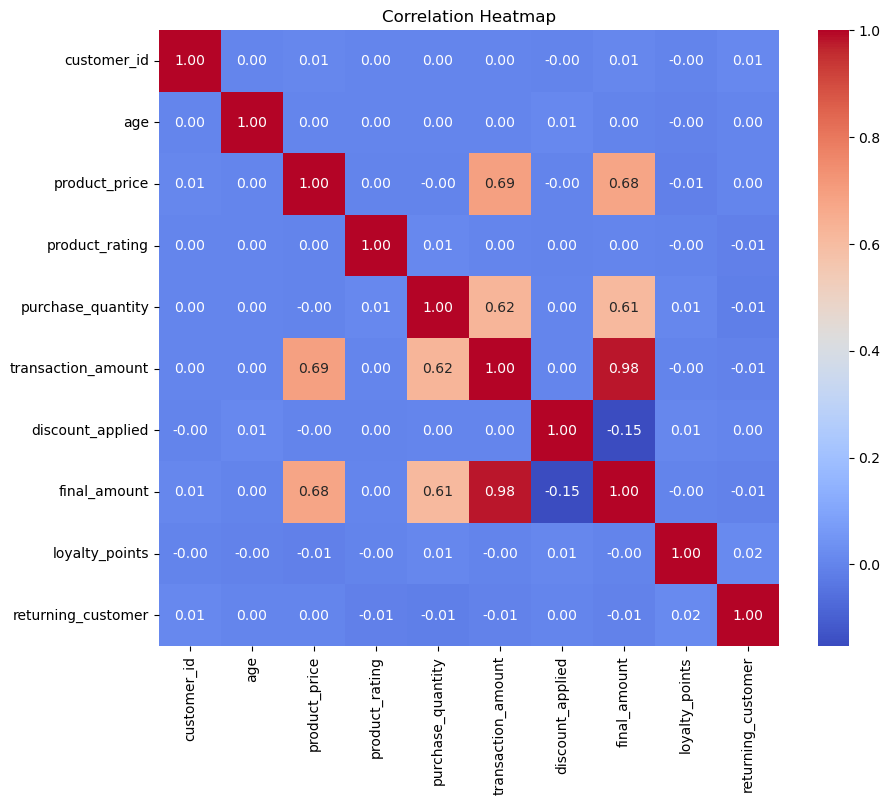

In [25]:
numeric_columns = df4.select_dtypes(include=['number'])
corr = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### The heatmap visualizes the correlation matrix for various variables, where the values range between -1 and 1.

# Highly Correlated Variables:

product_price and transaction_amount: Strong positive correlation (0.69), suggesting that higher product prices lead to higher transaction amounts.

purchase_quantity and transaction_amount: Positive correlation (0.62), indicating that the more units purchased, the greater the transaction amount.

transaction_amount and final_amount: Very high correlation (0.98), implying that these two are closely related, possibly due to the final amount being derived from the transaction amount (after applying discounts).

# Weak or No Correlation:

Variables like age, product_rating, and loyalty_points exhibit near-zero correlations with most others, suggesting limited or no linear relationships with the other features.

Customer-specific features like age or loyalty points don't seem to strongly influence the transactional variables in this dataset.

Discounts appear to slightly reduce the final amount, but the correlation isn't very strong.

# Negative Correlation:

discount_applied and final_amount: Slight negative correlation (-0.15), indicating that as discounts increase, the final transaction amount slightly decreases, as expected.

# Scatter Plot for Highly Correlated Variables

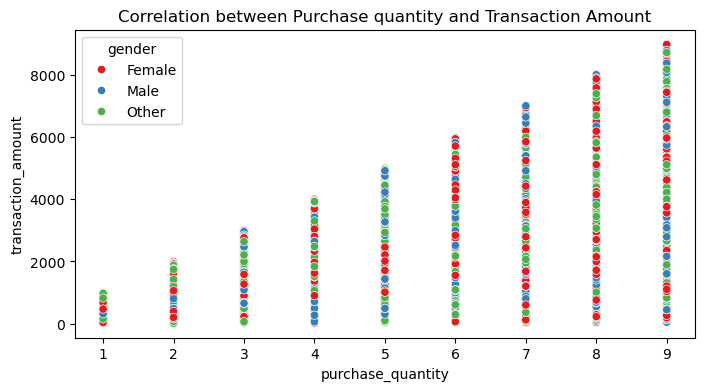

In [26]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='purchase_quantity', y='transaction_amount', hue='gender', data=df4, palette=sns.color_palette('Set1', 4))
plt.title('Correlation between Purchase quantity and Transaction Amount')
plt.show()

**With increase in purchase_quantity transaction_amount also increase**

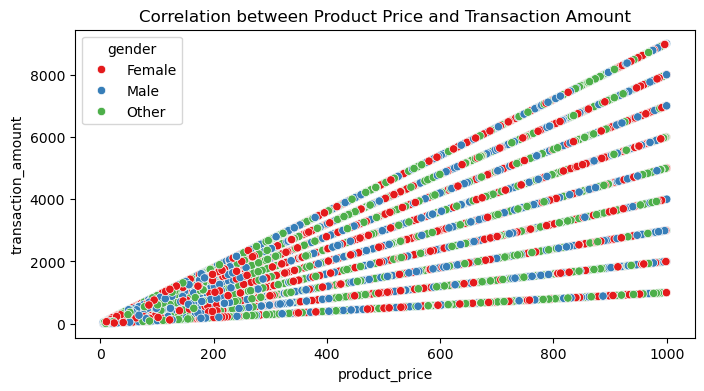

In [27]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='product_price', y='transaction_amount', hue='gender', data=df4, palette=sns.color_palette('Set1', 4))
plt.title('Correlation between Product Price and Transaction Amount')
plt.show()

**The plot shows that there is a positive relationship between transaction amount and product price**

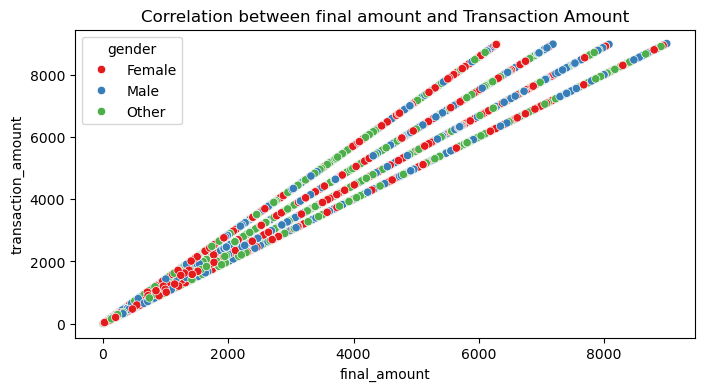

In [28]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='final_amount', y='transaction_amount', hue='gender', data=df4, palette=sns.color_palette('Set1', 4))
plt.title('Correlation between final amount and Transaction Amount')
plt.show()

**The plot shows that there is a positive relationship between transaction amount and final amount**

# Multivariate Analysis for Numerical - Categorical

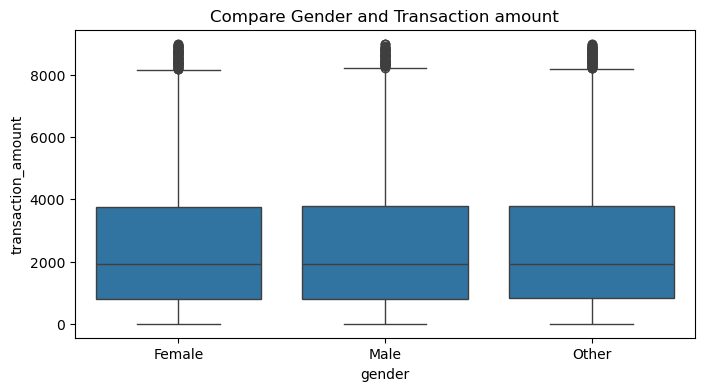

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'gender', y = 'transaction_amount', data = df4)
plt.title('Compare Gender and Transaction amount')
plt.show()

**The median transaction amount is similar across all three gender categories. This suggests there isn't a significant difference in central tendency between genders.**

**There are noticeable outliers in all categories, with some transactions exceeding 8000. This indicates that a few individuals in each group spend significantly more than the majority.**

**Gender does not appear to have a strong influence on transaction amount in this dataset.**

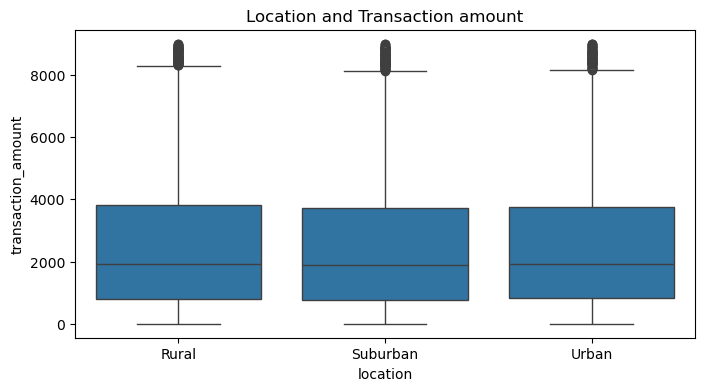

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'location', y = 'transaction_amount', data = df4)
plt.title('Location and Transaction amount')
plt.show()

**The median transaction amount is similar across all three location categories. This suggests there isn't a significant difference in central tendency between genders.**

**There are noticeable outliers in all categories, with some transactions exceeding 8000. This indicates that a few individuals in each group spend significantly more than the majority.**

**location does not appear to have a strong influence on transaction amount in this dataset.**

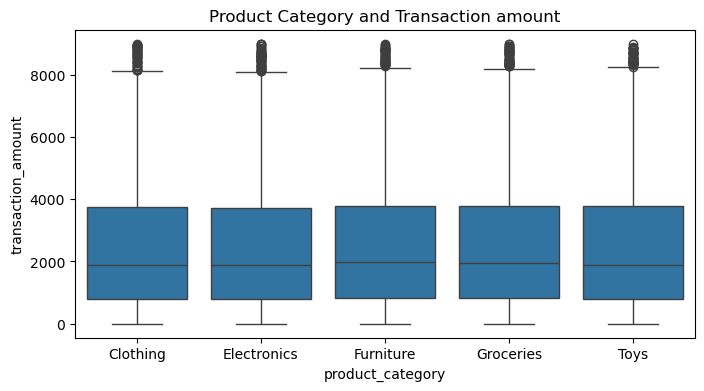

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'product_category', y = 'transaction_amount', data = df4)
plt.title('Product Category and Transaction amount')
plt.show()

**The median transaction amount is similar across all five product categories. This suggests there isn't a significant difference in central tendency between genders.**

**There are noticeable outliers in all categories, with some transactions exceeding 8000. This indicates that a few individuals in each group spend significantly more than the majority.**

**product category does not appear to have a strong influence on transaction amount in this dataset.**

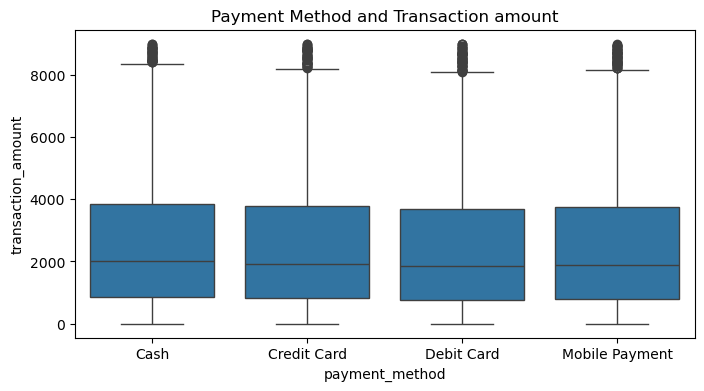

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'payment_method', y = 'transaction_amount', data = df4)
plt.title('Payment Method and Transaction amount')
plt.show()

**The median transaction amount is similar across all four payment method. This suggests there isn't a significant difference in central tendency between genders.**

**There are noticeable outliers in all categories, with some transactions exceeding 8000. This indicates that a few individuals in each group spend significantly more than the majority.**

**Payment method does not appear to have a strong influence on transaction amount in this dataset.**

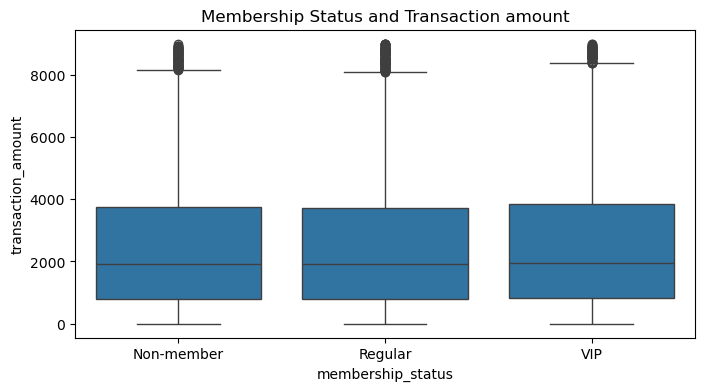

In [33]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'membership_status', y = 'transaction_amount', data = df4)
plt.title('Membership Status and Transaction amount')
plt.show()

**The median transaction amount is similar across all three membership status. This suggests there isn't a significant difference in central tendency between genders.**

**There are noticeable outliers in all categories, with some transactions exceeding 8000. This indicates that a few individuals in each group spend significantly more than the majority.**

**membership status does not appear to have a strong influence on transaction amount in this dataset.**

# Multivariate analysis for  Categorical - Categorical

In [34]:
crosstab = pd.crosstab(df4['returning_customer'], df4['gender'],margins=True, margins_name="Total")
print(crosstab)

gender              Female  Male  Other  Total
returning_customer                            
0                     4088  4155   4290  12533
1                     4074  4207   4186  12467
Total                 8162  8362   8476  25000


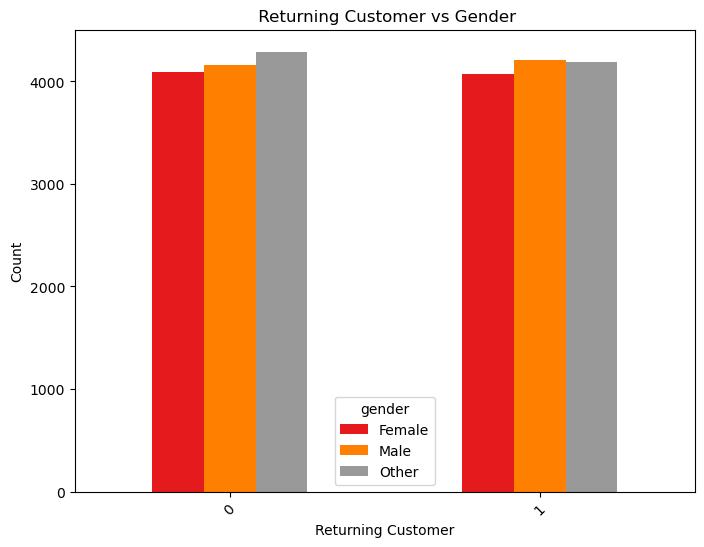

In [35]:
crosstab.drop(columns='Total', index='Total').plot(kind='bar', stacked=False, figsize=(8, 6), colormap='Set1')

plt.title(' Returning Customer vs Gender')
plt.xlabel('Returning Customer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Gender distribution among returning and non-returning customers is balanced and does not indicate a significant disparity.**

**The dataset suggests that customer loyalty (returning customers) is not strongly linked to gender.**



In [36]:
crosstab = pd.crosstab(df4['returning_customer'], df4['location'],margins=True, margins_name="Total")
print(crosstab)

location            Rural  Suburban  Urban  Total
returning_customer                               
0                    4208      4207   4118  12533
1                    4196      4181   4090  12467
Total                8404      8388   8208  25000


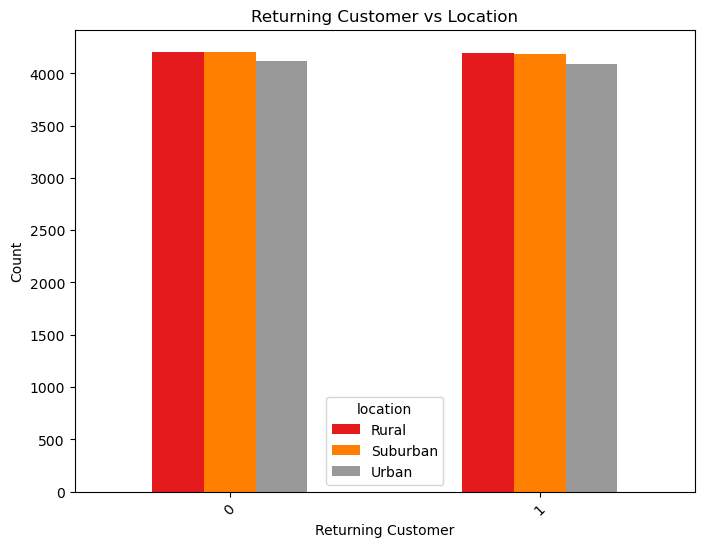

In [37]:
crosstab.drop(columns='Total', index='Total').plot(kind='bar', stacked=False, figsize=(8, 6), colormap='Set1')

plt.title('Returning Customer vs Location')
plt.xlabel('Returning Customer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Location distribution among returning and non-returning customers is balanced and does not indicate a significant disparity.**

**The dataset suggests that customer loyalty (returning customers) is not strongly linked to Location.**

In [38]:
crosstab = pd.crosstab(df4['returning_customer'], df4['product_category'],margins=True, margins_name="Total")
print(crosstab)

product_category    Clothing  Electronics  Furniture  Groceries  Toys  Total
returning_customer                                                          
0                       2562         2419       2482       2512  2558  12533
1                       2523         2507       2498       2478  2461  12467
Total                   5085         4926       4980       4990  5019  25000


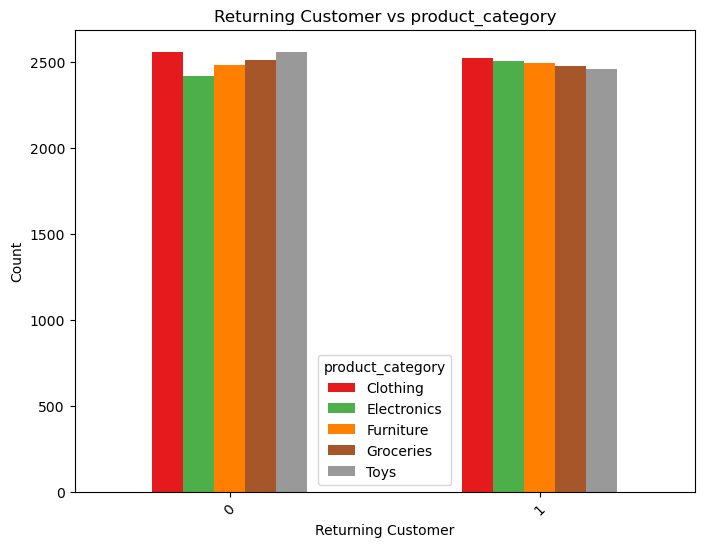

In [39]:
crosstab.drop(columns='Total', index='Total').plot(kind='bar', stacked=False, figsize=(8, 6), colormap='Set1')

plt.title('Returning Customer vs product_category')
plt.xlabel('Returning Customer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Product category distribution among returning and non-returning customers is balanced and does not indicate a significant disparity.**

**The dataset suggests that customer loyalty (returning customers) is not strongly linked to Product category.**

In [40]:
crosstab = pd.crosstab(df4['returning_customer'], df4['payment_method'],margins=True, margins_name="Total")
print(crosstab)

payment_method      Cash  Credit Card  Debit Card  Mobile Payment  Total
returning_customer                                                      
0                   3182         3118        3162            3071  12533
1                   3214         3088        3101            3064  12467
Total               6396         6206        6263            6135  25000


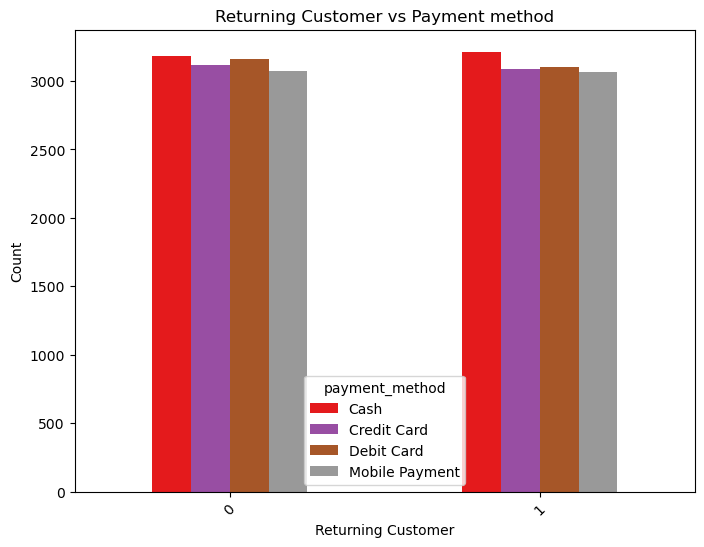

In [41]:
crosstab.drop(columns='Total', index='Total').plot(kind='bar', stacked=False, figsize=(8, 6), colormap='Set1')

plt.title('Returning Customer vs Payment method')
plt.xlabel('Returning Customer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Payment method distribution among returning and non-returning customers is balanced and does not indicate a significant disparity.**

**The dataset suggests that customer loyalty (returning customers) is not strongly linked to Payment Method.**

In [42]:
crosstab = pd.crosstab(df4['returning_customer'], df4['membership_status'],margins=True, margins_name="Total")
print(crosstab)

membership_status   Non-member  Regular   VIP  Total
returning_customer                                  
0                         4215     4167  4151  12533
1                         4087     4236  4144  12467
Total                     8302     8403  8295  25000


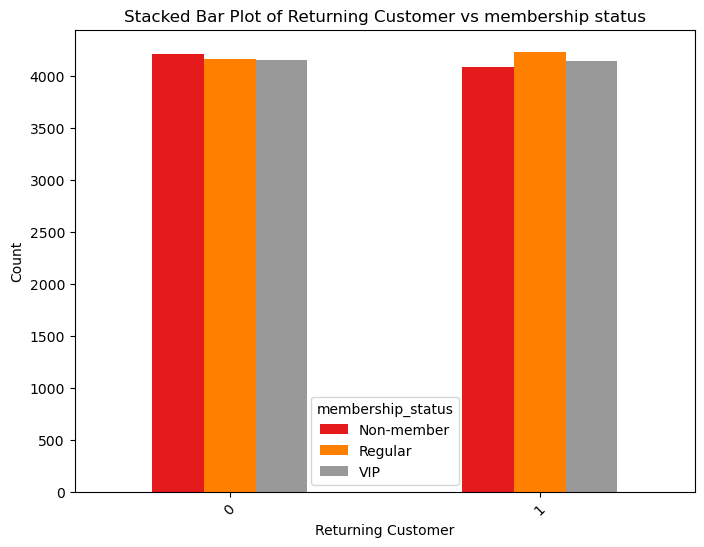

In [43]:
crosstab.drop(columns='Total', index='Total').plot(kind='bar', stacked=False, figsize=(8, 6), colormap='Set1')

plt.title('Stacked Bar Plot of Returning Customer vs membership status')
plt.xlabel('Returning Customer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Membership status distribution among returning and non-returning customers is balanced and does not indicate a significant disparity.**

**The dataset suggests that customer loyalty (returning customers) is not strongly linked to Membership status.**

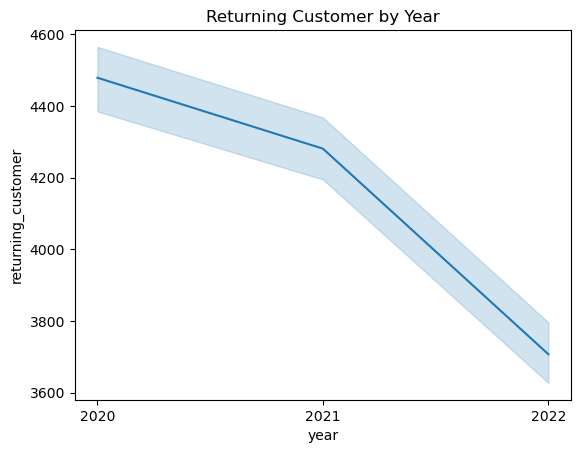

In [44]:
sns.lineplot(x='year', y='returning_customer', data=df4, estimator=sum)
plt.title('Returning Customer by Year')
plt.show()

**The number of returning customers is declining over time from 2020 to 2022.
The decrease appears to be linear and consistent.The steady decline over the years may suggest that the business is facing challenges in retaining returning customers.**

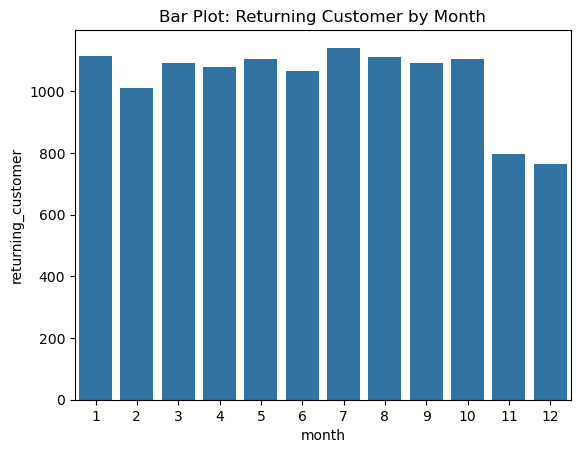

In [45]:
sns.barplot(x='month', y='returning_customer', data=df4, estimator=sum, ci=None)
plt.title('Bar Plot: Returning Customer by Month')
plt.show()

**January’s spike could reflect customer behavior influenced by sales or promotional events at the start of the year.**

**The consistent mid-year numbers suggest stable operations, likely attributed to effective customer retention strategies.**

**Year-end drops might point toward gaps in retention campaigns during this period or external economic factors.**

# BIVARIATE ANALYSIS FOR NUMERCIAL VARIABLES

In [46]:
numerical_vars = ['customer_id', 'age', 'product_price', 'product_rating', 
                  'purchase_quantity', 'transaction_amount', 'discount_applied', 
                  'final_amount', 'loyalty_points', 'returning_customer']

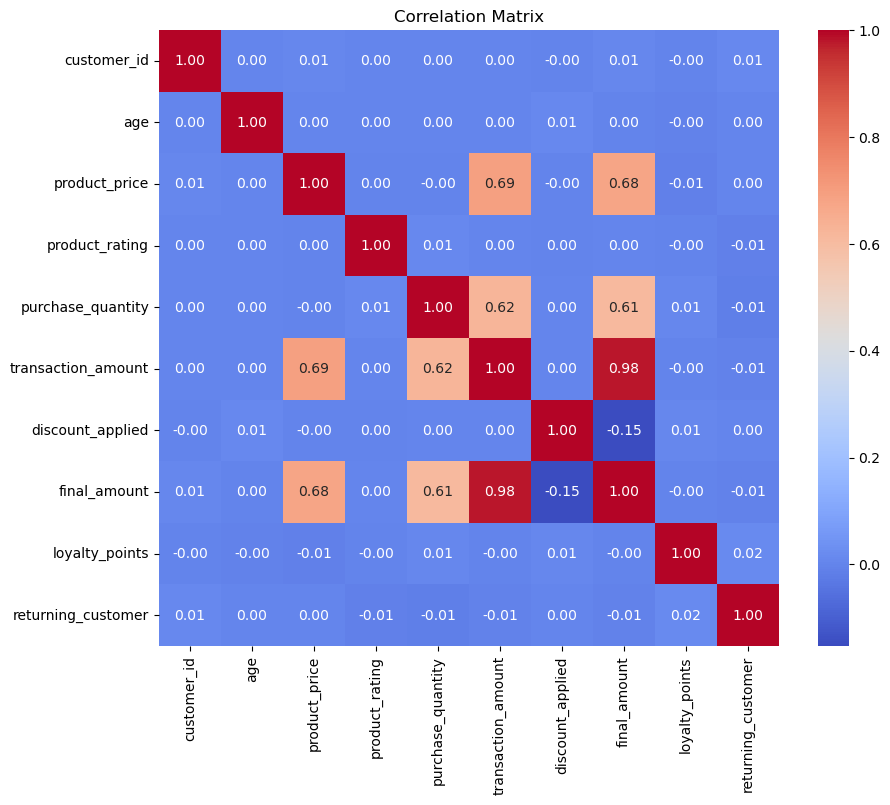

In [47]:
correlation_matrix = df4[numerical_vars].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

**1)transaction_amount and final_amount show a very strong positive correlation (~1.00).This indicates that these variables are almost linearly dependent.**

**2)Similarly, purchase_quantity is positively correlated with both transaction_amount and final_amount.This suggests that higher purchase quantities drive larger transaction and final amounts.**

**3)No Correlation Between product_rating and Other Variables**

**4)Weak Correlation Between age and Other Variables**

**5)discount_applied shows a moderate negative correlation with final_amount, which means higher discounts reduce the final amount paid.**

**6)Weak Correlation Between loyalty_points and Other Variables.**

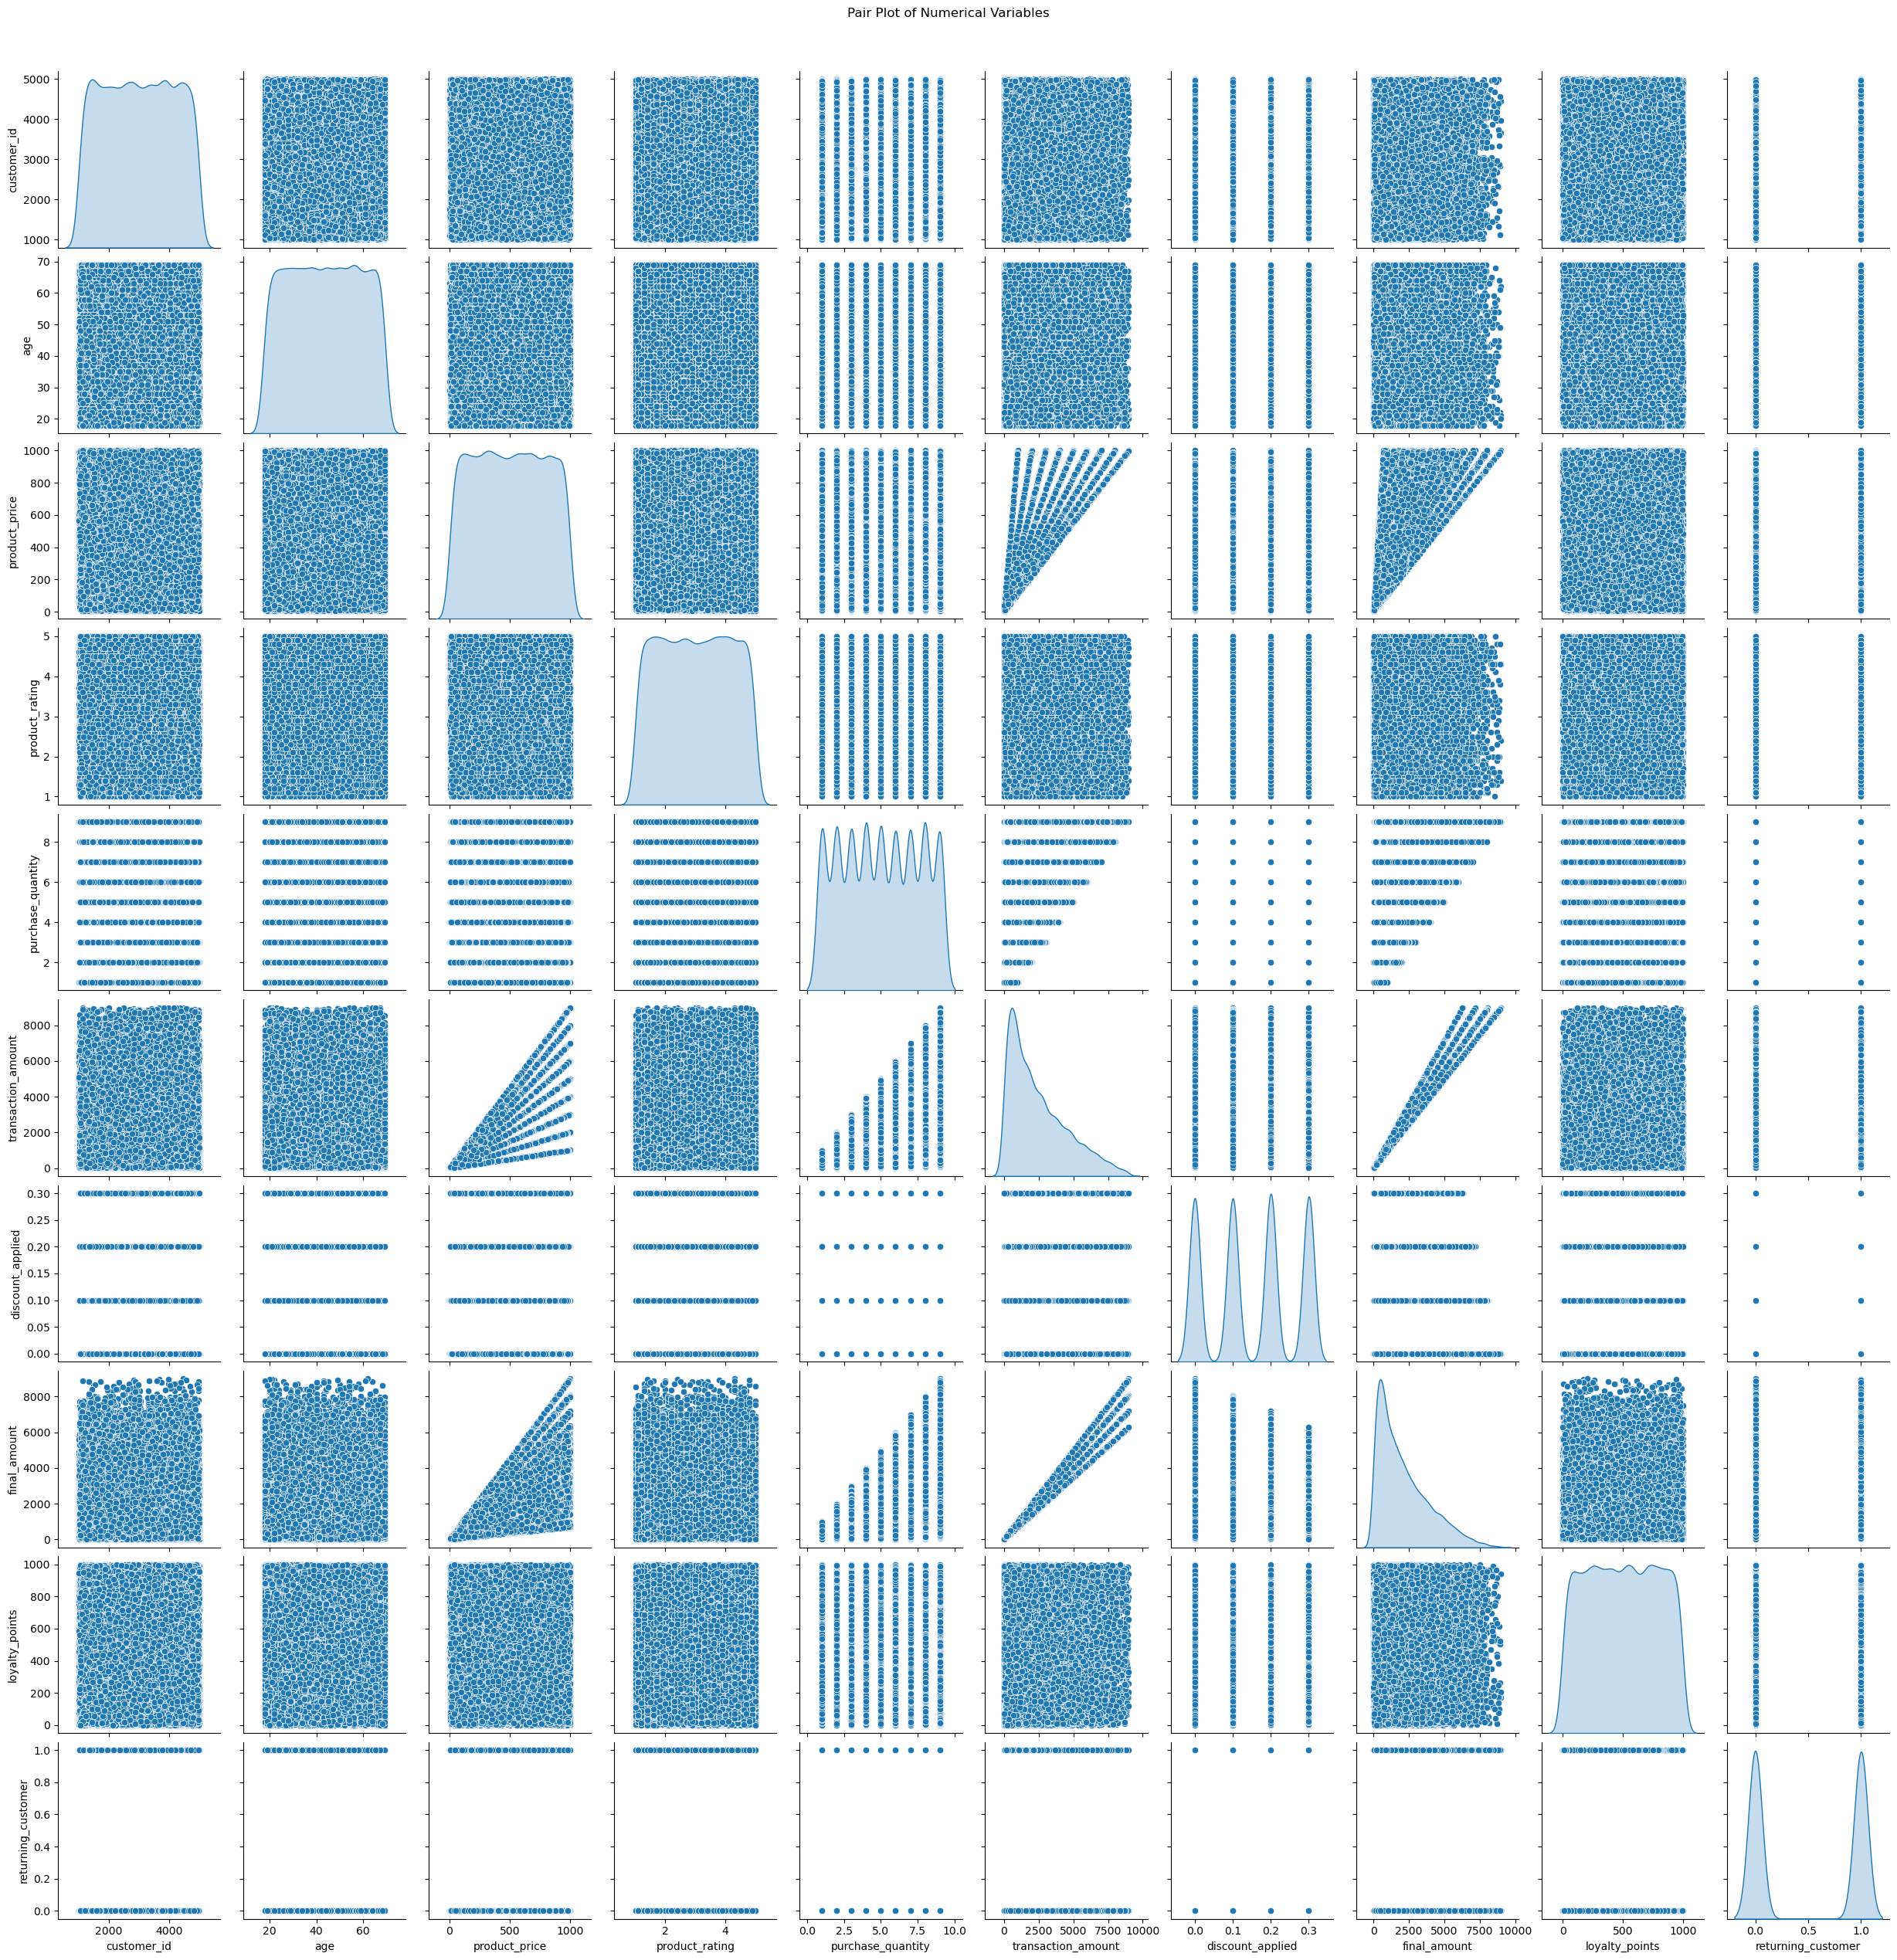

In [48]:
#Pair Plot for Numerical Variables
sns.pairplot(df4[numerical_vars], diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

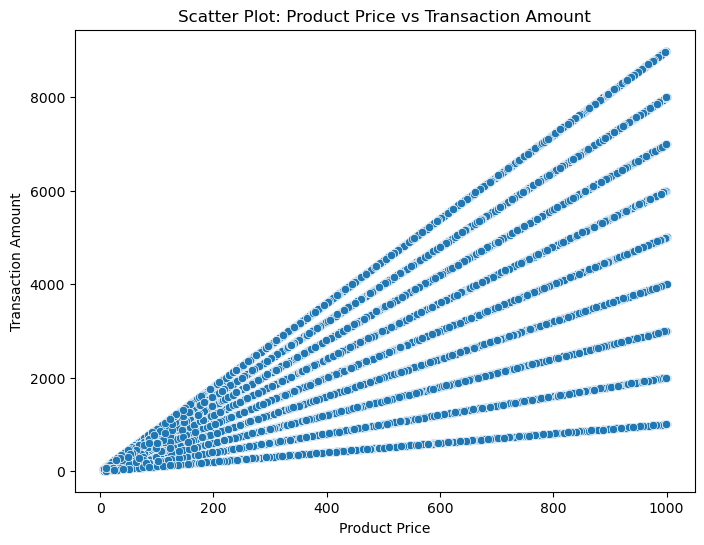

In [49]:
# Scatter Plot 'product_price' vs 'transaction_amount')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='product_price', y='transaction_amount', data=df4)
plt.title("Scatter Plot: Product Price vs Transaction Amount")
plt.xlabel("Product Price")
plt.ylabel("Transaction Amount")
plt.show()

**As Product Price increases, the Transaction Amount also increases for each band, showing a strong positive linear relationship.The distribution of points along the x-axis suggests that customers buy products at various price points consistently.**



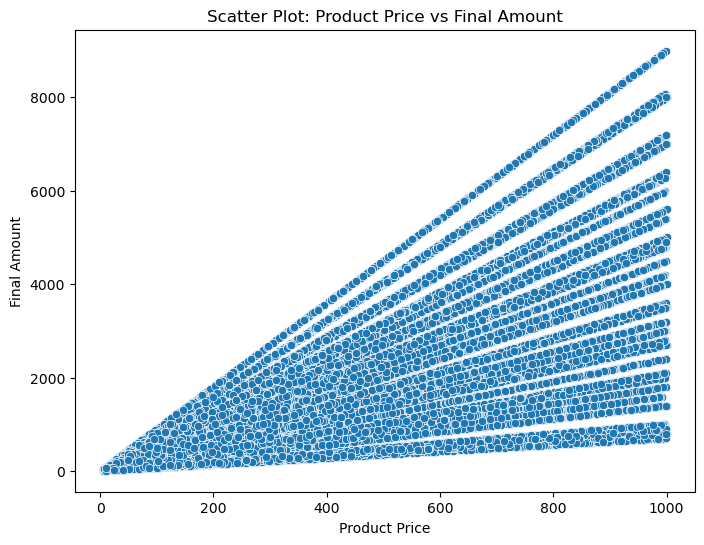

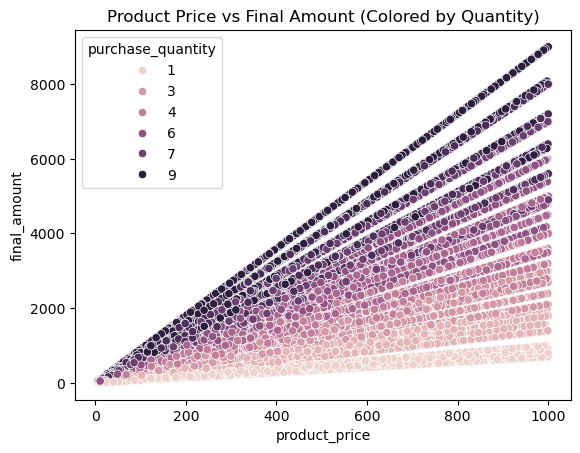

In [50]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='product_price', y='final_amount', data=df4)
plt.title("Scatter Plot: Product Price vs Final Amount")
plt.xlabel("Product Price")
plt.ylabel("Final Amount")
plt.show()

sns.scatterplot(x='product_price', y='final_amount', hue='purchase_quantity', data=df4)
plt.title("Product Price vs Final Amount (Colored by Quantity)")
plt.show()

**A strong linear trend is observed, where the Final Amount increases proportionally with the Product Price for each band, indicating a direct relationship.the data points are spread evenly across the product price range, suggesting consistent pricing strategies.**

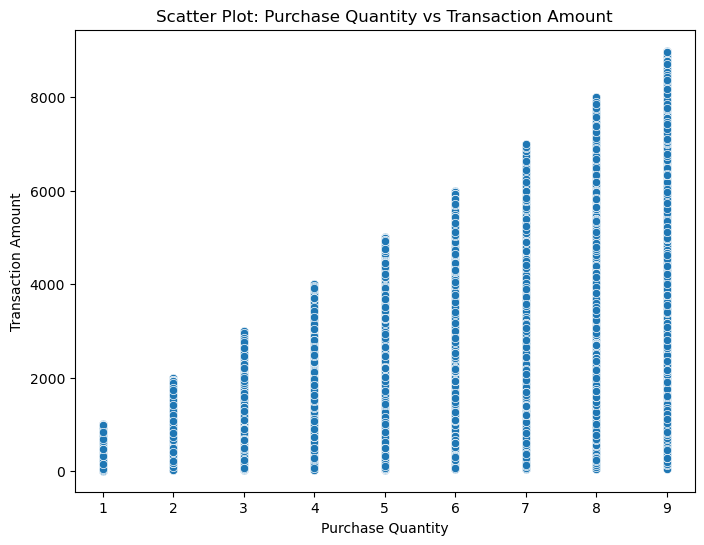

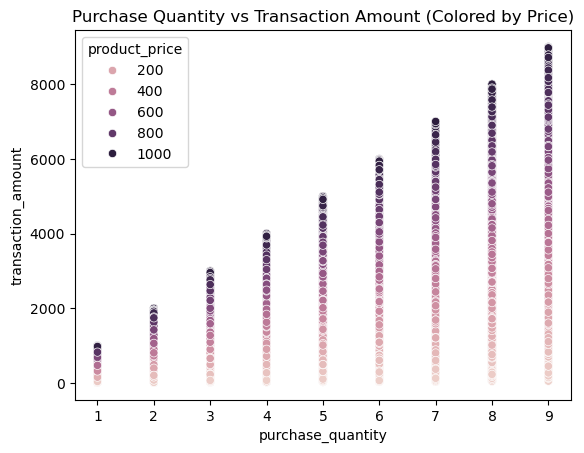

In [51]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='purchase_quantity', y='transaction_amount', data=df4)
plt.title("Scatter Plot: Purchase Quantity vs Transaction Amount")
plt.xlabel("Purchase Quantity")
plt.ylabel("Transaction Amount")
plt.show()

sns.scatterplot(x='purchase_quantity', y='transaction_amount', hue='product_price', data=df4)
plt.title("Purchase Quantity vs Transaction Amount (Colored by Price)")
plt.show()

**There is a clear linear relationship between Purchase Quantity and Transaction Amount. As the purchase quantity increases, the transaction amount also increases proportionally. Within each vertical band, there is some variation in transaction amounts. This suggests that the Product Price varies across transactions, even when the quantity is the same (e.g., different products or price tiers).**

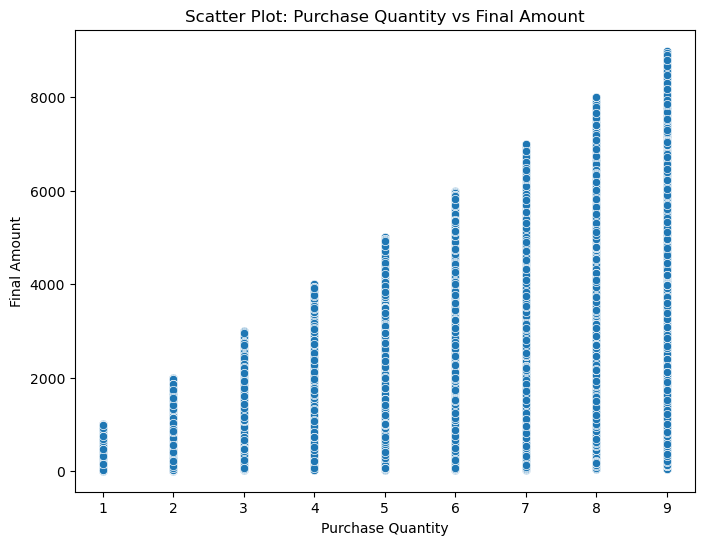

In [52]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='purchase_quantity', y='final_amount', data=df4)
plt.title("Scatter Plot: Purchase Quantity vs Final Amount")
plt.xlabel("Purchase Quantity")
plt.ylabel("Final Amount")
plt.show()

**There is a clear linear relationship between Purchase Quantity and Final Amount. As the purchase quantity increases, the final amount also increases proportionally. Within each vertical band, there is some variation in final amounts. This suggests that the Product Price varies across transactions, even when the quantity is the same (e.g., different products or price tiers).**

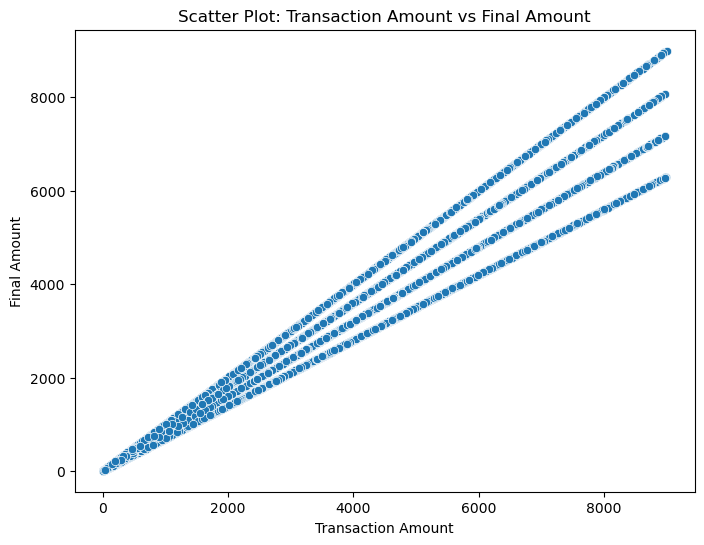

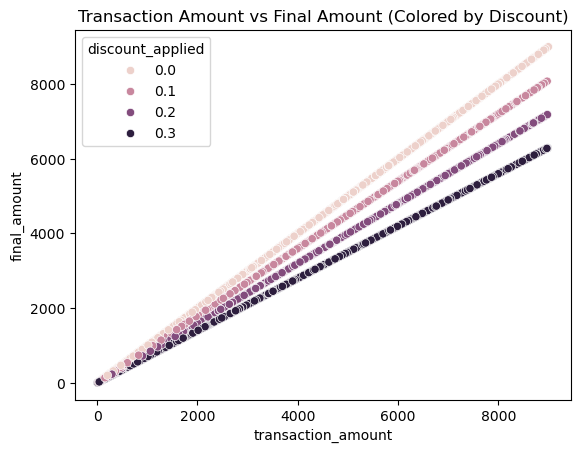

In [53]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='transaction_amount', y='final_amount', data=df4)
plt.title("Scatter Plot: Transaction Amount vs Final Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Final Amount")
plt.show()

sns.scatterplot(x='transaction_amount', y='final_amount', hue='discount_applied', data=df4)
plt.title("Transaction Amount vs Final Amount (Colored by Discount)")
plt.show()

**A strong linear relationship exists between transaction amount and final amount, where the final amount increases as the transaction amount increases. However, the slope of the bands varies depending on the discount.Transactions with higher discounts will have lower final amounts for the same transaction amount.**

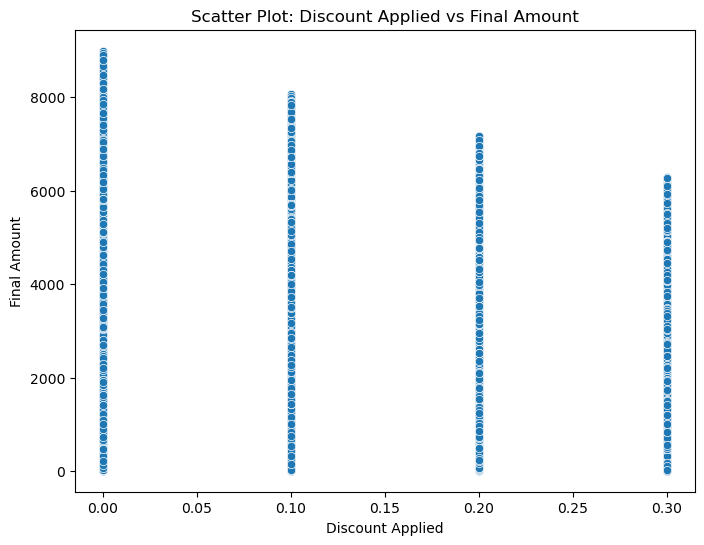

In [54]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='discount_applied', y='final_amount', data=df4)
plt.title("Scatter Plot: Discount Applied vs Final Amount")
plt.xlabel("Discount Applied")
plt.ylabel("Final Amount")
plt.show()

**No Strong Correlation Between Discount and Final Amount. The only thing we can infer is that the magnitude of final amount decreases as discount increases.**

# BIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES

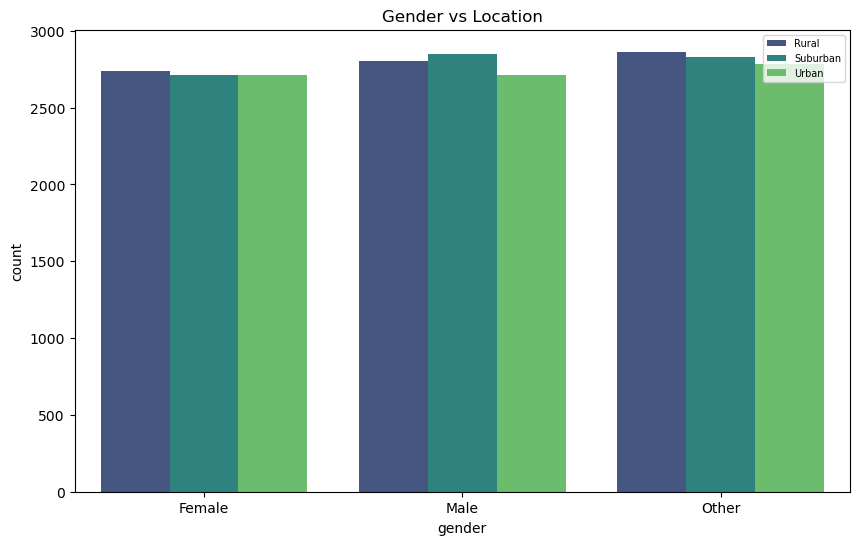

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='location', data=df4,palette="viridis")
plt.title("Gender vs Location")
plt.legend(prop={'size': 7}) 
plt.show()

**Distribution of genders is mostly even across locations.**

**Rural ares tend to have more Other gender than Male and Female**

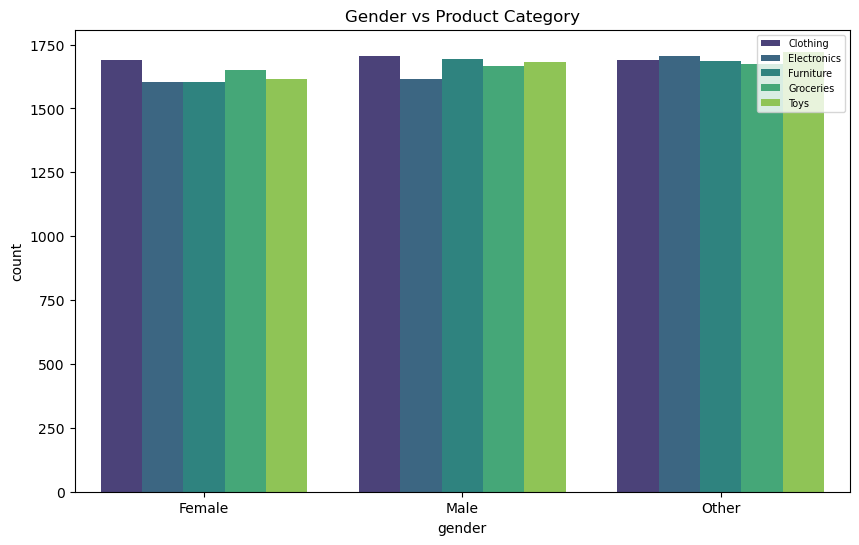

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='product_category', data=df4,palette="viridis")
plt.title("Gender vs Product Category")
plt.legend(prop={'size': 7}) 
plt.show()

**Males and Females are highest in number in the Clothing category**

**Other genders tend to be highest in Toys**

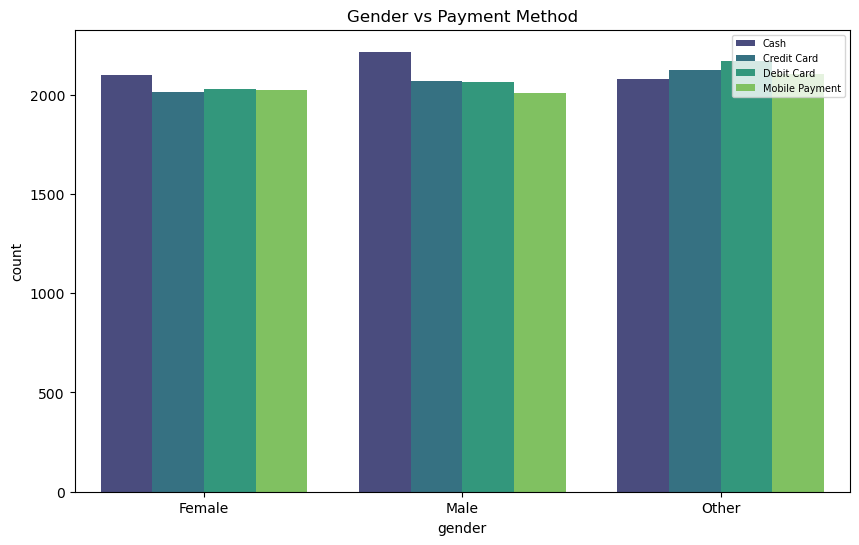

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='payment_method', data=df4,palette="viridis")
plt.title("Gender vs Payment Method")
plt.legend(prop={'size': 7}) 
plt.show()



**Males and Females tend to prefer Cash payments while Other genders tend to use Debit cards**

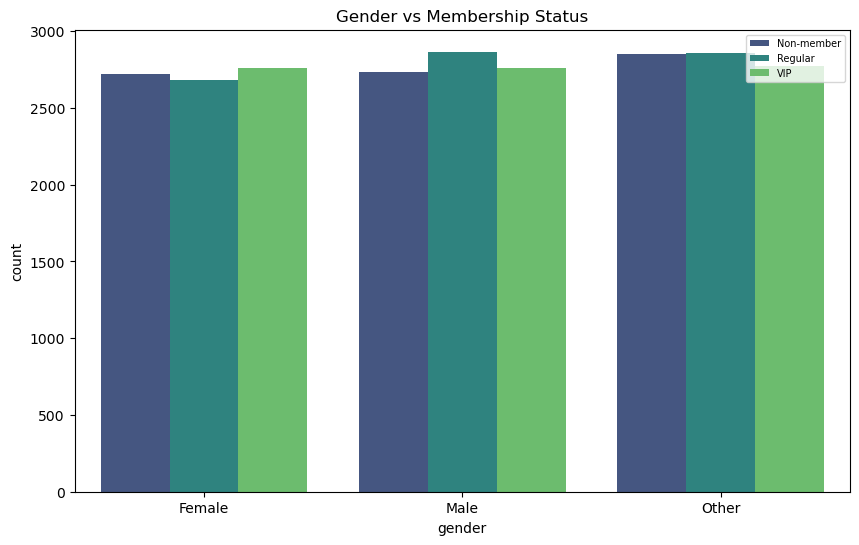

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='membership_status', data=df4,palette="viridis")
plt.title("Gender vs Membership Status")
plt.legend(prop={'size': 7}) 
plt.show()


In [59]:
df4.groupby(['gender','membership_status']).size()

gender  membership_status
Female  Non-member           2719
        Regular              2680
        VIP                  2763
Male    Non-member           2734
        Regular              2866
        VIP                  2762
Other   Non-member           2849
        Regular              2857
        VIP                  2770
dtype: int64

**There are more Regulars in the Male gender as compared to VIP or non-members**

**There are lesser number of  Regulars in the Female gender as compared to VIP or non-members**

**VIP membership is equally popular among all the genders**

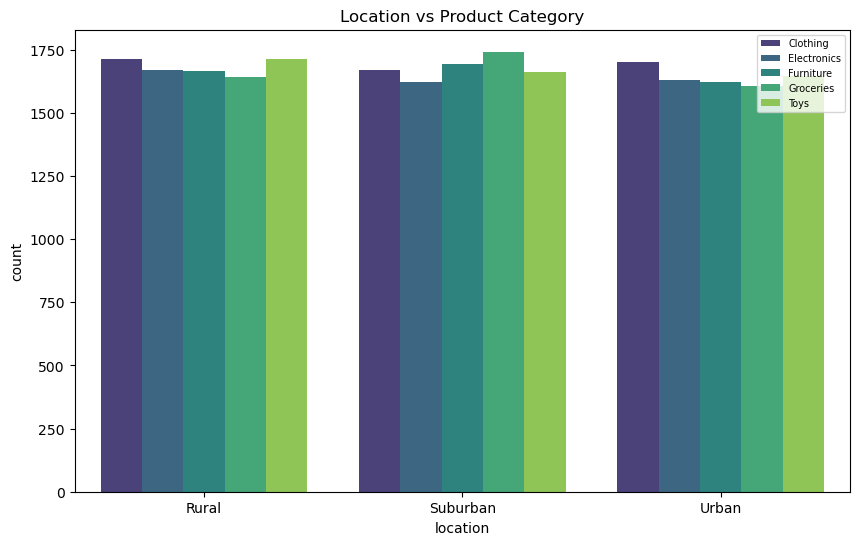

In [60]:

plt.figure(figsize=(10,6))
sns.countplot(x='location', hue='product_category', data=df4,palette="viridis")
plt.title("Location vs Product Category")
plt.legend(prop={'size': 7}) 
plt.show()



**Most non-members belong to Other genders**

**Most regulars are Males**

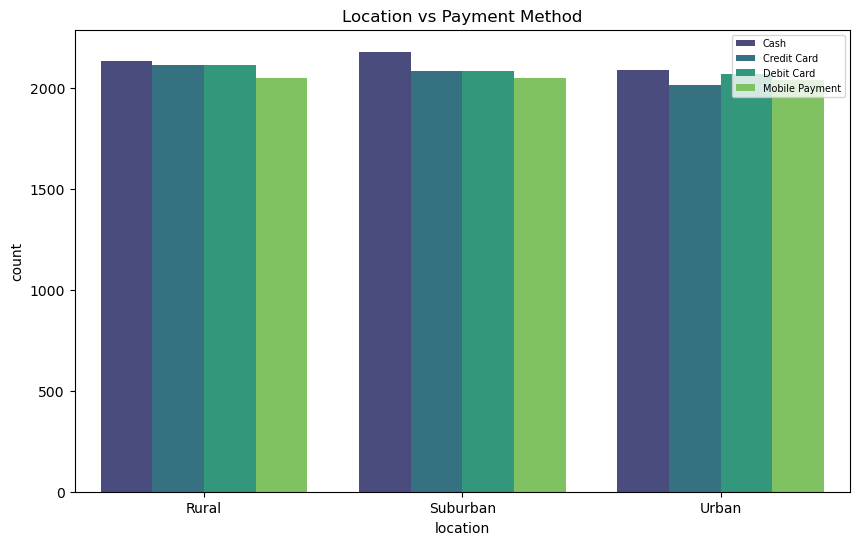

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(x='location', hue='payment_method', data=df4,palette="viridis")
plt.title("Location vs Payment Method")
plt.legend(prop={'size': 7}) 
plt.show()



**Mobile Payment is the most common payment method in Urban locations, especially in Urban areas.**

**Cash is more prominent in Rural areas**

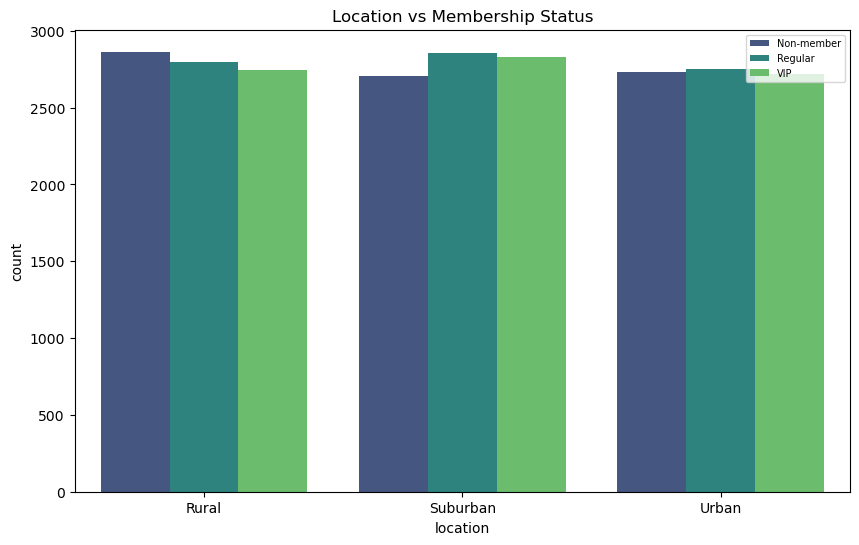

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(x='location', hue='membership_status', data=df4,palette="viridis")
plt.title("Location vs Membership Status")
plt.legend(prop={'size': 7}) 
plt.show()


**VIP membership is more prevalent in Sub-Urban areas while Rural areas have highest number of Non-members**

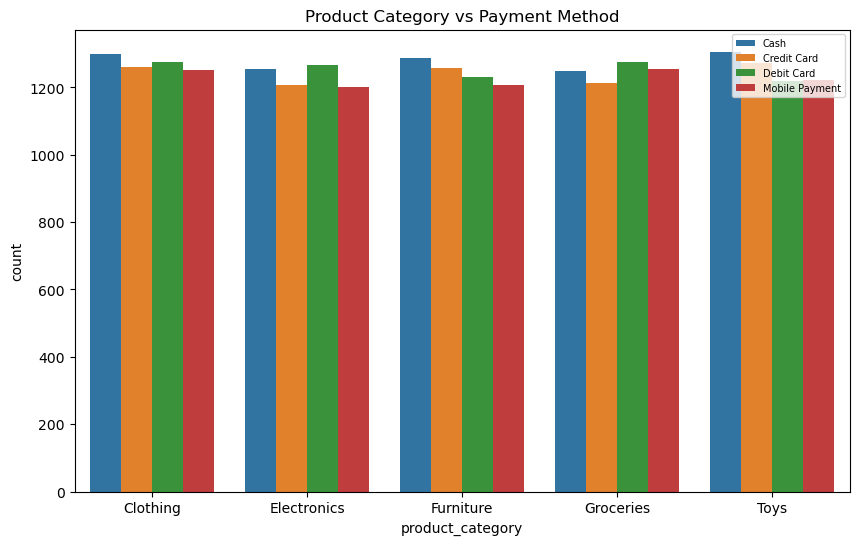

In [63]:

plt.figure(figsize=(10,6))
sns.countplot(x='product_category', hue='payment_method', data=df4)
plt.title("Product Category vs Payment Method")
plt.legend(prop={'size': 7}) 
plt.show()



**Groceries and Clothing have highest number of customers using Mobile Payments**

**Toys have highest number of customers using Cash**

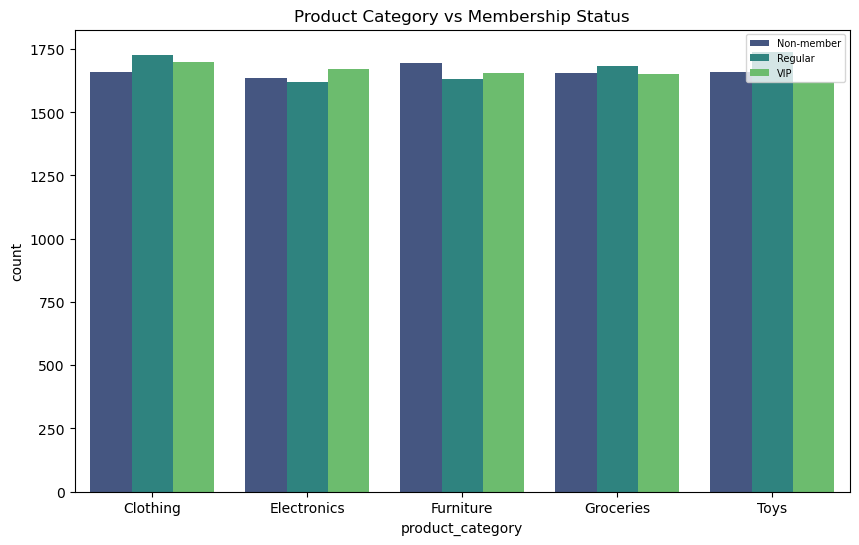

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x='product_category', hue='membership_status', data=df4,palette="viridis")
plt.title("Product Category vs Membership Status")
plt.legend(prop={'size': 7}) 
plt.show()



**Clothing has the highest number of VIPs as compared to other product categories**

**Regular customers tend to buy more clothing and toys**

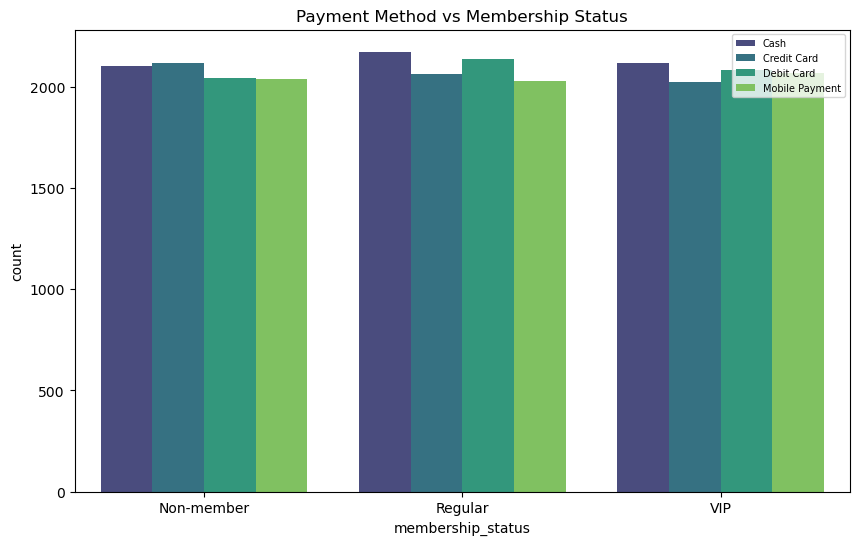

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x='membership_status', hue='payment_method', data=df4,palette="viridis")
plt.title("Payment Method vs Membership Status")
plt.legend(prop={'size': 7}) 
plt.show()

**Most VIPs and Regular customers prefer Cash to make payments**

**Non-members usually prefer Credit Card**

# BIVARIATE ANALYSIS FOR NUMERICAL VS CATEGORICAL VARIABLES

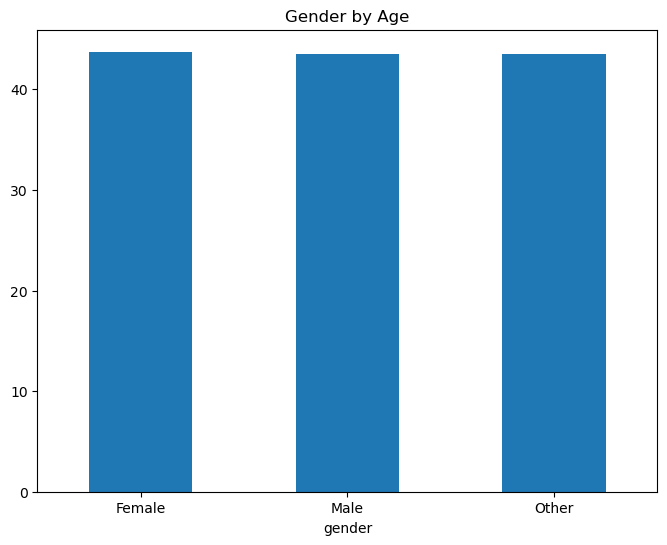

In [66]:
plt.figure(figsize=(8, 6))
df4.groupby('gender').age.mean().plot(kind='bar')
plt.title('Gender by Age')
plt.xticks(rotation=0)
plt.show()

**Average age is fairly consistent across Male, Female, and Other categories**

**This migt mean that that customer age distribution does not differ significantly by gender.**

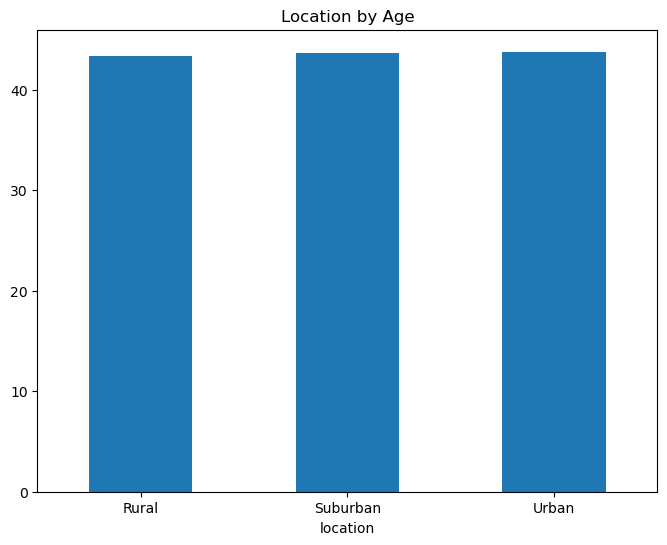

In [67]:
plt.figure(figsize=(8, 6))
df4.groupby('location').age.mean().plot(kind='bar')
plt.title('Location by Age')
plt.xticks(rotation=0)
plt.show()

**Mean age is consistent throughout the different locations**

**Rural areas might attract slightly younger customers.**

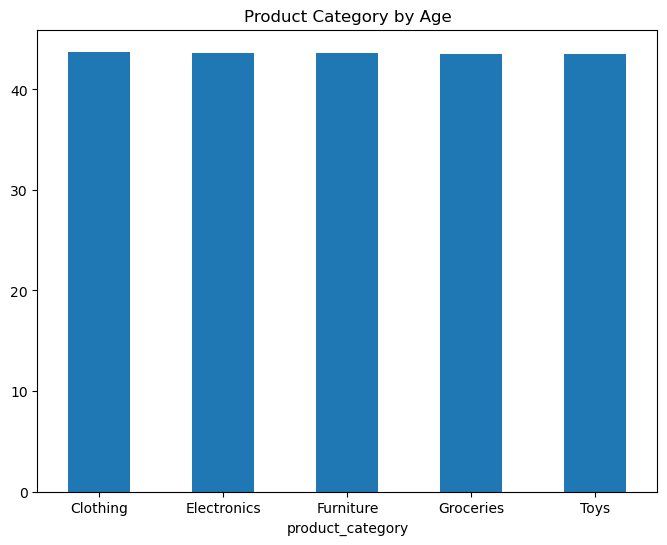

In [68]:
plt.figure(figsize=(8, 6))
df4.groupby('product_category').age.mean().plot(kind='bar')
plt.title('Product Category by Age')
plt.xticks(rotation=0)
plt.show()

**All product categories have customers with similar average ages**

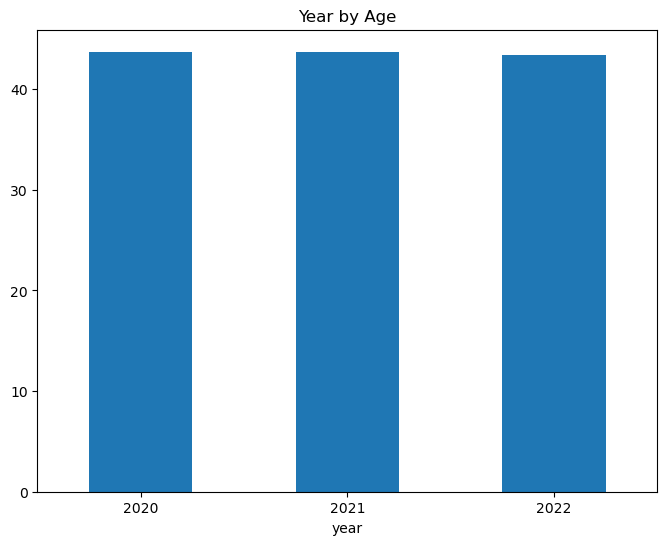

In [69]:
plt.figure(figsize=(8, 6))
df4.groupby('year').age.mean().plot(kind='bar')
plt.title('Year by Age')
plt.xticks(rotation=0)
plt.show()

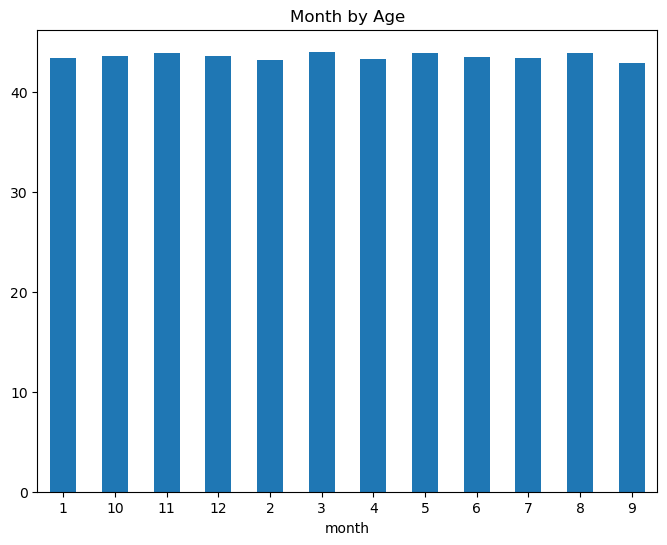

In [70]:
plt.figure(figsize=(8, 6))
df4.groupby('month').age.mean().plot(kind='bar')
plt.title('Month by Age')
plt.xticks(rotation=0)
plt.show()

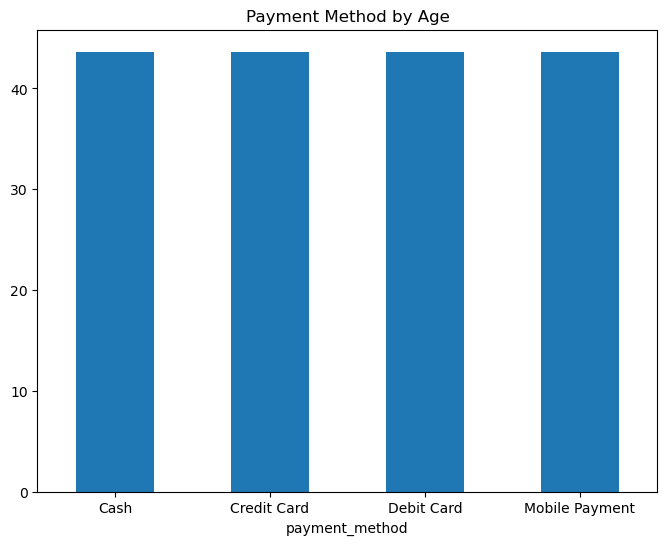

In [71]:
plt.figure(figsize=(8, 6))
df4.groupby('payment_method').age.mean().plot(kind='bar')
plt.title('Payment Method by Age')
plt.xticks(rotation=0)
plt.show()

**Similar age distributions across payment methods.**

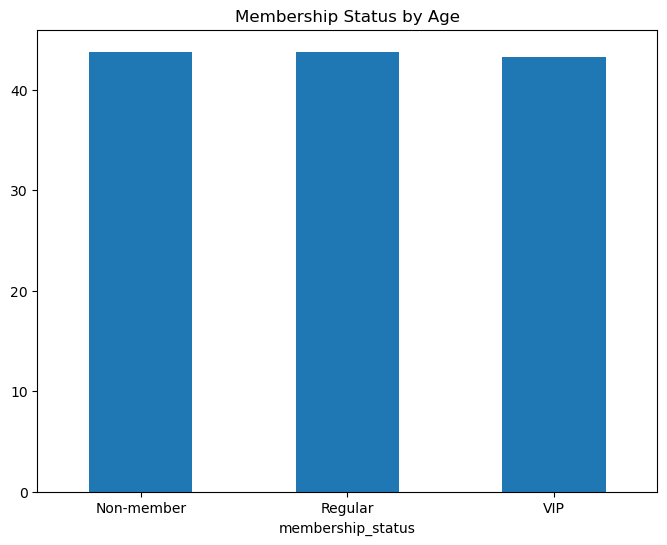

In [72]:
plt.figure(figsize=(8, 6))
df4.groupby('membership_status').age.mean().plot(kind='bar')
plt.title('Membership Status by Age')
plt.xticks(rotation=0)
plt.show()

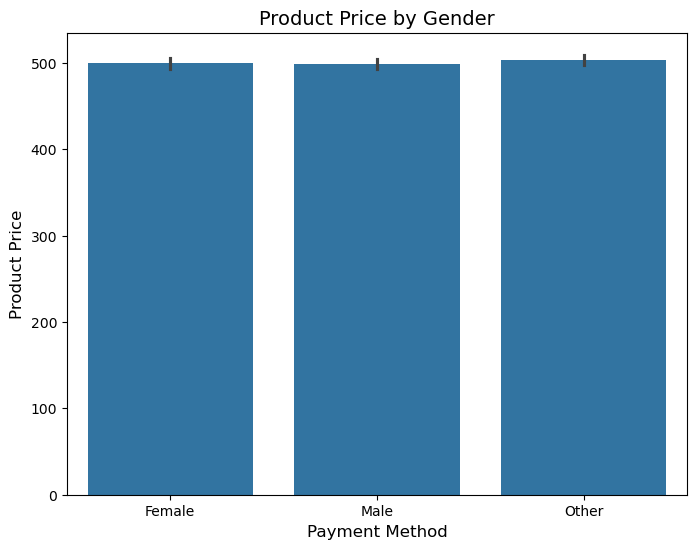

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='product_price', data=df4)
plt.title('Product Price by Gender', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.show()

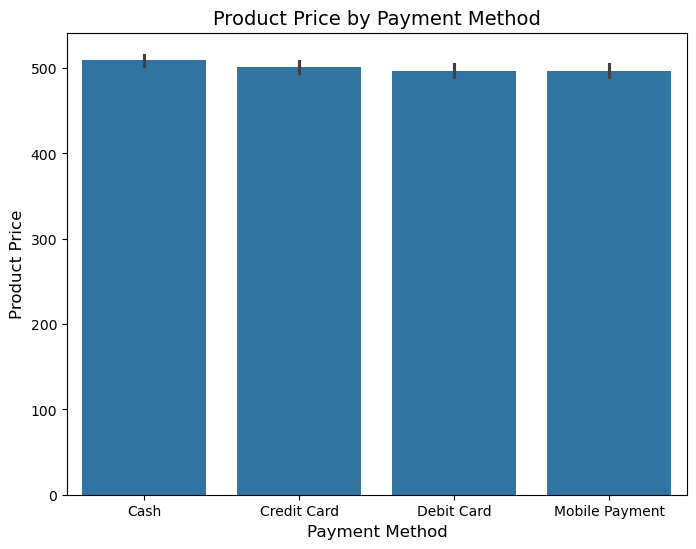

In [74]:
plt.figure(figsize=(8, 6))
sns.barplot(x='payment_method', y='product_price', data=df4)
plt.title('Product Price by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.show()

**The distributions of Product Price across the payment methods (Debit Card, Cash, Mobile Payment, and Credit Card) appear to have a similar range and shape.
This suggests there isn't much variability in the Product Price based on the payment method used.**

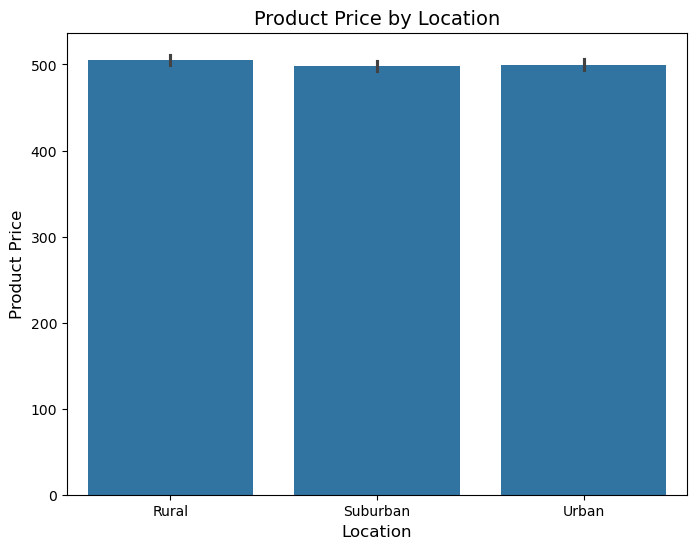

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='product_price', data=df4)
plt.title('Product Price by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.show()

**The distributions of Product Price across Urban, Suburban, and Rural locations look almost identical.
This indicates that the location has little to no apparent effect on the distribution of Product Price.**


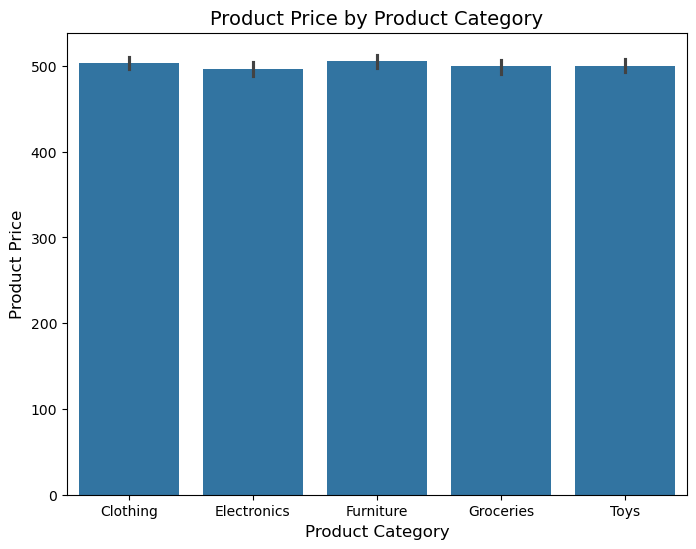

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(x='product_category', y='product_price', data=df4)
plt.title('Product Price by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.show()

**The distributions of Product Price across the categories (Clothing, Electronics, Groceries, Toys, Furniture) are fairly similar in shape and range.
This suggests that the Product Price is consistently distributed across all product categories.There is no significant visual difference in the distribution of Product Price across product categories**

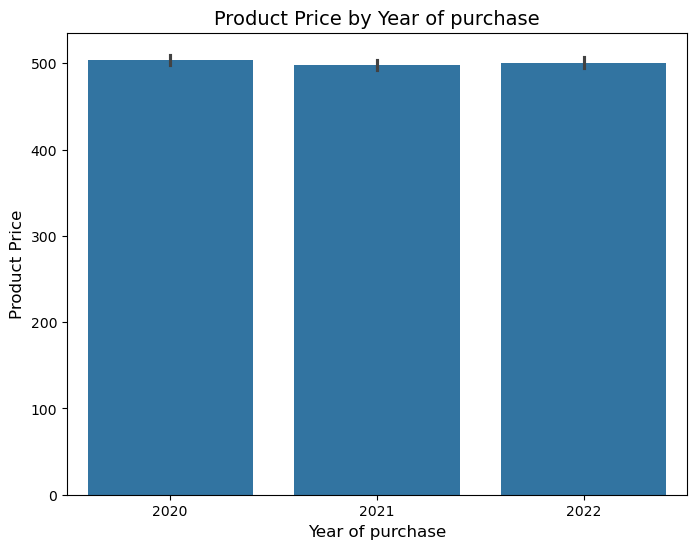

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='product_price', data=df4)
plt.title('Product Price by Year of purchase', fontsize=14)
plt.xlabel('Year of purchase', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.show()

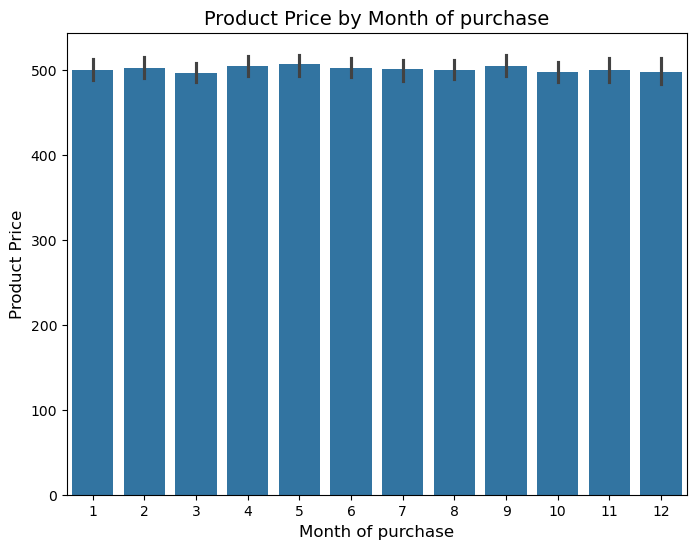

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='product_price', data=df4)
plt.title('Product Price by Month of purchase', fontsize=14)
plt.xlabel('Month of purchase', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.show()

**The distributions of Product Price appear consistent across all months. There is no significant variation in shape or spread for any specific month.
This suggests that the month of purchase does not have a strong influence on the price of products.**


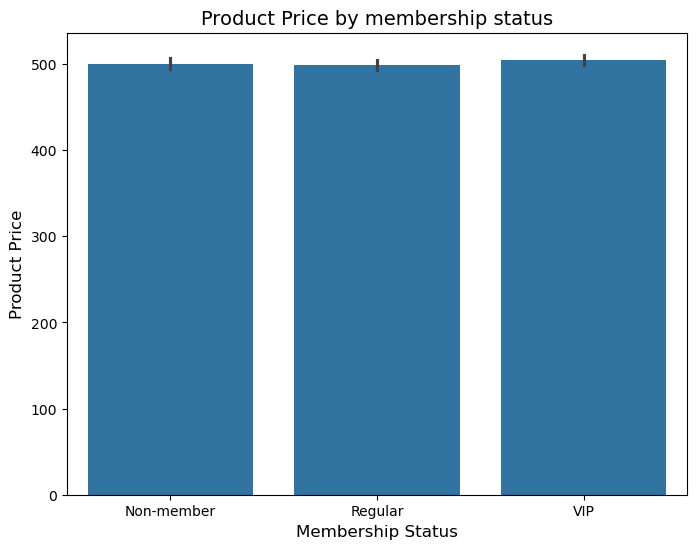

In [79]:
plt.figure(figsize=(8, 6))
sns.barplot(x='membership_status', y='product_price', data=df4)
plt.title('Product Price by membership status', fontsize=14)
plt.xlabel('Membership Status', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.show()

**The distributions of Product Price for Non-members, Regular members, and VIP members are similar in shape and spread.
This suggests that membership status does not strongly influence the pricing of products.The plot suggests that membership status (Non-member, Regular, VIP) does not have a meaningful impact on Product Price.**

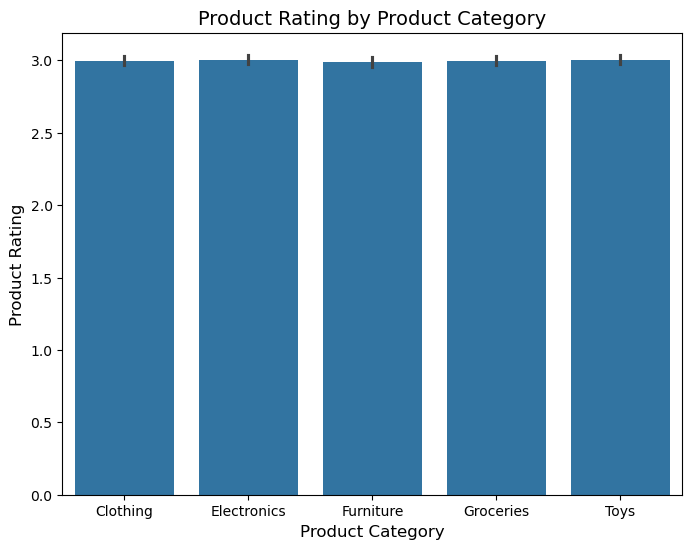

In [80]:
plt.figure(figsize=(8, 6))
sns.barplot(x='product_category', y='product_rating', data=df4)
plt.title('Product Rating by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.show()

**Clothing products may need improvement, as their ratings are slightly lower and less variable, indicating consistent but not exceptional customer experiences.**

**Electronics and Furniture have greater variability, which might indicate a mix of highly-rated and poorly-rated products within these categories.**

**Groceries and Toys have stable and consistent ratings, suggesting customer satisfaction without major highs or lows.**

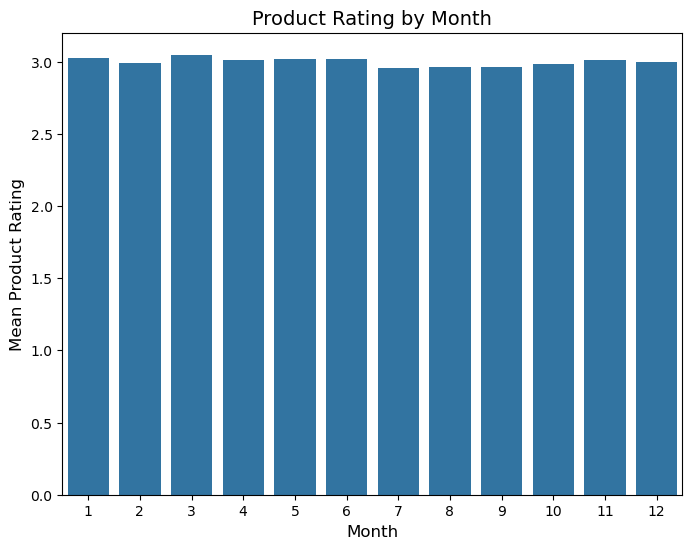

In [81]:



plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='product_rating', data=df4, ci=None)
plt.title('Product Rating by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Product Rating', fontsize=12)
plt.show()

**The mean product rating remains consistent across all months, with no noticeable variation.
This indicates that the time of year or month of purchase does not significantly affect product ratings.Month of purchase does not influence product ratings**


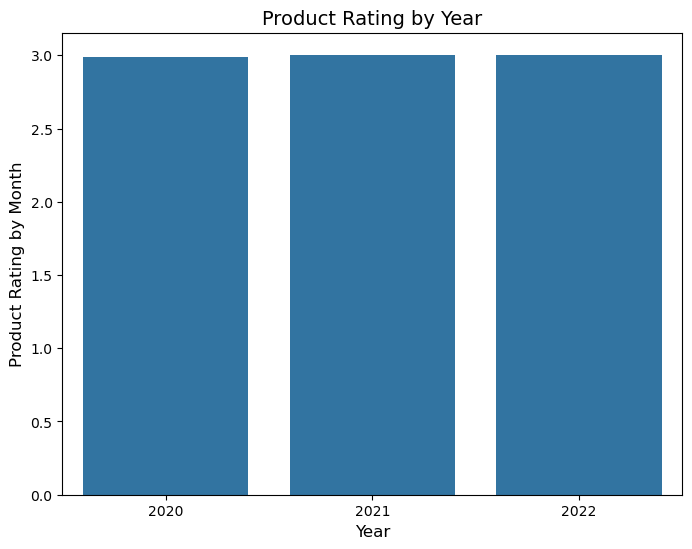

In [82]:



plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='product_rating', data=df4, ci=None)
plt.title('Product Rating by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Product Rating by Month', fontsize=12)
plt.show()

**The mean product rating remains constant across all three years (2020, 2021, 2022), with no observable differences.Year of purchase does not appear to influence product ratings significantly.**

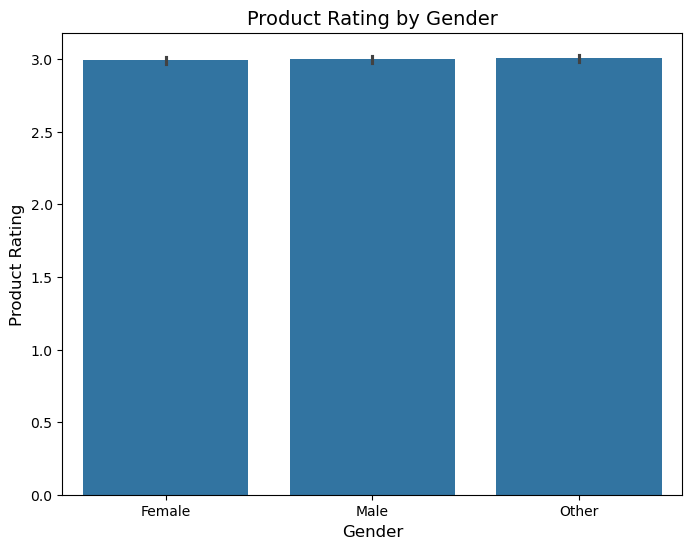

In [83]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='product_rating', data=df4)
plt.title('Product Rating by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.show()

**Gender does not appear to significantly affect product ratings. Ratings are consistent across Female, Male, and Other categories in terms of median, spread, and shape of distribution.**

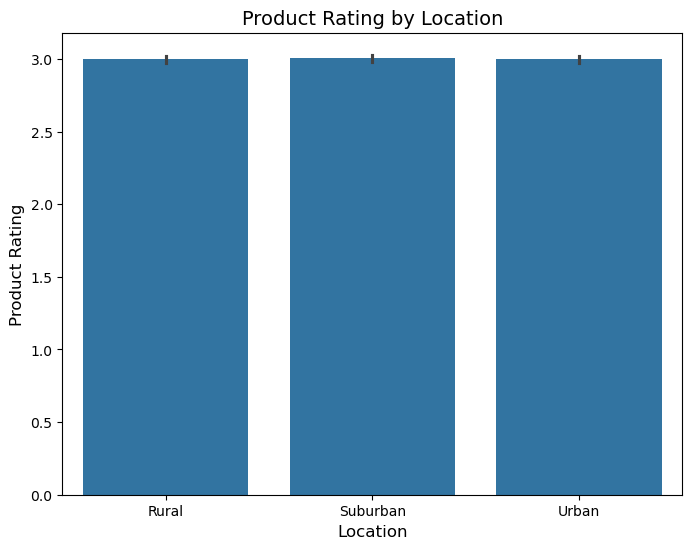

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='product_rating', data=df4)
plt.title('Product Rating by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.show()

**The product rating is approximately the same across all locations: Rural, Suburban, and Urban.
This indicates no noticeable variation in average product ratings by location.Location is likely not a significant factor for product_rating.**

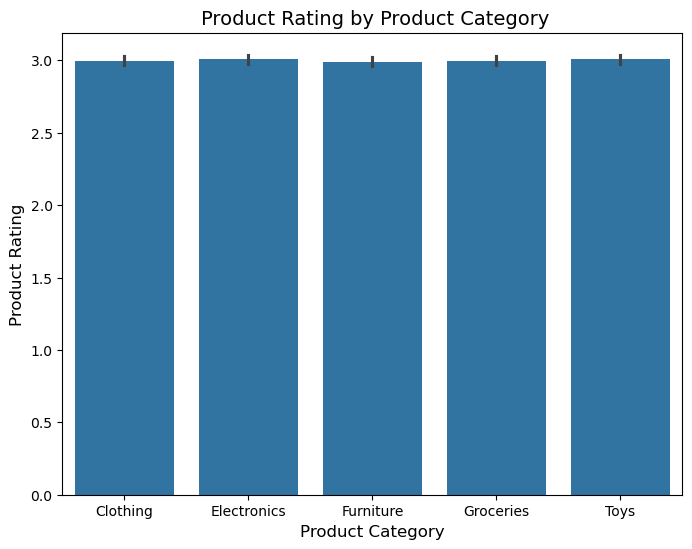

In [85]:
plt.figure(figsize=(8, 6))
sns.barplot(x='product_category', y='product_rating', data=df4)
plt.title(' Product Rating by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.show()

**Product category does not significantly affect product ratings. There are minor differences in distribution width.Ratings appear equally distributed for all product types, reflecting balanced customer satisfaction.**


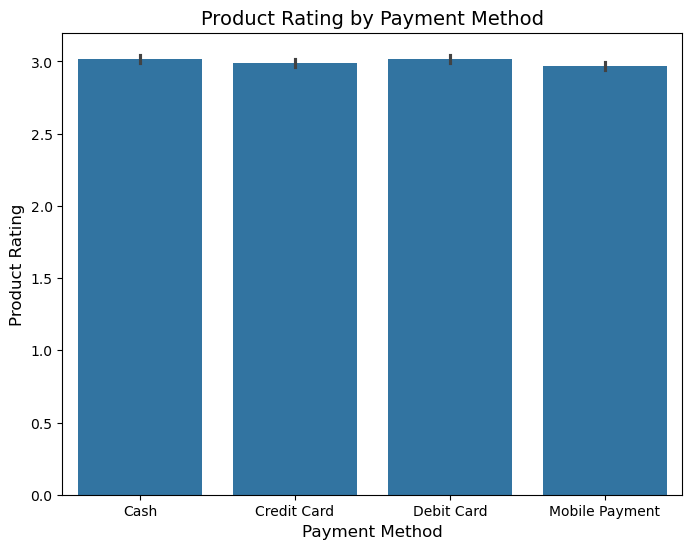

In [86]:
plt.figure(figsize=(8, 6))
sns.barplot(x='payment_method', y='product_rating', data=df4)
plt.title('Product Rating by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.show()

**Payment method does not significantly influence product ratings.Customers rate products similarly whether they pay by Cash, Credit Card, Debit Card, or Mobile Payment.**


**There is no significant difference in product rating over the years.**

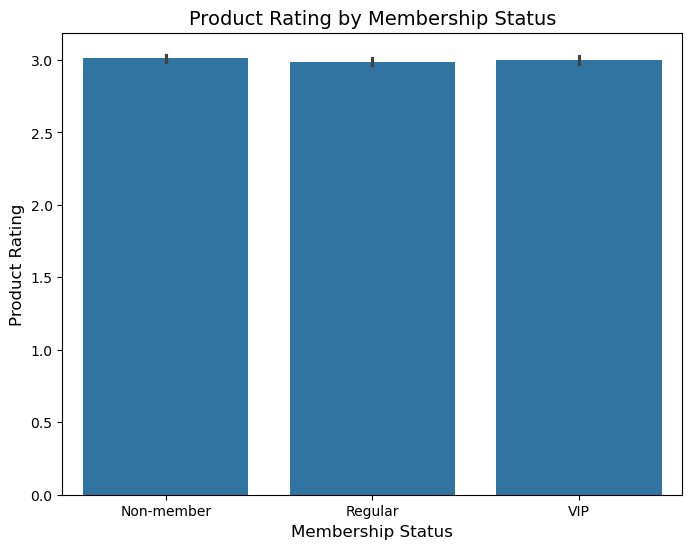

In [87]:
plt.figure(figsize=(8, 6))
sns.barplot(x='membership_status', y='product_rating', data=df4)
plt.title('Product Rating by Membership Status', fontsize=14)
plt.xlabel('Membership Status', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.show()

**Membership status does not significantly affect product ratings.**

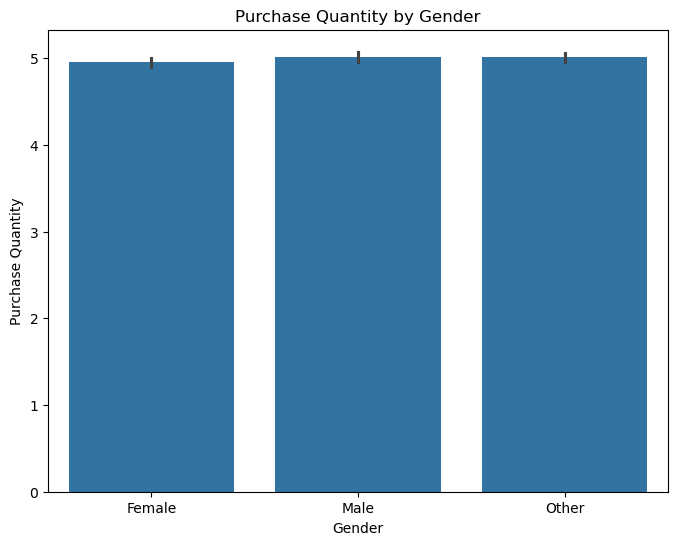

In [88]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='purchase_quantity', data=df4)
plt.title('Purchase Quantity by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Quantity')
plt.show()

**The similarity in medians, ranges, and variability across Female, Male, and Other genders demonstrates that purchase behavior is independent of gender**

**The identical medians, ranges, and variability across genders indicate that purchasing behavior is independent of gender.**


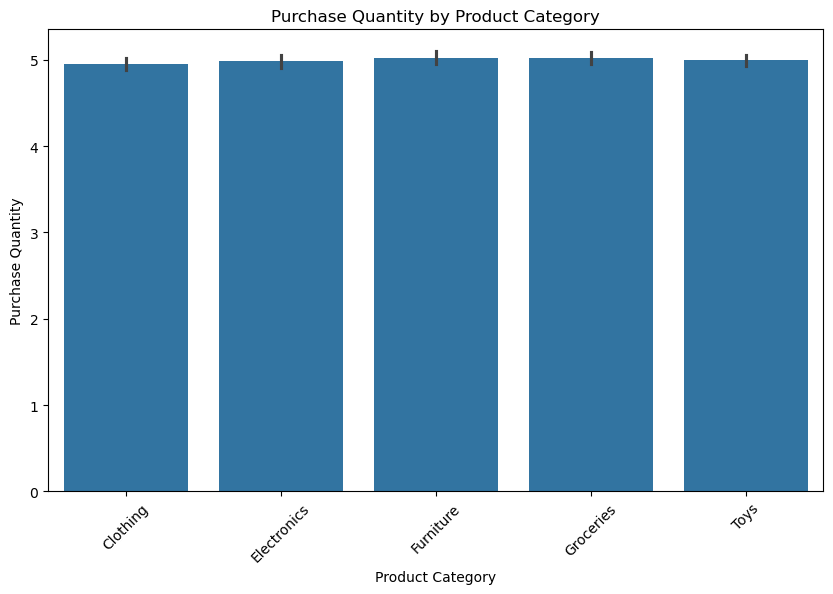

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='purchase_quantity', data=df4)
plt.title('Purchase Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Quantity')
plt.xticks(rotation=45)
plt.show()

**The violin plot reveals no significant influence of product category on purchase quantities.**

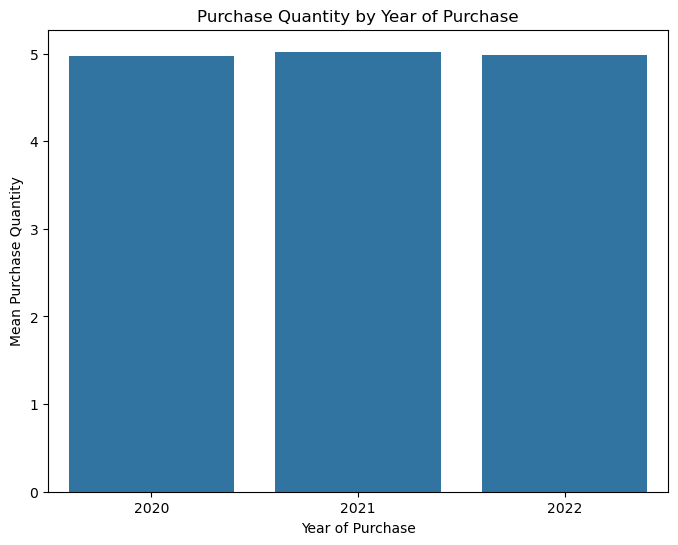

In [90]:

plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='purchase_quantity', data=df4, ci=None)
plt.title('Purchase Quantity by Year of Purchase')
plt.xlabel('Year of Purchase')
plt.ylabel('Mean Purchase Quantity')
plt.show()

**There is no significant difference in purchase quantity over the years as represented by the graph**

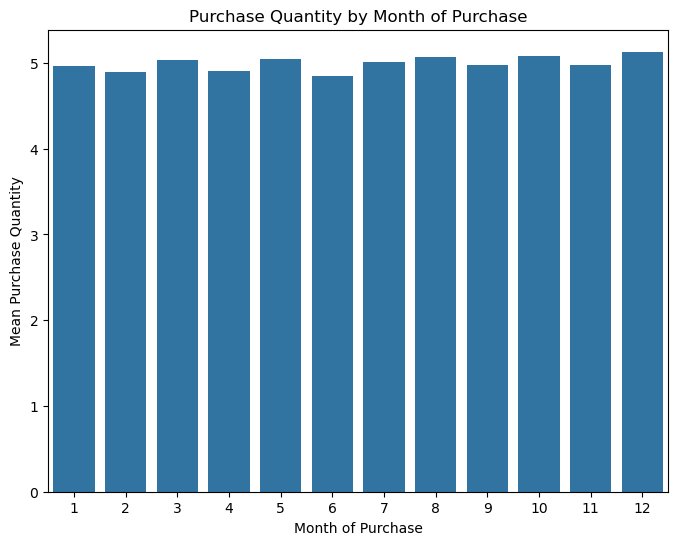

In [91]:

plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='purchase_quantity', data=df4, ci=None)
plt.title('Purchase Quantity by Month of Purchase')
plt.xlabel('Month of Purchase')
plt.ylabel('Mean Purchase Quantity')
plt.show()

**The consistent mean purchase quantities imply stable consumer demand throughout the year**

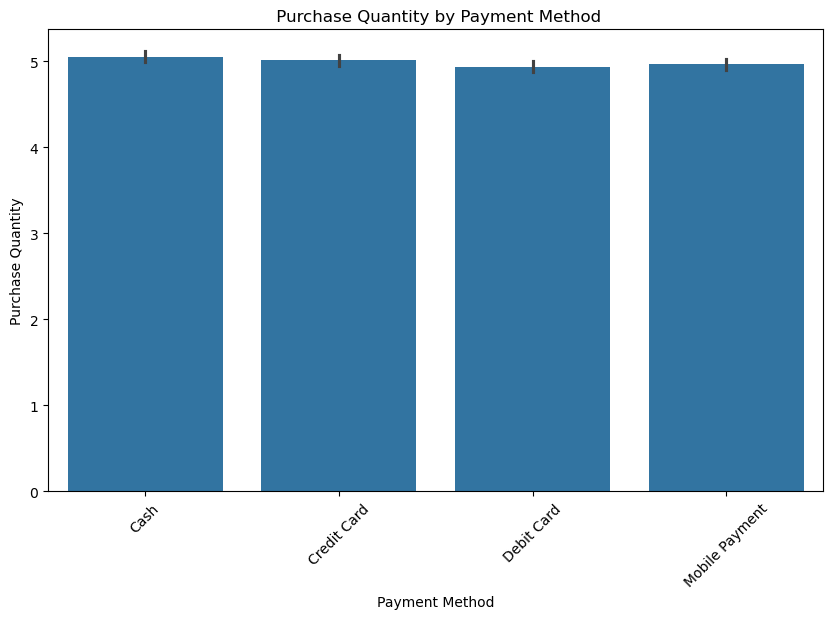

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method', y='purchase_quantity', data=df4)
plt.title(' Purchase Quantity by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Quantity')
plt.xticks(rotation=45)
plt.show()

**The violin plot demonstrates no significant effect of payment method on purchase quantities. It suggests uniform purchasing behavior regardless of how transactions are completed**

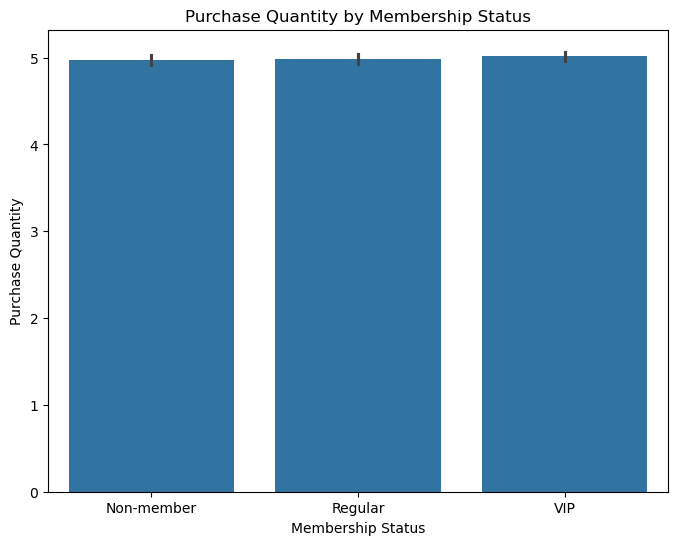

In [93]:
plt.figure(figsize=(8, 6))
sns.barplot(x='membership_status', y='purchase_quantity', data=df4)
plt.title('Purchase Quantity by Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Purchase Quantity')
plt.show()

**Purchase quantities show similar distributions across all membership statuses, with no significant differences in medians.It suggests that membership type does not significantly influence the quantity of items purchased.**

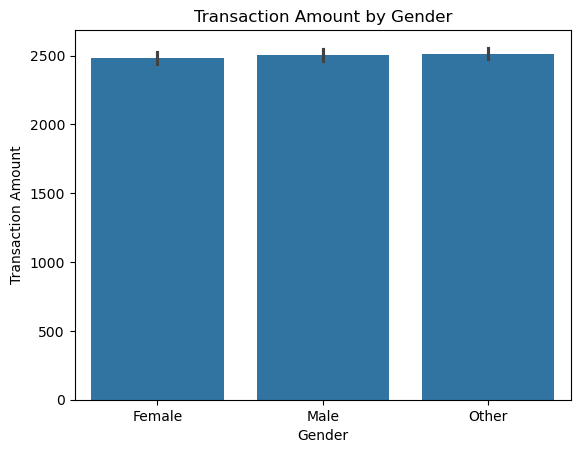

In [94]:
sns.barplot(x="gender", y="transaction_amount", data=df4)
plt.title("Transaction Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Transaction Amount")
plt.show()

**The transaction amount distribution is similar across genders, with slightly higher variability for all groups.**

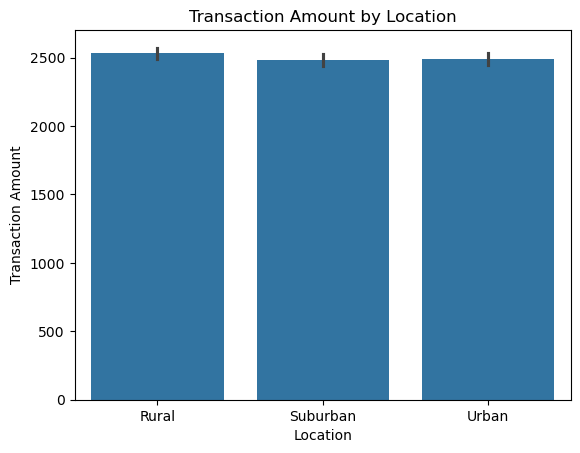

In [95]:
sns.barplot(x="location", y="transaction_amount", data=df4)
plt.title("Transaction Amount by Location")
plt.xlabel("Location")
plt.ylabel("Transaction Amount")
plt.show()

**The transaction amount distribution appears consistent across Rural, Suburban, and Urban locations, with a similar spread and median values, suggesting no significant variation by location.**

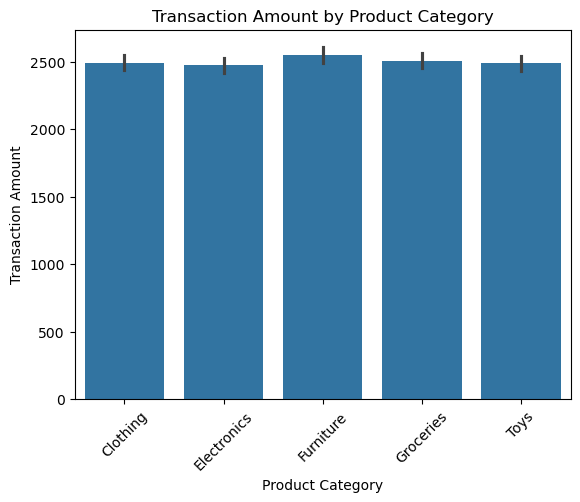

In [96]:
sns.barplot(x="product_category", y="transaction_amount", data=df4)
plt.title("Transaction Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.show()

**The transaction amount varies across product categories, with similar medians but different distributions. Electronics and Furniture categories show slightly wider ranges, indicating higher variability in transaction amounts compared to other categories.**

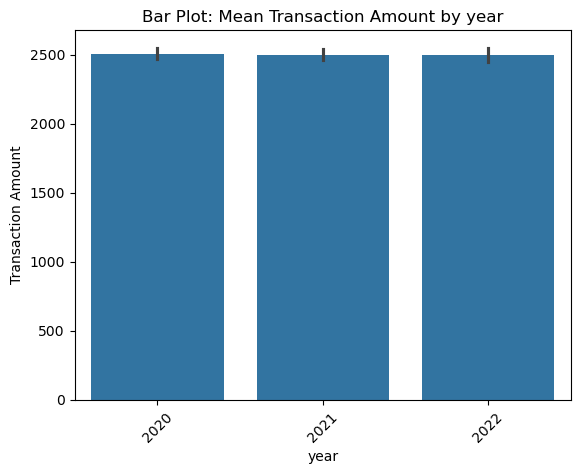

In [97]:

sns.barplot(x="year", y="transaction_amount", data=df4)
plt.title("Bar Plot: Mean Transaction Amount by year")
plt.xlabel("year")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.show()

**The mean transaction amount remains consistent across the years 2020, 2021, and 2022, indicating no significant variation in average spending trends over time.**

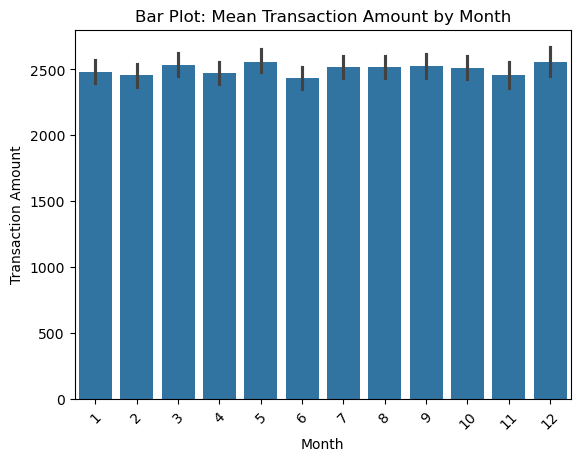

In [98]:

sns.barplot(x="month", y="transaction_amount", data=df4)
plt.title("Bar Plot: Mean Transaction Amount by Month")
plt.xlabel("Month")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.show()

**The mean transaction amount is fairly consistent across all months, suggesting no significant seasonal variations in average spending patterns.**

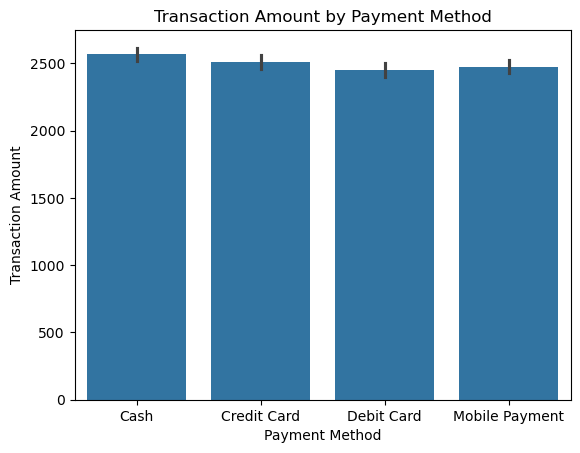

In [99]:
sns.barplot(x="payment_method", y="transaction_amount", data=df4)
plt.title("Transaction Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Transaction Amount")
plt.show()

**The transaction amount distribution across payment methods (Cash, Credit Card, Debit Card, Mobile Payment) appears similar, with slight variations in the density and spread. Credit Card and Mobile Payment methods show slightly narrower distributions, suggesting more consistent transaction amounts compared to Cash and Debit Card.**

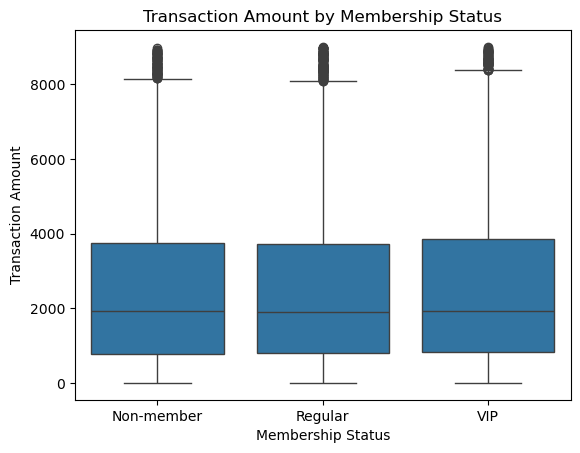

In [100]:
sns.boxplot(x="membership_status", y="transaction_amount", data=df4)
plt.title("Transaction Amount by Membership Status")
plt.xlabel("Membership Status")
plt.ylabel("Transaction Amount")
plt.show()

**The transaction amounts for Non-members, Regular members, and VIP members show similar distributions with no significant variation in medians or interquartile ranges. However, VIP members have a slightly higher upper range of transaction amounts compared to others.**

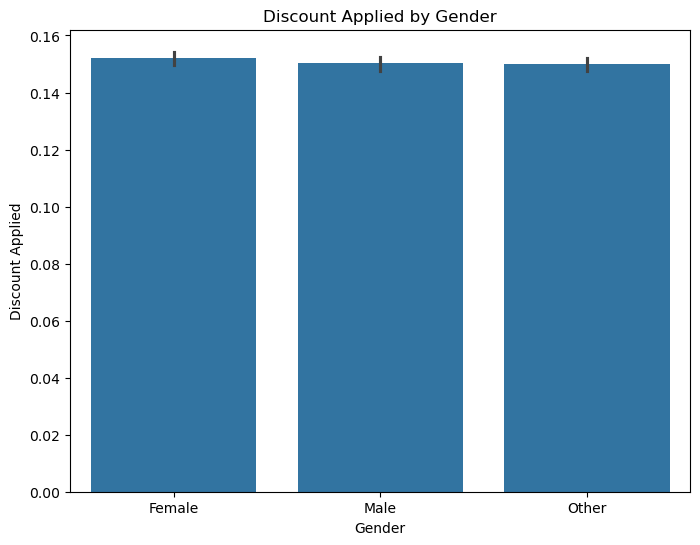

In [101]:
plt.figure(figsize=(8, 6))
sns.barplot(x="gender", y="discount_applied", data=df4)
plt.title("Discount Applied by Gender")
plt.xlabel("Gender")
plt.ylabel("Discount Applied")
plt.show()

**Males tend to receive slightly higher and more varied discounts compared to females and others, whose discounts are more consistent and clustered.**

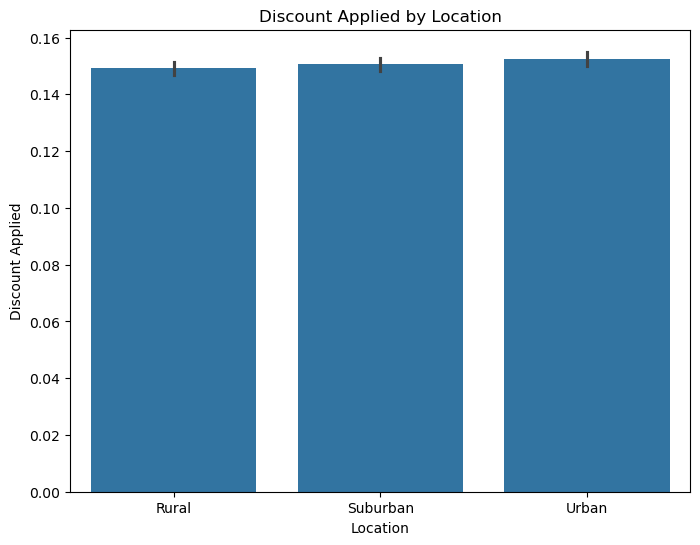

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x="location", y="discount_applied", data=df4)
plt.title("Discount Applied by Location")
plt.xlabel("Location")
plt.ylabel("Discount Applied")
plt.show()

**discounts are fairly standardized across different locations.This plot suggests that the company's discount strategy is fairly uniform across locations, with a typical discount around 20%. However, suburban locations show slightly more variability.**

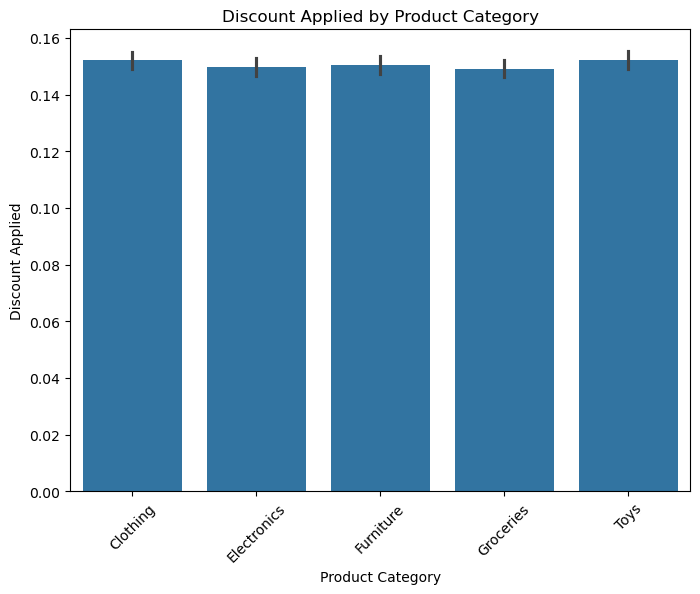

In [103]:
plt.figure(figsize=(8, 6))
sns.barplot(x="product_category", y="discount_applied", data=df4)
plt.title("Discount Applied by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Discount Applied")
plt.xticks(rotation=45)
plt.show()

**Electronics appears to be a category with the least variability in discounts and the lowest median, indicating a more conservative discounting strategy.If electronics are a high-margin product, the lower discounting may reflect a deliberate effort to maintain profitability**

**Furniture has the most variability in discounting, possibly reflecting promotional strategies or pricing based on product types within this category.Variability in furniture discounts could indicate opportunities to standardize or target discount strategies**

**Clothing, Groceries, and Toys are relatively similar in terms of median discounts and range.**

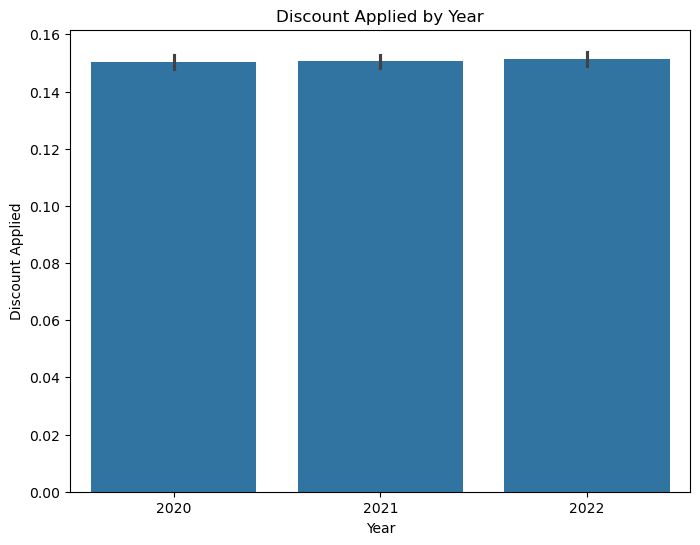

In [104]:

plt.figure(figsize=(8, 6))
sns.barplot(x="year", y="discount_applied", data=df4)
plt.title("Discount Applied by Year")
plt.xlabel("Year")
plt.ylabel("Discount Applied")
plt.show()

**The mean discount applied across the years 2020, 2021, and 2022 remains almost constant at approximately 15%.
This consistency indicates that the organization's discounting strategy did not vary significantly year-over-year**

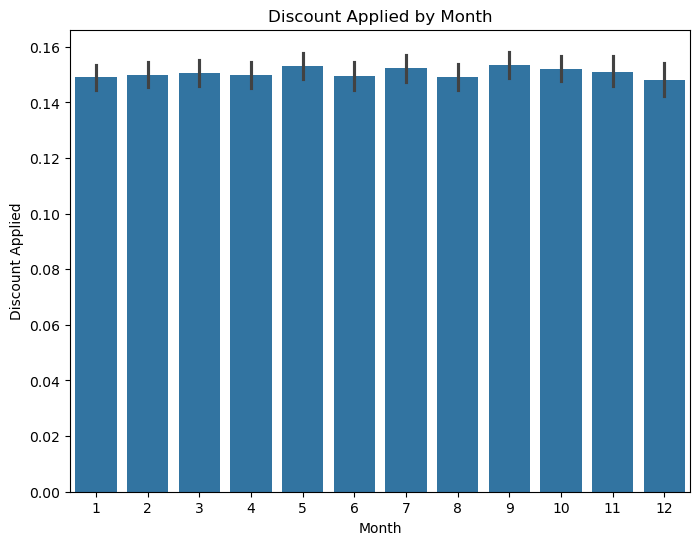

In [105]:

plt.figure(figsize=(8, 6))
sns.barplot(x="month", y="discount_applied", data=df4)
plt.title("Discount Applied by Month")
plt.xlabel("Month")
plt.ylabel("Discount Applied")
plt.show()

**The mean discount applied remains consistent across all months, with an approximate value of 0.15 (15%).
This indicates no significant seasonal or monthly fluctuations in discount strategies**

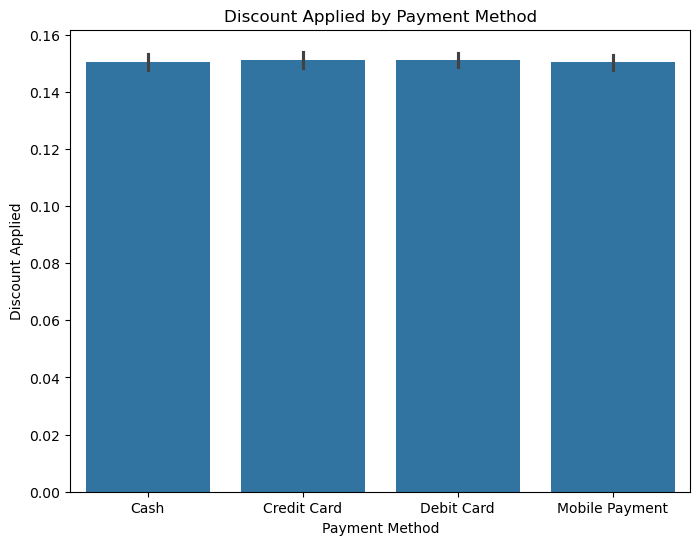

In [106]:
plt.figure(figsize=(8, 6))
sns.barplot(x="payment_method", y="discount_applied", data=df4)
plt.title("Discount Applied by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Discount Applied")
plt.show()

**Discounts applied to cash transactions show a slightly lower median, indicating that cash payments may receive smaller incentives compared to electronic methods.**

**Credit card and debit card users may have an advantage in terms of median discount levels. This could imply a promotional strategy to encourage the use of electronic payment methods.
The similar spread across mobile payments suggests that they are treated equally favorably.**

**While cash transactions have a slightly lower median discount, their range is comparable to other methods, indicating they are not entirely excluded from promotions.**

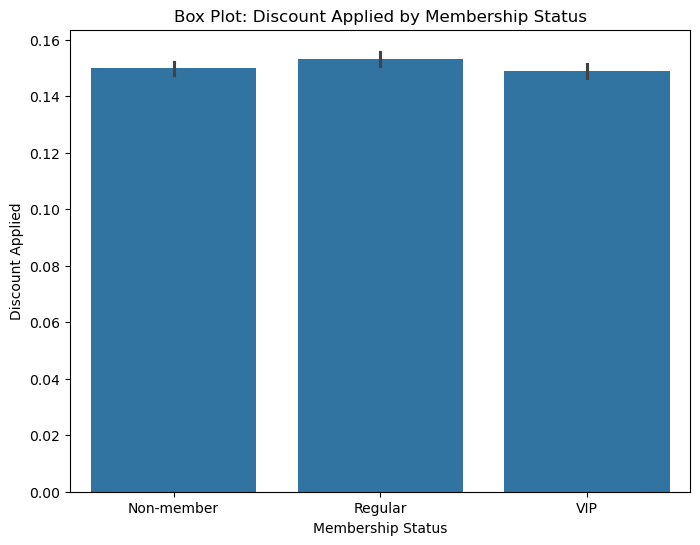

In [107]:
plt.figure(figsize=(8, 6))
sns.barplot(x="membership_status", y="discount_applied", data=df4)
plt.title("Box Plot: Discount Applied by Membership Status")
plt.xlabel("Membership Status")
plt.ylabel("Discount Applied")
plt.show()

**The focus on regular members for higher median discounts suggests they are a crucial customer base for retention and engagement.**

**VIP members seem to be less discount-oriented, potentially due to their higher loyalty and willingness to purchase regardless of price incentives.**

**Non-members are still targeted for discounts, indicating an effort to convert them into regular or VIP members.**


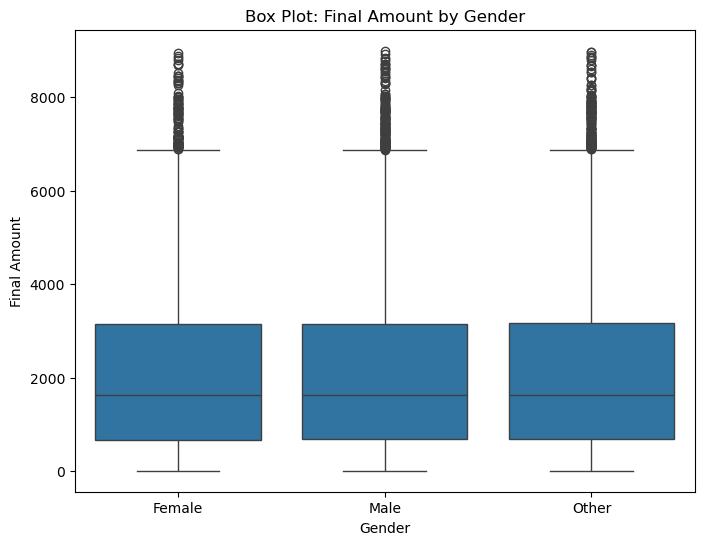

In [108]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='final_amount', data=df4)
plt.title("Box Plot: Final Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Final Amount")
plt.show()


**The final amounts spent are not significantly influenced by gender, as indicated by the similar medians, ranges, and distributions.The presence of high-value outliers across all genders might be due to occasional bulk purchases or premium items.**

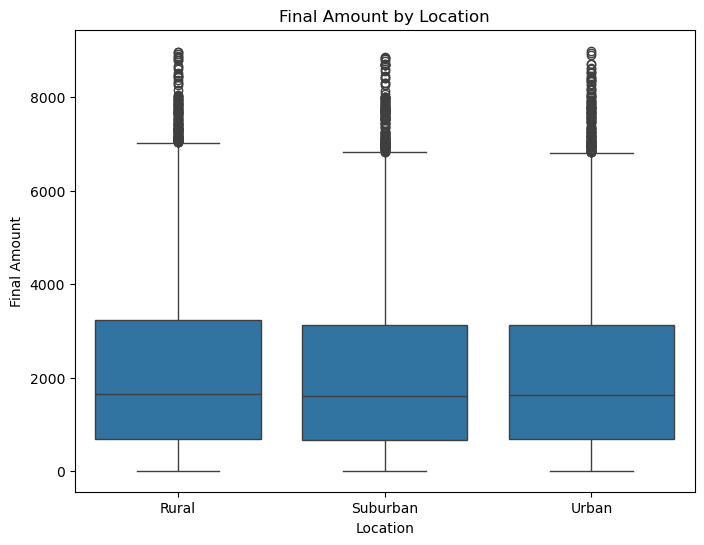

In [109]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='location', y='final_amount', data=df4)
plt.title("Final Amount by Location")
plt.xlabel("Location")
plt.ylabel("Final Amount")
plt.show()

**The final amounts spent are consistent across Rural, Suburban, and Urban locations, with no significant variation in the median or range of spending**

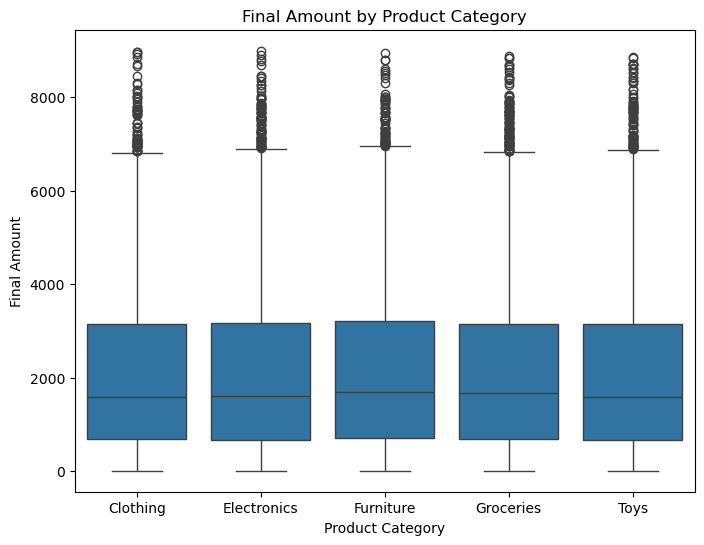

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='product_category', y='final_amount', data=df4)
plt.title("Final Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Final Amount")
plt.show()

**The similarity in medians and IQRs across categories indicates that customers generally spend similar amounts regardless of the product category.**

**The presence of outliers in Electronics and Furniture suggests potential for targeted marketing for high-value items in these categories.
High-value outliers in categories like Groceries and Toys could indicate special circumstances, such as bulk buying or seasonal promotions.**

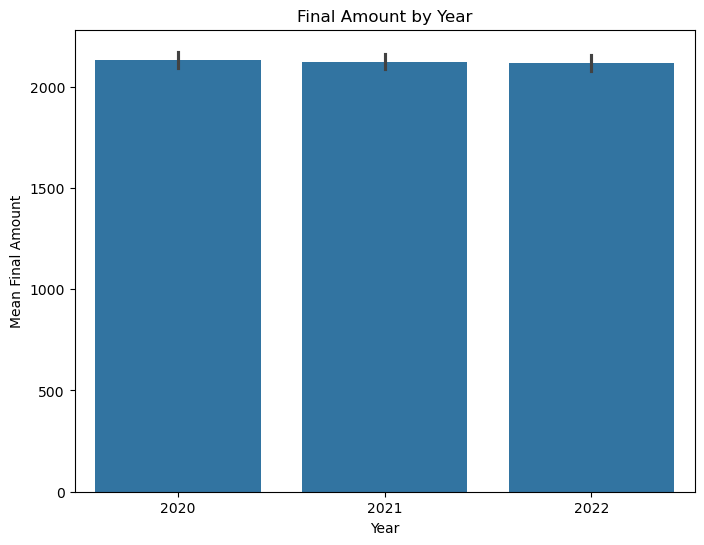

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='final_amount', data=df4, estimator='mean')
plt.title("Final Amount by Year")
plt.xlabel("Year")
plt.ylabel("Mean Final Amount")
plt.show()

**The mean values for all three years are approximately 2000 with minimal variation, indicating steady customer spending behavior over time.**

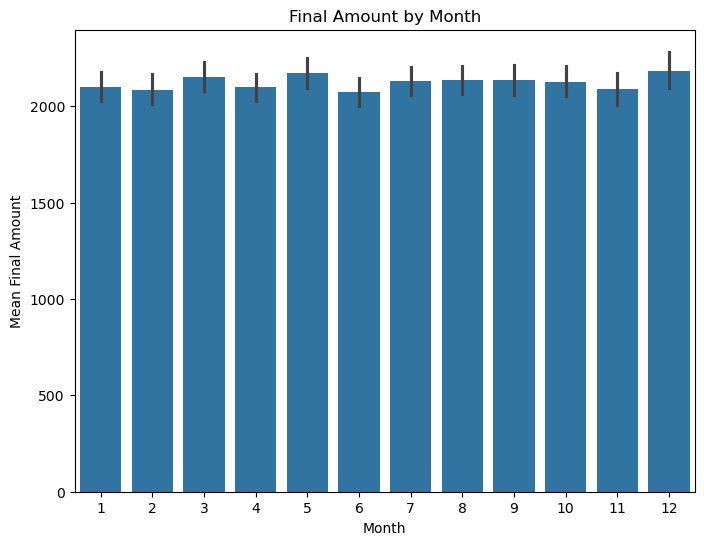

In [112]:
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='final_amount', data=df4)
plt.title("Final Amount by Month")
plt.xlabel("Month")
plt.ylabel("Mean Final Amount")
plt.show()

**The mean final transaction amount remains relatively constant across all months.
Each month's mean value hovers around 2000, indicating uniform customer spending behavior throughout the year.**

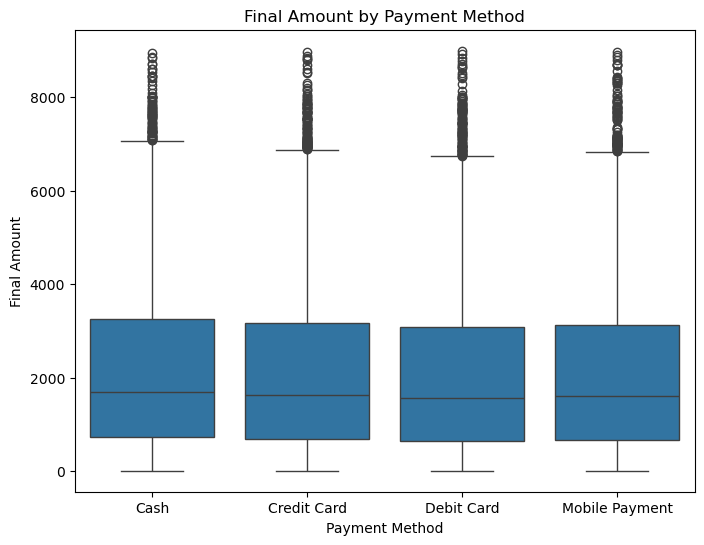

In [113]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_method', y='final_amount', data=df4)
plt.title("Final Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Final Amount")
plt.show()

**Customer spending behavior is consistent across payment methods, with similar transaction distributions and occasional high-value outliers.**

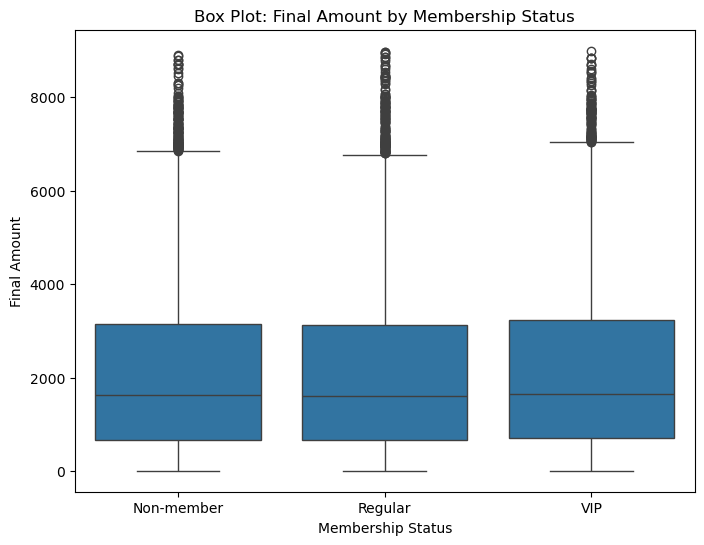

In [114]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='membership_status', y='final_amount', data=df4)
plt.title("Box Plot: Final Amount by Membership Status")
plt.xlabel("Membership Status")
plt.ylabel("Final Amount")
plt.show()

**No specific group demonstrates a higher or lower final spending amount than others, implying membership status does not significantly influence spending behavior.**

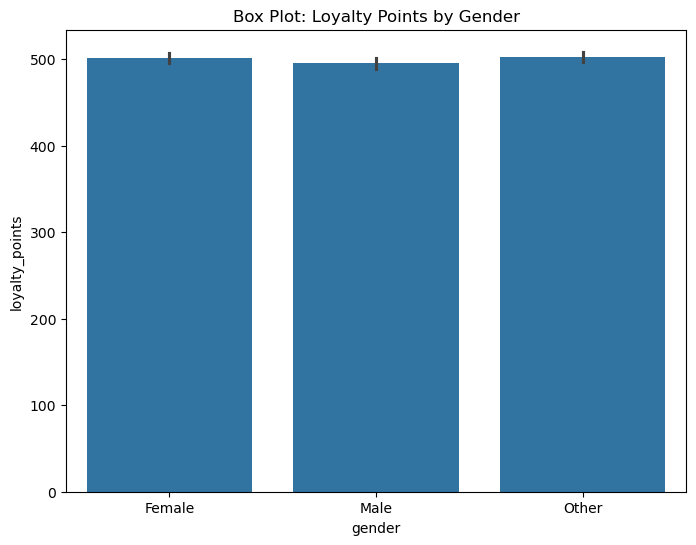

In [115]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df4, x='gender', y='loyalty_points')
plt.title('Box Plot: Loyalty Points by Gender')
plt.show()

**There is no significant variation in loyalty points based on gender**

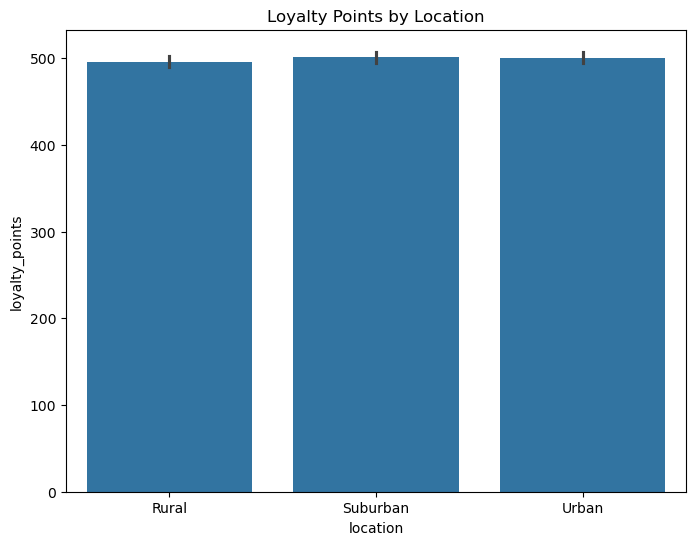

In [116]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df4, x='location', y='loyalty_points')
plt.title('Loyalty Points by Location')
plt.show()

**Loyalty points are distributed similarly across Rural, Suburban, and Urban locations. The allocation process seems unbiased with respect to location, and customers across all locations have an equal opportunity to earn loyalty points.**

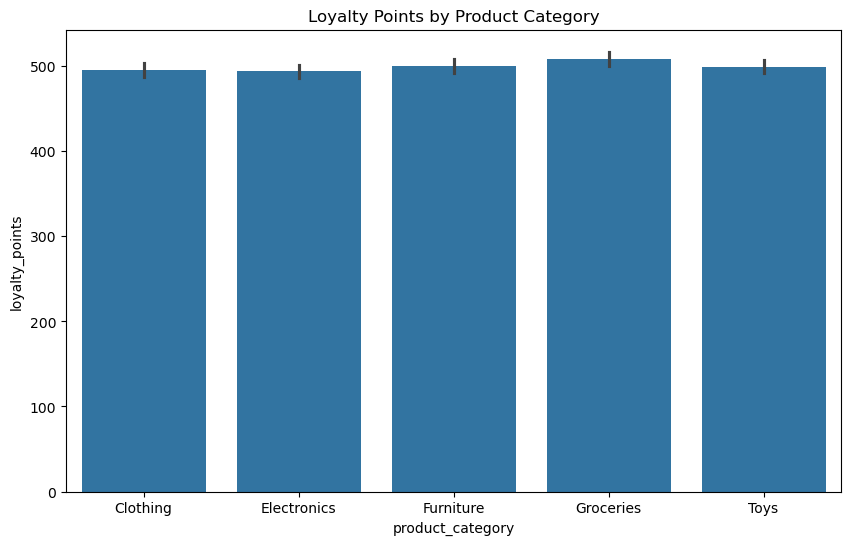

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df4, x='product_category', y='loyalty_points')
plt.title('Loyalty Points by Product Category')
plt.show()

**The loyalty points system appears equitable across all product categories, with no significant differences in median values, range, or spread. This suggests loyalty points are independent of the product category purchased.**

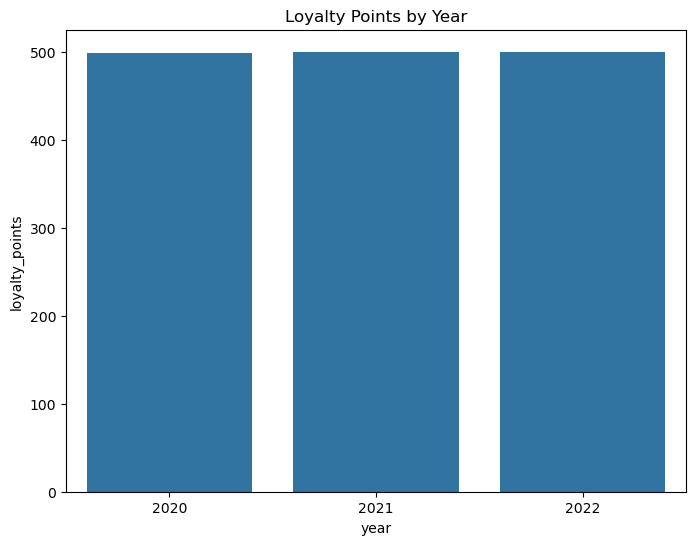

In [118]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df4, x='year', y='loyalty_points',ci=None)
plt.title('Loyalty Points by Year')
plt.show()

**The mean loyalty points earned across 2020, 2021, and 2022 are almost identical, around 500 points. This indicates that the loyalty program has maintained consistency in allocation of loyalty points over the years.**

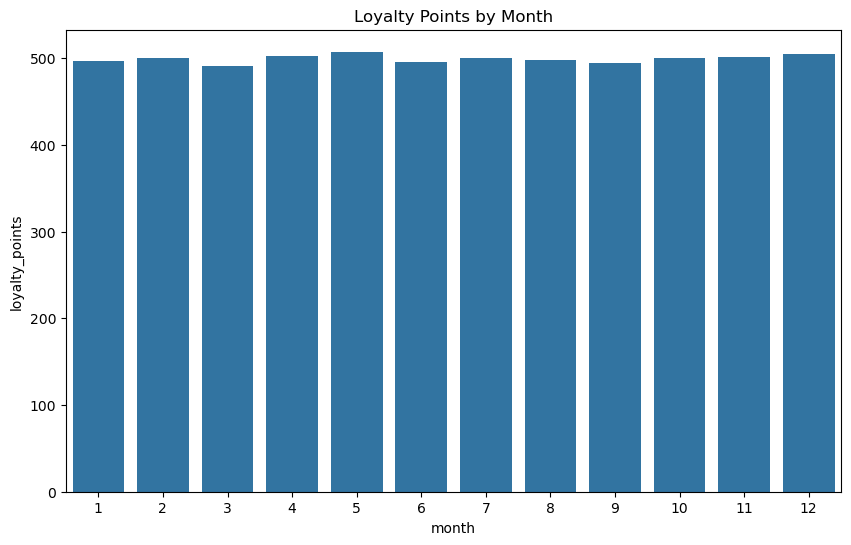

In [119]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df4, x='month', y='loyalty_points', ci=None)
plt.title('Loyalty Points by Month')
plt.show()

**The mean loyalty points allocated per month remain almost constant, around 500 points, indicating no significant monthly variations in the loyalty program.**


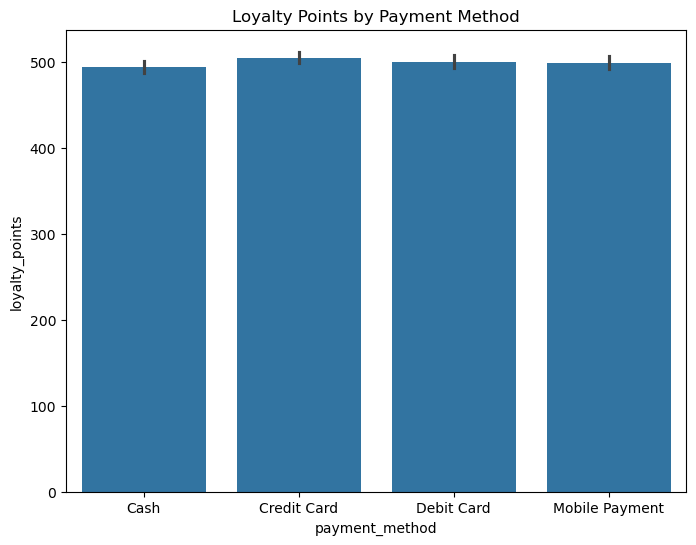

In [120]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df4, x='payment_method', y='loyalty_points')
plt.title('Loyalty Points by Payment Method')
plt.show()

**Loyalty points are distributed uniformly regardless of the payment method, ensuring fairness and consistency in the rewards program.**

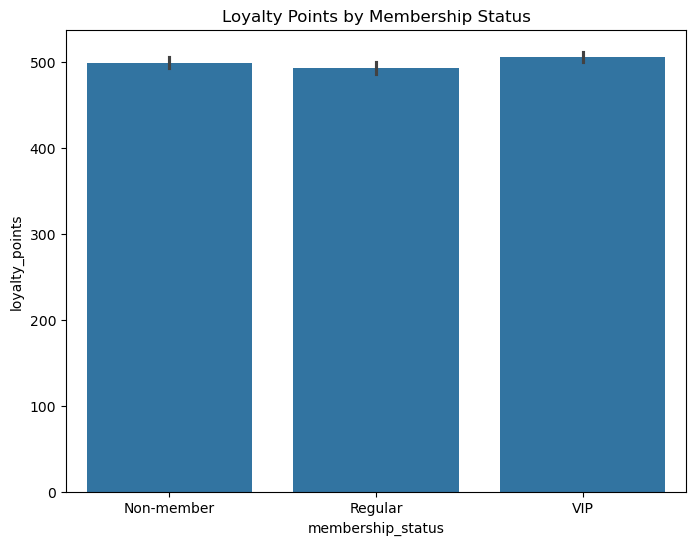

In [121]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df4, x='membership_status', y='loyalty_points')
plt.title('Loyalty Points by Membership Status')
plt.show()

**The loyalty point system has similar medians, ranges, and distributions across Non-member, Regular, and VIP statuses. Membership status does not significantly impact loyalty point allocation.**

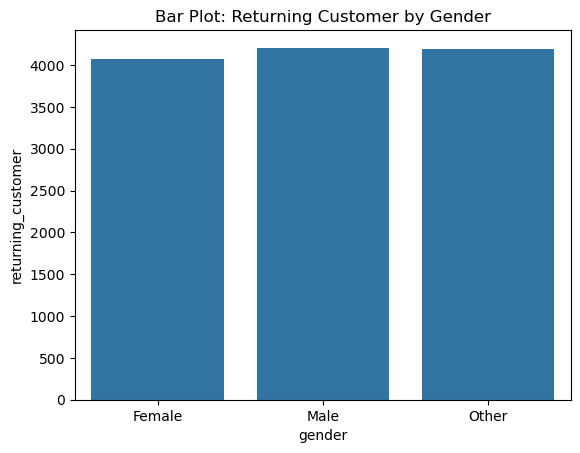

In [122]:
sns.barplot(x='gender', y='returning_customer', data=df4, estimator=sum, ci=None)
plt.title('Bar Plot: Returning Customer by Gender')
plt.show()

**There is no significant difference in returning customer behaviour based on gender.
This implies that gender might not be a strong factor in determining whether a customer is likely to return.**

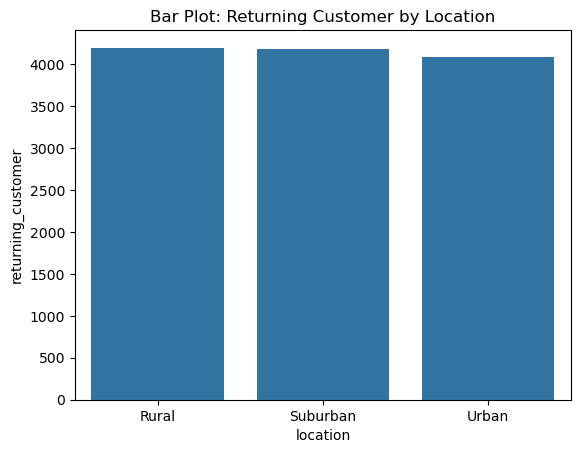

In [123]:
sns.barplot(x='location', y='returning_customer', data=df4, estimator=sum, ci=None)
plt.title('Bar Plot: Returning Customer by Location')
plt.show()

**Customers from Rural, Suburban, and Urban areas return at comparable rates.
Location does not seem to be a strong differentiator for returning customer behaviour.**


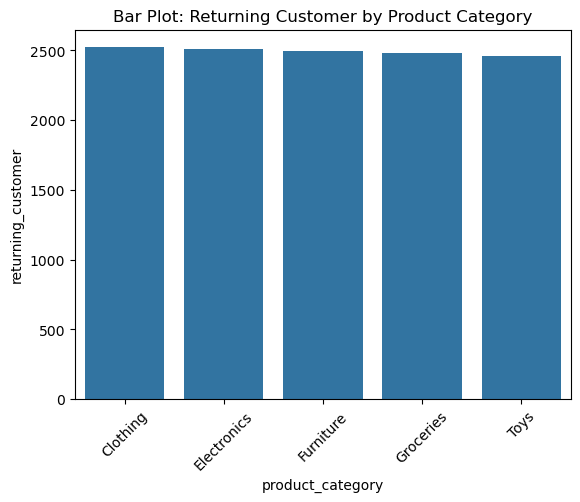

In [124]:
sns.barplot(x='product_category', y='returning_customer', data=df4, estimator=sum, ci=None)
plt.title('Bar Plot: Returning Customer by Product Category')
plt.xticks(rotation=45)
plt.show()

**Customers buying from different product categories return at comparable rates.
Therefore,product category does not seem to be a strong differentiator for returning customer behaviour.**


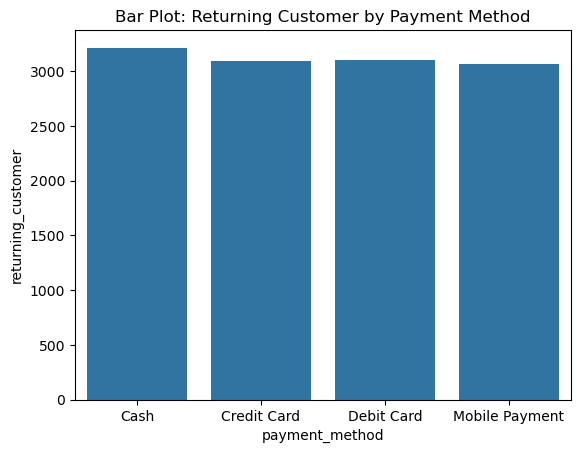

In [125]:
sns.barplot(x='payment_method', y='returning_customer', data=df4, estimator=sum, ci=None)
plt.title('Bar Plot: Returning Customer by Payment Method')
plt.show()

**Cash has the highest number of returning customers, with a value slightly above 3,000.
This indicates that many returning customers prefer paying in cash,**

**While cash leads slightly, the gap between cash and non-cash methods is not very significant, indicating a balanced mix of payment preferences among returning customers.**

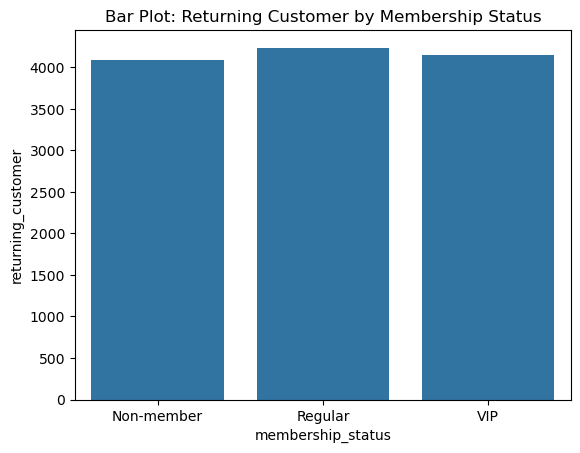

In [126]:
sns.barplot(x='membership_status', y='returning_customer', data=df4, estimator=sum, ci=None)
plt.title('Bar Plot: Returning Customer by Membership Status')
plt.show()

**The returning customer counts across all three categories are very close to each other, with no significant variation between the groups.
This suggests that membership status, while useful, might not be the sole or dominant factor influencing customer retention.**

# Summary

Univariate Analysis (Individual Variables):

Demographics & Customer Behavior:

Age: Normally distributed between 20 and 70, with no outliers.
Gender: "Other" has the highest count, followed by males and females.
Location: Rural areas dominate, followed by suburban ones.
Membership Status: Majority are "Regular" members, followed by non-members, with VIPs being the lowest.

Transaction and Product Trends:

Product Price & Ratings: Normally distributed product prices; balanced ratings with clusters at extremes for very low or high scores.
Purchase Quantity: Customers prefer smaller purchases, with no outliers.
Transaction Amount & Final Amount: Right-skewed, with significant outliers due to bulk or high-value purchases.
Discounts: Clustered around whole numbers (e.g., 10%, 20%) with no outliers.
Loyalty Points: Almost normally distributed, with no major variations.

Temporal Trends:

Purchases decrease in the latter half of the year, with the lowest in 2022.
January sees spikes due to promotions, and mid-year activity remains stable.
Payment Methods:

Cash is the most common payment method, followed by debit cards, with mobile payments being the least used.
Bivariate Analysis (Relationships Between Two Variables):

Demographics & Transactions:

Age vs. Purchase Quantity: Older customers prefer smaller purchases, while younger customers are more likely to buy in bulk.
Gender vs. Product Category: "Other" gender shows a preference for categories like clothing and toys.
Product & Transaction Relationships:

Product Price vs. Final Amount: Higher prices contribute to larger final amounts, particularly for bulk purchases.
Discounts vs. Final Amount: Higher discounts increase purchase quantities but do not always significantly raise final amounts.

Location Effects:

Location vs. Final Amount: Rural customers tend to have lower final amounts, reflecting affordability constraints.
Product Ratings & Preferences:

Balanced ratings across categories, with toys and clothing showing clusters at extreme ratings.
Multivariate Analysis (Interactions Between Variables):
Age, Purchase Quantity, and Final Amount:

Younger customers buying in bulk result in higher final amounts.
Older customers tend toward smaller purchases, leading to lower final amounts.


Product Category, Membership, and Loyalty Points:

Regular members are more loyal, often purchasing clothing and earning balanced loyalty points.
Location, Discounts, and Transaction Amount:

Rural customers benefit more from discounts but generally have lower final amounts.
Bulk purchases occasionally create outliers in transaction amounts.
Gender, Payment Method, and Final Amount:

"Other" gender prefers cash for smaller purchases, while larger transactions are often completed with cards or mobile payments.
Seasonal Patterns:

Purchases drop in the latter half of the year, likely due to seasonal trends or reduced promotions.

In [127]:
numeric_columns = df4.select_dtypes(include=np.number)
categorical_vars = df4.select_dtypes(include=['category', 'object','bool'])

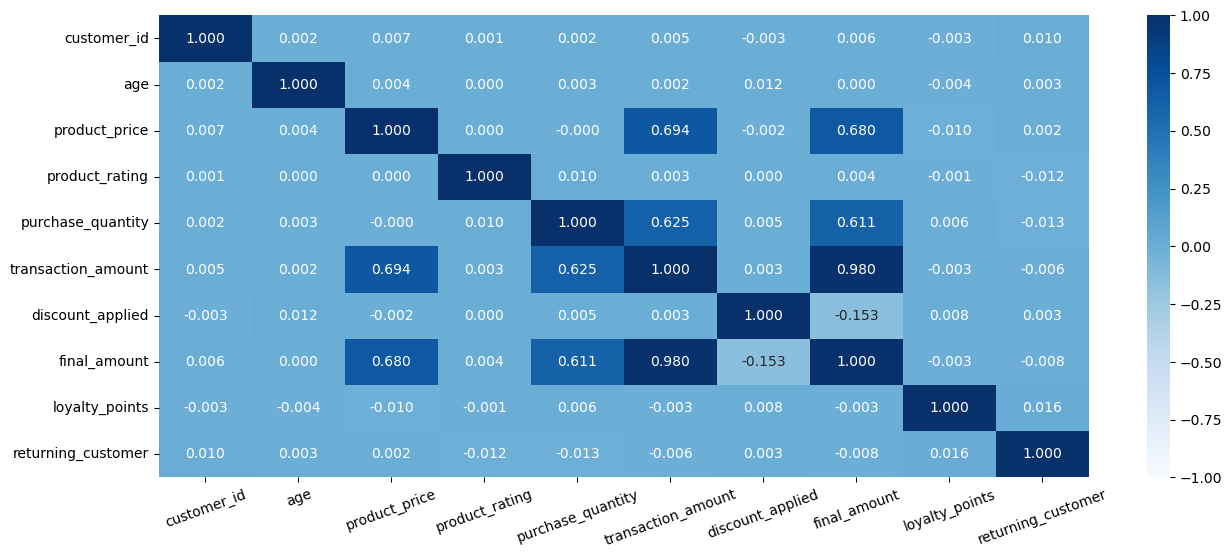

In [128]:
plt.figure(figsize=(15,6))
sns.heatmap(df4.select_dtypes(np.number).corr(),annot=True,fmt='.3f',vmin=-1,vmax=1,cmap='Blues')
plt.xticks(rotation=20)
plt.show()

###  HANDING OUTLIERS

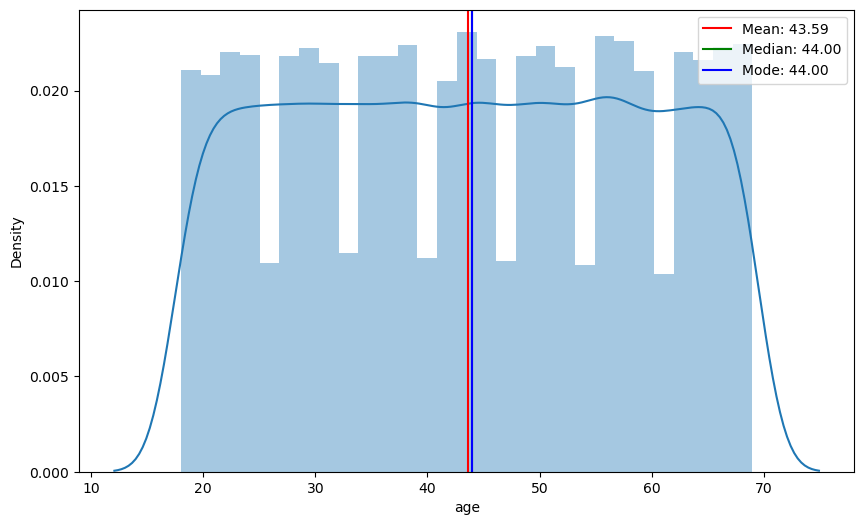

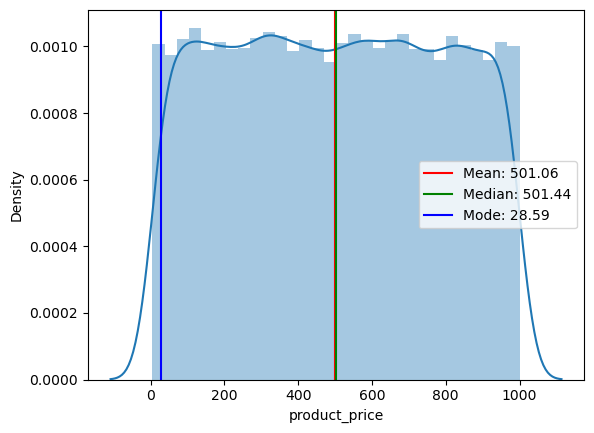

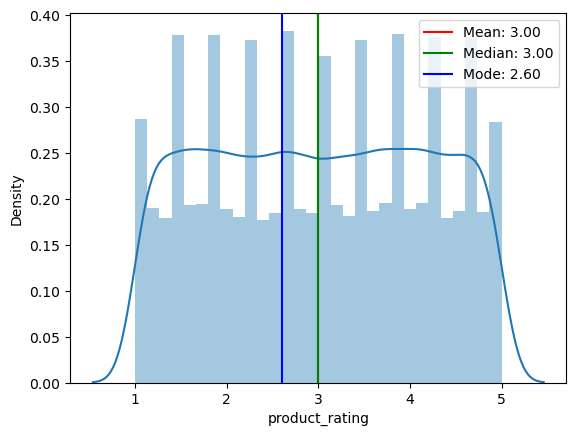

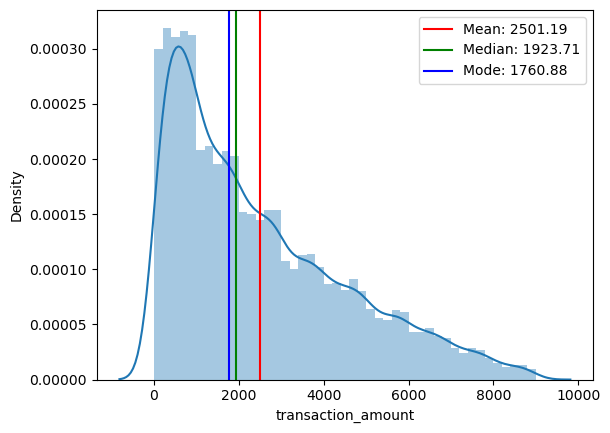

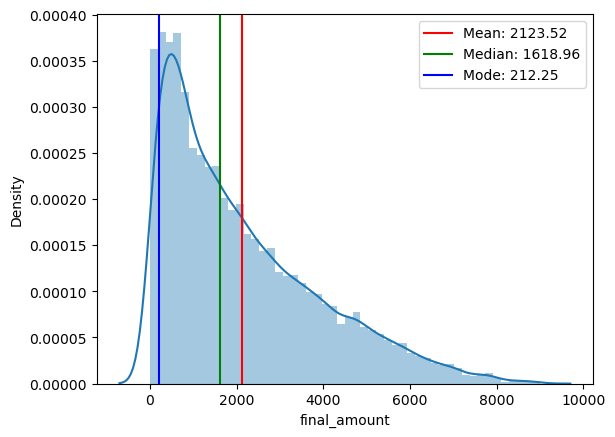

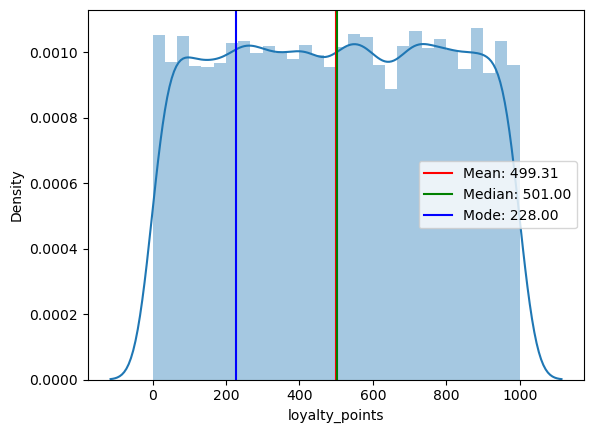

In [129]:
plt.figure(figsize=(10,6))
for col in ['age','product_price','product_rating','transaction_amount','final_amount','loyalty_points']:
    sns.distplot(df4[col])
    plt.axvline(df4[col].mean(), color='red', label=f'Mean: {df4[col].mean():.2f}')
    plt.axvline(df4[col].median(), color='green',  label=f'Median: {df4[col].median():.2f}')
    plt.axvline(df4[col].mode()[0], color='blue',  label=f'Mode: {df4[col].mode()[0]:.2f}')
    plt.legend()
    plt.show()  

In [130]:
print(f'SKEWS OF THE CONTINOUS NUM COLUMNS:\n')
for col in ['age','product_price','product_rating','transaction_amount','final_amount','loyalty_points']:
    print(f'{col} : {df4[col].skew():.3f}')

SKEWS OF THE CONTINOUS NUM COLUMNS:

age : -0.002
product_price : 0.007
product_rating : -0.001
transaction_amount : 0.931
final_amount : 1.039
loyalty_points : -0.003


**Applying Boxcox Transformation**

-**Columns to be transformed**: 'final_amount','transaction_amount'

In [131]:
def apply_boxcox(df, columns):
    transformed_data = {}
    for col in columns:
        transformed_data[col], g = stats.boxcox(df[col])
    return transformed_data

columns_to_transform = ['transaction_amount', 'final_amount']
transformed_columns = apply_boxcox(df4, columns_to_transform)

for col in columns_to_transform:
    df4[col] = transformed_columns[col]

df4.head()


customer_id  age  gender  location product_category  product_price  \
0         1260   18    Male     Urban         Clothing      468.71000   
1         1706   50    Male  Suburban         Clothing      264.44000   
2         1203   24  Female  Suburban      Electronics      557.33000   
3         4878   45   Other     Rural      Electronics      637.50000   
4         2010   24    Male     Urban        Groceries       82.16000   

   product_rating  purchase_quantity  transaction_amount  discount_applied  \
0         5.00000                  6            39.80641           0.20000   
1         3.30000                  9            37.47676           0.10000   
2         3.30000                  3            32.95815           0.20000   
3         3.20000                  8            49.26228           0.20000   
4         2.60000                  9            24.35362           0.10000   

   final_amount  loyalty_points  payment_method membership_status  \
0      34.27832             641      Debit Card        Non-member   
1      33.69073             699            Cash           Regular   
2      28.50686              70  Mobile Payment               VIP   
3      42.19002             323  Mobile Payment           Regular   
4      22.13441             373  Mobile Payment        Non-member   

   returning_customer  year month  
0                   0  2020     1  
1                   1  2020     1  
2                   0  2020     1  
3                   1  2020     1  
4                   0  2020     1

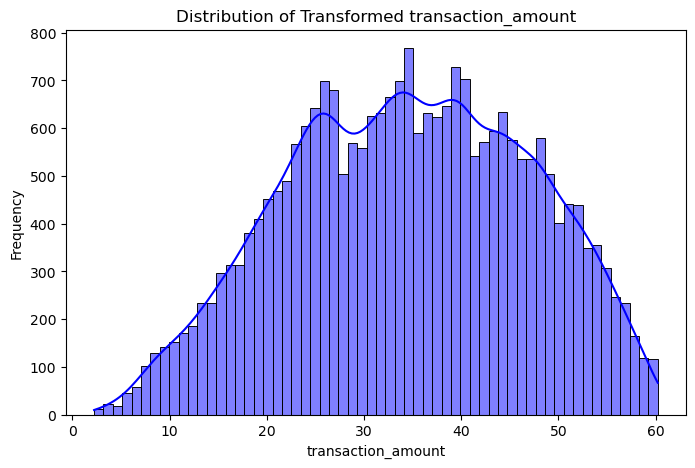

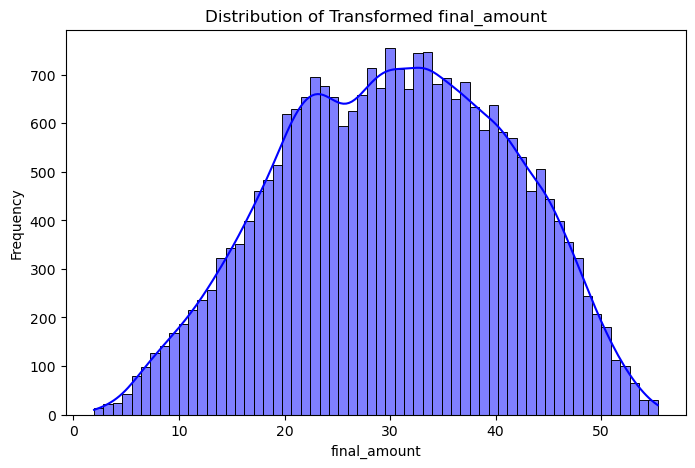

In [132]:
for col in ['transaction_amount', 'final_amount']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df4[col], bins=60, kde=True, color='blue')
    plt.title(f'Distribution of Transformed {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Analysis of Categorical Variable Issues**

In [133]:
corrections = []

for var in categorical_vars:
    lvls = df4[var].value_counts(normalize=True)
    issues = []
    if len(lvls) > 12:
        issues.append("High cardinality (> 12 levels)")
    if (lvls < 0.01).any():
        issues.append("Low-frequency levels (< 1%)")
    corrections.append({"Variable": var, "Issues": issues or "No issues detected"})

corrections_df = pd.DataFrame(corrections)

corrections_df

Variable              Issues
0             gender  No issues detected
1           location  No issues detected
2   product_category  No issues detected
3     payment_method  No issues detected
4  membership_status  No issues detected
5               year  No issues detected
6              month  No issues detected

**No issues detected for all variables**:
- The script checks for two primary issues in each categorical variable:
- High Cardinality: If a categorical variable has more than 12 unique levels (categories), it is flagged for high cardinality.
- Low-frequency levels: If any category in a variable represents less than 1% of the total entries, it is flagged as having low-frequency levels.

**Visualization of Categorical Variable Distributions**

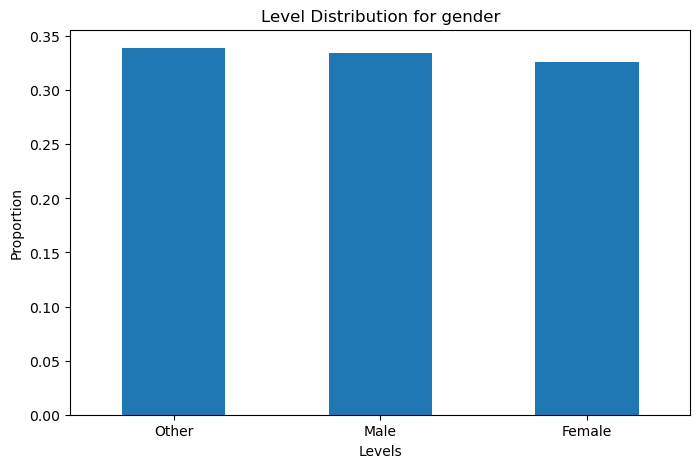

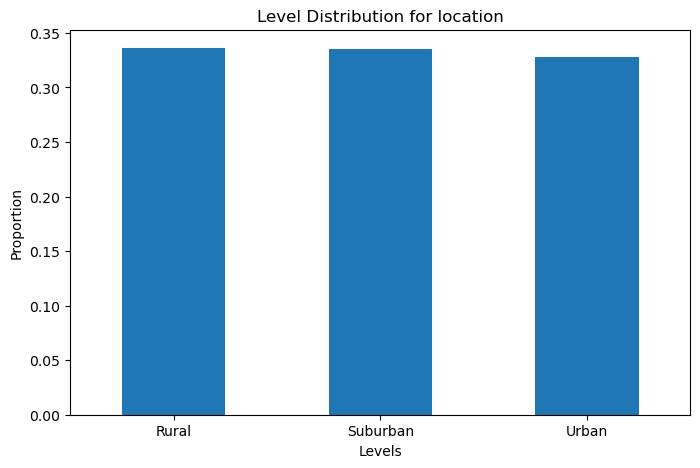

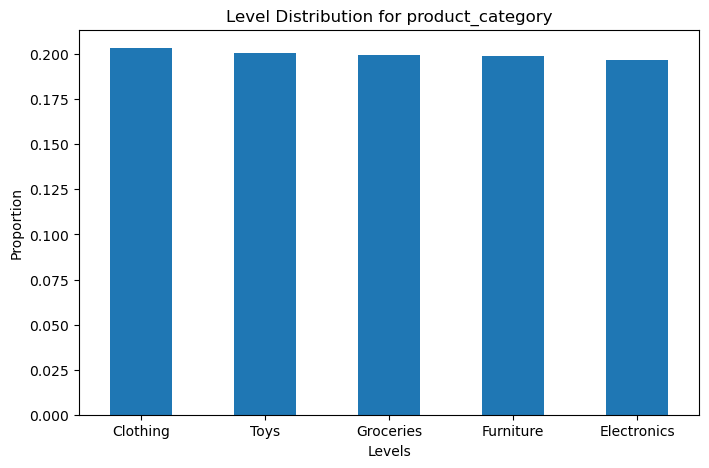

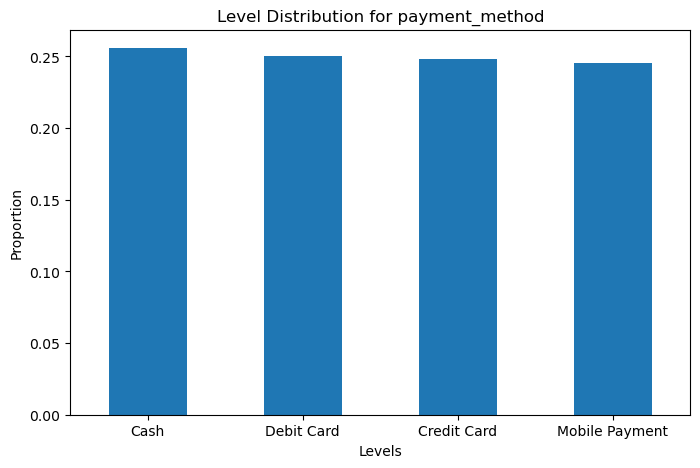

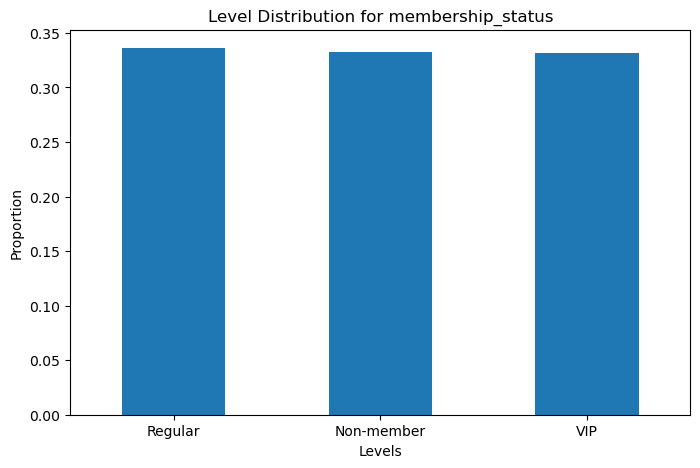

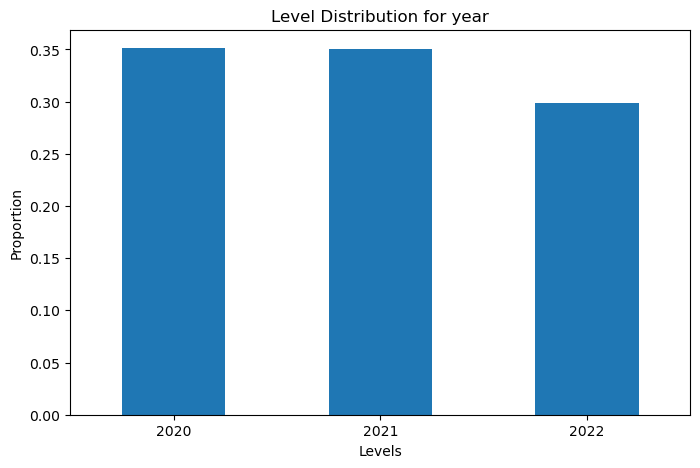

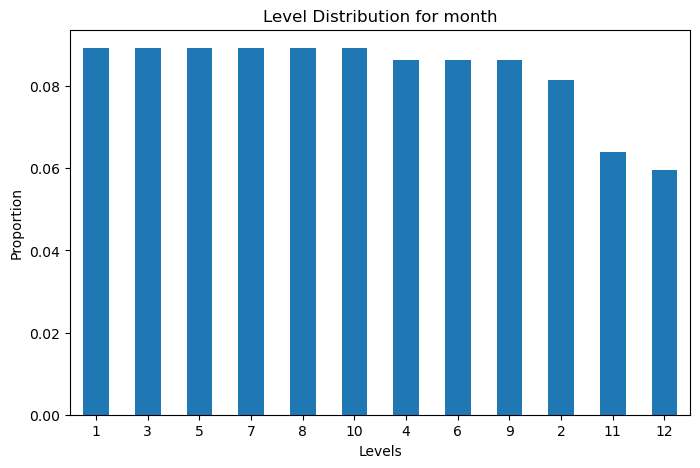

In [134]:
for x in categorical_vars:
    level_counts = df4[x].value_counts(normalize=True)
    
    plt.figure(figsize=(8, 5))
    level_counts.plot(kind='bar')
    plt.title(f"Level Distribution for {x}")
    plt.ylabel("Proportion")
    plt.xlabel("Levels")
    plt.xticks(rotation=0)
    plt.show()

## **STATISTICAL TEST**

In [135]:
results = []
for col in categorical_vars:
    if col != 'returning_customer':
        contingency_table = pd.crosstab(df4[col], df4['returning_customer'])
        chi2, p, dof, exps = stats.chi2_contingency(contingency_table)
        results.append({'Variable': col, 'Test': 'Chi-square', 'Statistic': chi2, 'p-value': p, 'Significant': p < 0.05})
for col in numeric_columns:
    if col != 'returning_customer':
        group0 = df4[df4['returning_customer'] == 0][col]
        group1 = df4[df4['returning_customer'] == 1][col]
        f_stat, p = stats.f_oneway(group0, group1)
        results.append({'Variable': col, 'Test': 'ANOVA', 'Statistic': f_stat, 'p-value': p, 'Significant': p < 0.05})

In [136]:
results_df = pd.DataFrame(results)
results_df 

Variable        Test  Statistic  p-value  Significant
0               gender  Chi-square    1.44923  0.48451        False
1             location  Chi-square    0.01900  0.99054        False
2     product_category  Chi-square    3.85471  0.42603        False
3       payment_method  Chi-square    0.73300  0.86542        False
4    membership_status  Chi-square    2.37177  0.30548        False
5                 year  Chi-square    7.98447  0.01846         True
6                month  Chi-square    4.63134  0.94770        False
7          customer_id       ANOVA    2.47651  0.11557        False
8                  age       ANOVA    0.29507  0.58699        False
9        product_price       ANOVA    0.14588  0.70251        False
10      product_rating       ANOVA    3.39702  0.06533        False
11   purchase_quantity       ANOVA    4.29059  0.03833         True
12  transaction_amount       ANOVA    0.51640  0.47239        False
13    discount_applied       ANOVA    0.26861  0.60427        False
14        final_amount       ANOVA    0.71432  0.39802        False
15      loyalty_points       ANOVA    6.35567  0.01171         True

In [137]:
df4.head()

customer_id  age  gender  location product_category  product_price  \
0         1260   18    Male     Urban         Clothing      468.71000   
1         1706   50    Male  Suburban         Clothing      264.44000   
2         1203   24  Female  Suburban      Electronics      557.33000   
3         4878   45   Other     Rural      Electronics      637.50000   
4         2010   24    Male     Urban        Groceries       82.16000   

   product_rating  purchase_quantity  transaction_amount  discount_applied  \
0         5.00000                  6            39.80641           0.20000   
1         3.30000                  9            37.47676           0.10000   
2         3.30000                  3            32.95815           0.20000   
3         3.20000                  8            49.26228           0.20000   
4         2.60000                  9            24.35362           0.10000   

   final_amount  loyalty_points  payment_method membership_status  \
0      34.27832             641      Debit Card        Non-member   
1      33.69073             699            Cash           Regular   
2      28.50686              70  Mobile Payment               VIP   
3      42.19002             323  Mobile Payment           Regular   
4      22.13441             373  Mobile Payment        Non-member   

   returning_customer  year month  
0                   0  2020     1  
1                   1  2020     1  
2                   0  2020     1  
3                   1  2020     1  
4                   0  2020     1

## **Multicollinearity**

In [138]:
df_nums = df4.select_dtypes(np.number).drop('returning_customer',axis=1)

In [139]:
x = df_nums.select_dtypes(np.number)
vif= pd.DataFrame()
x = sm.add_constant(x)
vif['features'] = x.columns[1:]
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(1,x.shape[1])]
mc = vif[vif.vif >10]
print(f'Features with high multicollinearity:\n\n{mc}')

Features with high multicollinearity:

             features       vif
5  transaction_amount 548.82529
6    discount_applied  10.45417
7        final_amount 539.25680


In [140]:
cols = vif[vif.vif>10]
cols = [c for c in cols.features]
x = df_nums.drop(columns=['transaction_amount','final_amount'])
x = sm.add_constant(x)
rvif= pd.DataFrame()
rvif['features'] = x.columns[1:]
rvif['vif'] = [variance_inflation_factor(x.values, i) for i in range(1,x.shape[1])]
rvif

features     vif
0        customer_id 1.00008
1                age 1.00020
2      product_price 1.00018
3     product_rating 1.00010
4  purchase_quantity 1.00016
5   discount_applied 1.00024
6     loyalty_points 1.00023

**Multicollinearity Analysis**
**VIF Overview**:

- VIF values measure how much the variance of a regression coefficient is inflated due to multicollinearity (correlation among predictor variables). A VIF value of 1 indicates no correlation with other variables, while values above 5 or 10 suggest multicollinearity that could affect model performance.
  
**Interpretation of VIF values**:

- Customer ID, Age, Product Price, Product Rating, Purchase Quantity, Discount Applied, and Loyalty Points all have VIF values very close to 1 (ranging between 1.00004 and 1.00326). This indicates that there is no significant multicollinearity between these features.
- 
- Since all VIF values are around 1, none of the features are highly correlated with each other. This suggests that the model should not face issues of inflated variances due to multicollinearity.

In [141]:
df4.shape

(25000, 17)

**Scaling the data**

In [142]:
cats = df4.select_dtypes(include=[object,'category'])
nums = df4.select_dtypes(np.number).drop(columns=['transaction_amount','returning_customer'])

In [143]:
scaler = StandardScaler()
nums_scaled = scaler.fit_transform(nums)
nums_scaled = pd.DataFrame(nums_scaled,columns=nums.columns)

In [144]:
cats.columns

Index(['gender', 'location', 'product_category', 'payment_method',
       'membership_status', 'year', 'month'],
      dtype='object')

In [145]:
nums_scaled.columns

Index(['customer_id', 'age', 'product_price', 'product_rating',
       'purchase_quantity', 'discount_applied', 'final_amount',
       'loyalty_points'],
      dtype='object')

## **Model Building**

In [146]:
### Customer_ID not needed

nums_scaled = nums_scaled.drop('customer_id',axis=1)

In [147]:
encoded = pd.get_dummies(cats,drop_first=True)

**Final dataset ready for model building**

In [148]:
df = pd.concat([encoded,nums_scaled,df4.returning_customer],axis=1)
df.head(5)

gender_Male  gender_Other  location_Suburban  location_Urban  \
0         True         False              False            True   
1         True         False               True           False   
2        False         False               True           False   
3        False          True              False           False   
4         True         False              False            True   

   product_category_Electronics  product_category_Furniture  \
0                         False                       False   
1                         False                       False   
2                          True                       False   
3                          True                       False   
4                         False                       False   

   product_category_Groceries  product_category_Toys  \
0                       False                  False   
1                       False                  False   
2                       False                  False   
3                       False                  False   
4                        True                  False   

   payment_method_Credit Card  payment_method_Debit Card  \
0                       False                       True   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   

   payment_method_Mobile Payment  membership_status_Regular  \
0                          False                      False   
1                          False                       True   
2                           True                      False   
3                           True                       True   
4                           True                      False   

   membership_status_VIP  year_2021  year_2022  month_10  month_11  month_12  \
0                  False      False      False     False     False     False   
1                  False      False      False     False     False     False   
2                   True      False      False     False     False     False   
3                  False      False      False     False     False     False   
4                  False      False      False     False     False     False   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0    False    False    False    False    False    False    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

       age  product_price  product_rating  purchase_quantity  \
0 -1.70917       -0.11277         1.72843            0.39024   
1  0.42790       -0.82493         0.26001            1.55227   
2 -1.30847        0.19618         0.26001           -0.77179   
3  0.09399        0.47568         0.17363            1.16493   
4 -1.30847       -1.46041        -0.34464            1.55227   

   discount_applied  final_amount  loyalty_points  returning_customer  
0           0.44129       0.36721         0.49136                   0  
1          -0.45448       0.31263         0.69249                   1  
2           0.44129      -0.16890        -1.48876                   0  
3           0.44129       1.10214        -0.61140                   1  
4          -0.45448      -0.76085        -0.43801                   0

In [207]:
X = df.drop('returning_customer',axis=1)
y = df.returning_customer
X_train, X_test, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

**making a dataframe to add scores for different models**

In [150]:
scores = pd.DataFrame({'Model':[],'Scores(accuracy)':[]})
def add_score(model_name, accuracy):
    global scores
    entry = pd.DataFrame({'Model': [model_name], 'Scores(accuracy)': [accuracy]})
    scores =  pd.concat([scores,entry], ignore_index=True)
    return scores

### Logistic Regression

In [209]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train1)

y_pred = lr_model.predict(X_test)

print("Report:")
print(classification_report(y_test1, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred))

Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      3769
           1       0.50      0.49      0.49      3731

    accuracy                           0.50      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.50      0.50      0.50      7500

Confusion Matrix:
[[1918 1851]
 [1909 1822]]


In [210]:
y_train_pred = lr_model.predict(X_train)
accuracy_score(y_train1,y_train_pred)

0.5172571428571429

In [153]:
lr_model.coef_

array([[ 0.03338484, -0.01318891,  0.04828538,  0.03032954,  0.03879828,
         0.00641715, -0.05115672, -0.02013919, -0.01123755, -0.00802311,
         0.0224202 ,  0.05859974,  0.03842395, -0.10262061, -0.0454049 ,
         0.02487713, -0.00877156,  0.10421343,  0.03465634, -0.0028967 ,
        -0.00180857,  0.05034055,  0.08256795,  0.0362551 ,  0.03015354,
         0.05200828,  0.01326484, -0.00394474, -0.02490026, -0.0280433 ,
         0.01963465, -0.00615199,  0.01990677]])

In [154]:
add_score('LogisticRegression',accuracy_score(y_train,y_train_pred))

Model  Scores(accuracy)
0  LogisticRegression           0.51726

### RandomForest

In [155]:
rf_model = RandomForestClassifier().fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

print("Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51      3769
           1       0.49      0.46      0.47      3731

    accuracy                           0.49      7500
   macro avg       0.49      0.49      0.49      7500
weighted avg       0.49      0.49      0.49      7500

Confusion Matrix:
[[2005 1764]
 [2024 1707]]


In [156]:
imp_fets= pd.DataFrame({'Features':X.columns,'Importances':rf_model.feature_importances_})
imp_fets = imp_fets.sort_values(by='Importances',ascending=False)

In [157]:
imp_fets

Features  Importances
32                 loyalty_points      0.12037
27                  product_price      0.11961
31                   final_amount      0.11910
26                            age      0.10379
28                 product_rating      0.10066
29              purchase_quantity      0.05756
30               discount_applied      0.04062
2               location_Suburban      0.01784
3                  location_Urban      0.01761
12          membership_status_VIP      0.01723
0                     gender_Male      0.01683
1                    gender_Other      0.01628
11      membership_status_Regular      0.01607
8      payment_method_Credit Card      0.01605
14                      year_2022      0.01592
9       payment_method_Debit Card      0.01558
10  payment_method_Mobile Payment      0.01539
13                      year_2021      0.01523
5      product_category_Furniture      0.01411
7           product_category_Toys      0.01370
4    product_category_Electronics      0.01293
6      product_category_Groceries      0.01282
24                        month_8      0.01024
23                        month_7      0.01008
19                        month_3      0.01004
15                       month_10      0.01003
21                        month_5      0.00997
25                        month_9      0.00970
22                        month_6      0.00960
20                        month_4      0.00958
18                        month_2      0.00922
16                       month_11      0.00855
17                       month_12      0.00768

### USING SMOTEENN()

In [158]:
x = df.drop(columns='returning_customer')
y = df.returning_customer
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [160]:
from imblearn.combine import SMOTEENN

In [161]:
sm = SMOTEENN()
x_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [162]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(x_resampled1, y_resampled1,test_size=0.2)

In [163]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [164]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [165]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.5839874411302983


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.61      0.48      0.54       320
           1       0.57      0.68      0.62       317

    accuracy                           0.58       637
   macro avg       0.59      0.58      0.58       637
weighted avg       0.59      0.58      0.58       637



### PCA

In [166]:
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

<IPython.core.display.Javascript object>

**RandomForest**

In [167]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8).fit(xr_train_pca,yr_train1)

In [168]:
yr_predict_pca = model.predict(xr_test_pca)

In [169]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.5839874411302983


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       320
           1       0.58      0.60      0.59       317

    accuracy                           0.58       637
   macro avg       0.58      0.58      0.58       637
weighted avg       0.58      0.58      0.58       637



In [170]:
param_grid = {'n_estimators': [100, 200, 500, 1000],'max_depth': [10, 20, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

grid_cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=3,scoring='accuracy',verbose=1,n_jobs=-1)
grid_cv.fit(xr_train_pca,yr_train1)

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy', verbose=1)

In [171]:
print(f'{grid_cv.best_params_}')
print(f'{grid_cv.best_score_}')

{'bootstrap': False, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.6179245283018867


In [172]:
model_best = RandomForestClassifier(bootstrap= True, max_depth= 50, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 500).fit(xr_train_pca,yr_train1)

In [173]:
y_pred_best= model_best.predict(xr_test_pca)
print(f'Accuracy score : {accuracy_score(yr_test1,y_pred_best)}\n')
print(classification_report(yr_test1, y_pred_best))

Accuracy score : 0.609105180533752

              precision    recall  f1-score   support

           0       0.62      0.57      0.60       320
           1       0.60      0.64      0.62       317

    accuracy                           0.61       637
   macro avg       0.61      0.61      0.61       637
weighted avg       0.61      0.61      0.61       637



In [174]:
y_train_pred_best= model_best.predict(xr_train_pca)
print(f'Accuracy score : {accuracy_score(yr_train1,y_train_pred_best)}\n')

Accuracy score : 1.0



**KNN model**

In [175]:
knn_model = KNeighborsClassifier().fit(xr_train_pca,yr_train1)
y_knn_pred = knn_model.predict(xr_test_pca)
print(f'Classification report :\n{classification_report(yr_test1,y_knn_pred)}')

Classification report :
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       320
           1       0.64      0.68      0.66       317

    accuracy                           0.65       637
   macro avg       0.65      0.65      0.65       637
weighted avg       0.65      0.65      0.65       637



In [176]:
####### Tuning KNN model

In [177]:
grid_knn = GridSearchCV(estimator=knn_model,param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan', 'minkowski']},verbose=1)
grid_knn.fit(xr_train_pca,yr_train1)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [178]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.6568274987237597


In [179]:
knn_best = KNeighborsClassifier(metric='euclidean',n_neighbors=3,weights='distance').fit(xr_train_pca,yr_train1)
y_knn_pred_best = knn_best.predict(xr_test_pca)
print(f'Classification report :\n{classification_report(yr_test1,y_knn_pred_best)}')

Classification report :
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       320
           1       0.68      0.69      0.69       317

    accuracy                           0.68       637
   macro avg       0.68      0.68      0.68       637
weighted avg       0.68      0.68      0.68       637



In [180]:
add_score('KNN',accuracy_score(yr_test1,y_knn_pred_best))

Model  Scores(accuracy)
0  LogisticRegression           0.51726
1                 KNN           0.68289

In [181]:
encoded

gender_Male  gender_Other  location_Suburban  location_Urban  \
0             True         False              False            True   
1             True         False               True           False   
2            False         False               True           False   
3            False          True              False           False   
4             True         False              False            True   
...            ...           ...                ...             ...   
24995        False         False              False           False   
24996         True         False               True           False   
24997         True         False               True           False   
24998        False          True               True           False   
24999        False         False              False            True   

       product_category_Electronics  product_category_Furniture  \
0                             False                       False   
1                             False                       False   
2                              True                       False   
3                              True                       False   
4                             False                       False   
...                             ...                         ...   
24995                         False                       False   
24996                         False                        True   
24997                         False                        True   
24998                         False                       False   
24999                          True                       False   

       product_category_Groceries  product_category_Toys  \
0                           False                  False   
1                           False                  False   
2                           False                  False   
3                           False                  False   
4                            True                  False   
...                           ...                    ...   
24995                        True                  False   
24996                       False                  False   
24997                       False                  False   
24998                        True                  False   
24999                       False                  False   

       payment_method_Credit Card  payment_method_Debit Card  \
0                           False                       True   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
24995                       False                       True   
24996                       False                       True   
24997                       False                      False   
24998                       False                       True   
24999                       False                      False   

       payment_method_Mobile Payment  membership_status_Regular  \
0                              False                      False   
1                              False                       True   
2                               True                      False   
3                               True                       True   
4                               True                      False   
...                              ...                        ...   
24995                          False                       True   
24996                          False                      False   
24997                           True                      False   
24998                          False                      False   
24999                           True                      False   

       membership_status_VIP  year_2021  year_2022  mo

#### testing on unscaled data

In [182]:
x1 = pd.concat([encoded,nums],axis=1).drop(columns='customer_id')
x1

gender_Male  gender_Other  location_Suburban  location_Urban  \
0             True         False              False            True   
1             True         False               True           False   
2            False         False               True           False   
3            False          True              False           False   
4             True         False              False            True   
...            ...           ...                ...             ...   
24995        False         False              False           False   
24996         True         False               True           False   
24997         True         False               True           False   
24998        False          True               True           False   
24999        False         False              False            True   

       product_category_Electronics  product_category_Furniture  \
0                             False                       False   
1                             False                       False   
2                              True                       False   
3                              True                       False   
4                             False                       False   
...                             ...                         ...   
24995                         False                       False   
24996                         False                        True   
24997                         False                        True   
24998                         False                       False   
24999                          True                       False   

       product_category_Groceries  product_category_Toys  \
0                           False                  False   
1                           False                  False   
2                           False                  False   
3                           False                  False   
4                            True                  False   
...                           ...                    ...   
24995                        True                  False   
24996                       False                  False   
24997                       False                  False   
24998                        True                  False   
24999                       False                  False   

       payment_method_Credit Card  payment_method_Debit Card  \
0                           False                       True   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
24995                       False                       True   
24996                       False                       True   
24997                       False                      False   
24998                       False                       True   
24999                       False                      False   

       payment_method_Mobile Payment  membership_status_Regular  \
0                              False                      False   
1                              False                       True   
2                               True                      False   
3                               True                       True   
4                               True                      False   
...                              ...                        ...   
24995                          False                       True   
24996                          False                      False   
24997                           True                      False   
24998                          False                      False   
24999                           True                      False   

       membership_status_VIP  year_2021  year_2022  mo

In [183]:
x = x1
y = df.returning_customer
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [184]:
sm = SMOTEENN()
x_resampled1, y_resampled1 = sm.fit_resample(x,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(x_resampled1, y_resampled1,test_size=0.2)

In [185]:
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

<IPython.core.display.Javascript object>

In [186]:
explained_variance

array([0.51162317, 0.48663117])

### Random Forest

In [187]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8).fit(xr_train_pca,yr_train1)

In [188]:
yr_predict_pca = model.predict(xr_test_pca)

In [189]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.6214057507987221


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       311
           1       0.61      0.69      0.65       315

    accuracy                           0.62       626
   macro avg       0.62      0.62      0.62       626
weighted avg       0.62      0.62      0.62       626



In [190]:
param_grid = {'n_estimators': [100, 200, 500, 1000],'max_depth': [10, 20, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

grid_cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=3,scoring='accuracy',verbose=1,n_jobs=-1)
grid_cv.fit(xr_train_pca,yr_train1)

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy', verbose=1)

In [191]:
print(f'{grid_cv.best_params_}')
print(f'{grid_cv.best_score_}')

{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.6985225744974248


In [192]:
model_best = RandomForestClassifier(bootstrap= True, max_depth= 50, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1000,random_state=42).fit(xr_train_pca,yr_train1)

In [193]:
y_pred_best= model_best.predict(xr_test_pca)
print(f'Accuracy score : {accuracy_score(yr_test1,y_pred_best)}\n')
print(classification_report(yr_test1, y_pred_best))

Accuracy score : 0.7667731629392971

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       311
           1       0.78      0.75      0.76       315

    accuracy                           0.77       626
   macro avg       0.77      0.77      0.77       626
weighted avg       0.77      0.77      0.77       626



In [194]:
y_train_pred_best= model_best.predict(xr_train_pca)
print(f'Accuracy score : {accuracy_score(yr_train1,y_train_pred_best)}\n')

Accuracy score : 1.0



In [195]:
add_score('RandomForest',accuracy_score(yr_test1,y_pred_best))

Model  Scores(accuracy)
0  LogisticRegression           0.51726
1                 KNN           0.68289
2        RandomForest           0.76677

### XGBoost

In [196]:
xg_model = XGBClassifier().fit(xr_train_pca,yr_train1)
y_pred_xg = xg_model.predict(xr_test_pca)
print(f'Accuracy Score : {accuracy_score(yr_test1,y_pred_xg)}')
print(f'Classification report : \n{classification_report(yr_test1,y_pred_xg)}')

Accuracy Score : 0.6980830670926518
Classification report : 
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       311
           1       0.71      0.68      0.69       315

    accuracy                           0.70       626
   macro avg       0.70      0.70      0.70       626
weighted avg       0.70      0.70      0.70       626



In [197]:
grid_xg = GridSearchCV(estimator=xg_model,param_grid ={
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 5]},cv=10,scoring='accuracy',verbose=1,n_jobs=-1)
grid_xg.fit(xr_train_pca,yr_train1)

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 2, 5]},
             scoring='accuracy', verbose=1)

In [198]:
grid_xg.best_params_,grid_xg.best_score_

({'learning_rate': 0.1,
  'max_depth': 7,
  'n_estimators': 200,
  'reg_alpha': 0,
  'reg_lambda': 1},
 0.7005163346613547)

In [199]:
xg_best = grid_xg.best_estimator_.fit(xr_train_pca,yr_train1)
y_pred_xg_best = xg_best.predict(xr_test_pca)
print(f'Accuracy Score : {accuracy_score(yr_test1,y_pred_xg_best)}')
print(f'Classification report : \n{classification_report(yr_test1,y_pred_xg_best)}')

Accuracy Score : 0.7060702875399361
Classification report : 
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       311
           1       0.71      0.70      0.70       315

    accuracy                           0.71       626
   macro avg       0.71      0.71      0.71       626
weighted avg       0.71      0.71      0.71       626



In [200]:
add_score('XGBoost',accuracy_score(yr_test1,y_pred_xg_best))

Model  Scores(accuracy)
0  LogisticRegression           0.51726
1                 KNN           0.68289
2        RandomForest           0.76677
3             XGBoost           0.70607

### Naive-Bayes

In [201]:
nb_model = GaussianNB().fit(xr_train_pca,yr_train1)
y_pred_nb = nb_model.predict(xr_test_pca)
print(f'Accuracy Score : {accuracy_score(yr_test1,y_pred_nb)}')
print(f'Classification report : \n{classification_report(yr_test1,y_pred_nb)}')

Accuracy Score : 0.5559105431309904
Classification report : 
              precision    recall  f1-score   support

           0       0.59      0.35      0.44       311
           1       0.54      0.76      0.63       315

    accuracy                           0.56       626
   macro avg       0.57      0.55      0.54       626
weighted avg       0.57      0.56      0.54       626



In [202]:
add_score('Naive-Bayes',accuracy_score(yr_test1,y_pred_nb))

Model  Scores(accuracy)
0  LogisticRegression           0.51726
1                 KNN           0.68289
2        RandomForest           0.76677
3             XGBoost           0.70607
4         Naive-Bayes           0.55591

In [203]:
scores

Model  Scores(accuracy)
0  LogisticRegression           0.51726
1                 KNN           0.68289
2        RandomForest           0.76677
3             XGBoost           0.70607
4         Naive-Bayes           0.55591

**Cross Validation Scores**

In [211]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr_model, X_train, y_train1, cv=10, scoring='accuracy')
scores_knn = cross_val_score(knn_best, xr_train_pca,yr_train1, cv=10, scoring='accuracy')

print(f'Mean of cross val scores for LR: {scores_lr.mean():2f}')
print(f'Mean of cross val scores for KNN: {scores_knn.mean():2f}')

Mean of cross val scores for LR: 0.500057
Mean of cross val scores for KNN: 0.766083


In [212]:
scores_rf = cross_val_score(model_best,xr_train_pca,yr_train1,cv=10,scoring='accuracy')
scores_xg = cross_val_score(xg_best,xr_train_pca,yr_train1,cv=10,scoring='accuracy')
scores_nb = cross_val_score(nb_model,xr_train_pca,yr_train1,cv=10,scoring='accuracy')
print(f'Mean of cross val scores: {scores_rf.mean():2f}')
print(f'Mean of cross val scores: {scores_xg.mean():2f}')
print(f'Mean of cross val scores: {scores_nb.mean():2f}')

Mean of cross val scores: 0.723315
Mean of cross val scores: 0.700516
Mean of cross val scores: 0.536199


**RESULTS**